# Introduction

⁠*⁠Supervised ML for proximity and perceived health*

Description

Rationale: why is it suitable

Seeing predictors for perceived health outcomes
pros/cons?


# Data import & cleaning

In [1]:
import pandas as pd

amenities = pd.read_csv("amenities.csv")
reported_health = pd.read_csv("reported_health.csv")

In [2]:
# explore the amenities data -- understand data types/dimensions/structure
print("Original amenities shape:", amenities.shape)
amenities.columns


Original amenities shape: (628, 62)


Index(['Wijken en buurten', 'Regioaanduiding/Gemeentenaam (naam)',
       'Regioaanduiding/Soort regio (omschrijving)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km)',
       'Gezondheid en welzijn/Afstand tot apotheek (km)',
       'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Afstand tot ziekenhuis (km)',
       'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal)',
       'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 10 km (aantal)',
       'Gezondheid en welzijn/Ziek

## Translating variables

In [3]:
# Remove BOM (Byte Order Mark) if present
amenities.columns = amenities.columns.str.replace("ï»¿", "")

# Translate Dutch column names to English
# Rename the first column (area/neighborhood name)
amenities.rename(columns={'Wijken en buurten': 'area_name'}, inplace=True)

# Create a comprehensive translation mapping for full column name patterns
translation_map = {
    'Regioaanduiding/Gemeentenaam (naam)': 'municipality_name',
    'Regioaanduiding/Soort regio (omschrijving)': 'region_type',
}

# Translate hierarchical column names by replacing full patterns
# Health and wellbeing
translation_map.update({
    'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km)': 'Health_GP_Distance_km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal)': 'Health_GP_Count_Within_1km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal)': 'Health_GP_Count_Within_3km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal)': 'Health_GP_Count_Within_5km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km)': 'Health_GP_after_hours_Distance_km',
    'Gezondheid en welzijn/Afstand tot apotheek (km)': 'Health_Pharmacy_Distance_km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Afstand tot ziekenhuis (km)': 'Health_Hospital_incl_Distance_km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal)': 'Health_Hospital_incl_Count_Within_5km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 10 km (aantal)': 'Health_Hospital_incl_Count_Within_10km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 20 km (aantal)': 'Health_Hospital_incl_Count_Within_20km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Afstand tot ziekenhuis (km)': 'Health_Hospital_excl_Distance_km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal)': 'Health_Hospital_excl_Count_Within_5km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 10 km (aantal)': 'Health_Hospital_excl_Count_Within_10km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 20 km (aantal)': 'Health_Hospital_excl_Count_Within_20km',
})

# Apply translations for columns that exist
for old_name, new_name in translation_map.items():
    if old_name in amenities.columns:
        amenities.rename(columns={old_name: new_name}, inplace=True)

# For remaining columns, do pattern-based replacements
amenities.columns = amenities.columns.str.replace('Gezondheid en welzijn', 'Health')
amenities.columns = amenities.columns.str.replace('Huisartsenpraktijk', 'GP')
amenities.columns = amenities.columns.str.replace('Huisartsenpost', 'GP_after_hours')
amenities.columns = amenities.columns.str.replace('Afstand tot', 'Distance_to')
amenities.columns = amenities.columns.str.replace('Aantal', 'Count')
amenities.columns = amenities.columns.str.replace('Binnen', 'Within')
amenities.columns = amenities.columns.str.replace('Detailhandel', 'Retail')
amenities.columns = amenities.columns.str.replace('Winkels dagelijkse boodschappen', 'Daily_grocery')
amenities.columns = amenities.columns.str.replace('grote supermarkt', 'large_supermarket')
amenities.columns = amenities.columns.str.replace('ov. dagel. levensmiddelen', 'other_daily_goods')
amenities.columns = amenities.columns.str.replace('Horeca', 'Hospitality')
amenities.columns = amenities.columns.str.replace('Cafés en dergelijke', 'Cafes')
amenities.columns = amenities.columns.str.replace("Cafetaria's en dergelijke", 'Cafeterias')
amenities.columns = amenities.columns.str.replace('Verkeer en vervoer', 'Traffic_transport')
amenities.columns = amenities.columns.str.replace('Treinstations', 'Train_stations')
amenities.columns = amenities.columns.str.replace('oprit hoofdverkeersweg', 'highway_ramp')
amenities.columns = amenities.columns.str.replace('Vrije tijd en cultuur', 'Leisure_culture')
amenities.columns = amenities.columns.str.replace('Bibliotheek', 'Library')
amenities.columns = amenities.columns.str.replace('binnenzwembad', 'indoor_pool')
amenities.columns = amenities.columns.str.replace('kunstijsbaan', 'ice_rink')
amenities.columns = amenities.columns.str.replace('Podiumkunsten', 'Performing_arts')
amenities.columns = amenities.columns.str.replace('poppodium', 'music_venue')
amenities.columns = amenities.columns.str.replace('Bioscoop', 'Cinema')
amenities.columns = amenities.columns.str.replace('Recreatie', 'Recreation')
amenities.columns = amenities.columns.str.replace('zonnebank', 'tanning_bed')
amenities.columns = amenities.columns.str.replace('attractie', 'attraction')
amenities.columns = amenities.columns.str.replace('Ziekenhuis', 'Hospital')
amenities.columns = amenities.columns.str.replace('apotheek', 'pharmacy')
amenities.columns = amenities.columns.str.replace('(incl. buitenpolikliniek)', 'incl_outpatient')
amenities.columns = amenities.columns.str.replace('(excl. buitenpolikliniek)', 'excl_outpatient')
amenities.columns = amenities.columns.str.replace('(km)', 'km')
amenities.columns = amenities.columns.str.replace('(aantal)', 'count')
amenities.columns = amenities.columns.str.replace('/', '_')
amenities.columns = amenities.columns.str.replace(' ', '_')
amenities.columns = amenities.columns.str.replace('__', '_')  # Clean up double underscores


In [4]:
# Translated data
print("After translation:")
print(f"\nAmenities shape: {amenities.shape}")
amenities.columns


After translation:

Amenities shape: (628, 62)


Index(['area_name', 'municipality_name', 'region_type',
       'Health_GP_Distance_km', 'Health_GP_Count_Within_1km',
       'Health_GP_Count_Within_3km', 'Health_GP_Count_Within_5km',
       'Health_GP_after_hours_Distance_km', 'Health_Pharmacy_Distance_km',
       'Health_Hospital_incl_Distance_km',
       'Health_Hospital_incl_Count_Within_5km',
       'Health_Hospital_incl_Count_Within_10km',
       'Health_Hospital_incl_Count_Within_20km',
       'Health_Hospital_excl_Distance_km',
       'Health_Hospital_excl_Count_Within_5km',
       'Health_Hospital_excl_Count_Within_10km',
       'Health_Hospital_excl_Count_Within_20km',
       'Retail_Daily_grocery_Distance_to_large_supermarket_km',
       'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
       'Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count',
       'Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count',
       'Retail_Daily_grocery_Distance_to_other_daily_goods_km',
       'R

In [5]:
# Display
amenities

area_name                         municipality_name  \
0              Amsterdam  Amsterdam                                  
1        Haarlemmerbuurt  Amsterdam                                  
2    Planciusbuurt-Noord  Amsterdam                                  
3    Westelijke eilanden  Amsterdam                                  
4       Westerdokseiland  Amsterdam                                  
..                   ...                                       ...   
623                 Gein  Amsterdam                                  
624               Gein 1  Amsterdam                                  
625               Gein 2  Amsterdam                                  
626               Gein 3  Amsterdam                                  
627               Gein 4  Amsterdam                                  

    region_type  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0    Gemeente                      0.6                         3.0   
1    Wijk                          0.5                         3.5   
2    Buurt                         0.8                         3.8   
3    Buurt                         0.9                         1.5   
4    Buurt                         0.2                         2.0   
..          ...                    ...                         ...   
623  Wijk                          0.8                         0.7   
624  Buurt                         0.8                         0.6   
625  Buurt                         0.8                         1.0   
626  Buurt                         1.0                         0.5   
627  Buurt                         0.8                         0.8   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                          28.0                        66.8   
1                          30.3                        89.0   
2                          28.0                        77.8   
3                          26.9                        75.6   
4                          28.6                        93.0   
..                          ...                         ...   
623                         4.3                        22.9   
624                         7.2                        24.5   
625                         3.5                        21.8   
626                         3.1                        22.8   
627                         3.3                        22.0   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                  3.3                          0.7   
1                                  4.6                          0.9   
2                                  4.5                          0.6   
3                                  4.8                          0.9   
4                                  4.5                          1.4   
..                                 ...                          ...   
623                                3.6                          0.9   
624                                3.2                          0.8   
625                                3.6                          0.8   
626                                3.8                          1.0   
627                                3.7                          0.9   

     Health_Hospital_incl_Distance_km  ...  \
0                                 2.6  ...   
1                                 2.0  ...   
2                                 2.4  ...   
3                                 2.4  ...   
4                                 2.0  ...   
..                                ...  ...   
623                               3.6  ...   
624                               3.2  ...   
625                               3.6  ...   
626                               3.8  ...   
627                               3.7  ...   

     Leisure_culture_Cinema_Distance_to_bioscoop_km  \
0                                               2.8   
1                                               0.9   
2    

In [6]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 62 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   area_name                                                                                        628 non-null    object 
 1   municipality_name                                                                                628 non-null    object 
 2   region_type                                                                                      628 non-null    object 
 3   Health_GP_Distance_km                                                                            587 non-null    float64
 4   Health_GP_Count_Within_1km                                                                       587 non-null    float64
 5   Health_G

There are some null rows that needs to be dropped

## Data cleaning

In [7]:
# Store original shape
original_shape = amenities.shape
print(f"\nOriginal shape: {original_shape}")



Original shape: (628, 62)


In [8]:
# Rid of missing values
print(f"   Missing values per column:")
missing_counts = amenities.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
if len(missing_cols) > 0:
    print(missing_cols.head(10))
    print(f"\n   Total rows with missing values: {amenities.isnull().any(axis=1).sum()}")
    
    #Drop rows with missing values in key columns (area_name is critical)
    amenities_cleaned = amenities.dropna(subset=['area_name']).copy()
    print(f"   After dropping rows with missing area_name: {amenities_cleaned.shape[0]} rows")
    
    # For numeric columns, we could fill with median/mean, but let's drop rows with too many missing values
    # Drop rows where more than 50% of numeric columns are missing
    numeric_cols = amenities_cleaned.select_dtypes(include=['float64', 'int64']).columns
    threshold = len(numeric_cols) * 0.5
    amenities_cleaned = amenities_cleaned[amenities_cleaned[numeric_cols].isnull().sum(axis=1) <= threshold].copy()
    print(f"   After dropping rows with >50% missing numeric data: {amenities_cleaned.shape[0]} rows")
else:
    amenities_cleaned = amenities.copy()
    print("   No missing values found!")


   Missing values per column:
Health_GP_Distance_km                     41
Health_GP_Count_Within_1km                41
Health_GP_Count_Within_3km                41
Health_GP_Count_Within_5km                41
Health_GP_after_hours_Distance_km         41
Health_Pharmacy_Distance_km               41
Health_Hospital_incl_Distance_km          41
Health_Hospital_incl_Count_Within_5km     41
Health_Hospital_incl_Count_Within_10km    41
Health_Hospital_incl_Count_Within_20km    41
dtype: int64

   Total rows with missing values: 41
   After dropping rows with missing area_name: 628 rows
   After dropping rows with >50% missing numeric data: 587 rows


In [9]:
# # Rid of duplicates
# duplicate_count = amenities_cleaned.duplicated().sum()
# print(f"   Number of duplicate rows: {duplicate_count}")
# if duplicate_count > 0:
#     amenities_cleaned = amenities_cleaned.drop_duplicates().copy()
#     print(f"   After removing duplicates: {amenities_cleaned.shape[0]} rows")

# # Check for duplicate area names (should be unique identifiers)
# duplicate_areas = amenities_cleaned['area_name'].duplicated().sum()
# print(f"   Duplicate area names: {duplicate_areas}")
# if duplicate_areas > 0:
#     print("   Warning: Some area names appear multiple times. Keeping first occurrence.")
#     amenities_cleaned = amenities_cleaned.drop_duplicates(subset=['area_name'], keep='first').copy()
#     print(f"   After removing duplicate area names: {amenities_cleaned.shape[0]} rows")


In [10]:

# 4. Standardize the data
# Standardize area_name: strip whitespace, handle case if needed
amenities_cleaned['area_name'] = amenities_cleaned['area_name'].astype(str).str.strip()

# # For numeric columns: handle any remaining missing values with median imputation
# numeric_cols_remaining = amenities_cleaned.select_dtypes(include=['float64', 'int64']).columns
# for col in numeric_cols_remaining:
#     if amenities_cleaned[col].isnull().sum() > 0:
#         median_val = amenities_cleaned[col].median()
#         amenities_cleaned[col].fillna(median_val, inplace=True)
#         print(f"   Filled missing values in '{col}' with median: {median_val:.2f}")

# Reset index after cleaning
amenities_cleaned = amenities_cleaned.reset_index(drop=True)


In [11]:
amenities_cleaned

area_name                         municipality_name  \
0              Amsterdam  Amsterdam                                  
1        Haarlemmerbuurt  Amsterdam                                  
2    Planciusbuurt-Noord  Amsterdam                                  
3    Westelijke eilanden  Amsterdam                                  
4       Westerdokseiland  Amsterdam                                  
..                   ...                                       ...   
582                 Gein  Amsterdam                                  
583               Gein 1  Amsterdam                                  
584               Gein 2  Amsterdam                                  
585               Gein 3  Amsterdam                                  
586               Gein 4  Amsterdam                                  

    region_type  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0    Gemeente                      0.6                         3.0   
1    Wijk                          0.5                         3.5   
2    Buurt                         0.8                         3.8   
3    Buurt                         0.9                         1.5   
4    Buurt                         0.2                         2.0   
..          ...                    ...                         ...   
582  Wijk                          0.8                         0.7   
583  Buurt                         0.8                         0.6   
584  Buurt                         0.8                         1.0   
585  Buurt                         1.0                         0.5   
586  Buurt                         0.8                         0.8   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                          28.0                        66.8   
1                          30.3                        89.0   
2                          28.0                        77.8   
3                          26.9                        75.6   
4                          28.6                        93.0   
..                          ...                         ...   
582                         4.3                        22.9   
583                         7.2                        24.5   
584                         3.5                        21.8   
585                         3.1                        22.8   
586                         3.3                        22.0   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                  3.3                          0.7   
1                                  4.6                          0.9   
2                                  4.5                          0.6   
3                                  4.8                          0.9   
4                                  4.5                          1.4   
..                                 ...                          ...   
582                                3.6                          0.9   
583                                3.2                          0.8   
584                                3.6                          0.8   
585                                3.8                          1.0   
586                                3.7                          0.9   

     Health_Hospital_incl_Distance_km  ...  \
0                                 2.6  ...   
1                                 2.0  ...   
2                                 2.4  ...   
3                                 2.4  ...   
4                                 2.0  ...   
..                                ...  ...   
582                               3.6  ...   
583                               3.2  ...   
584                               3.6  ...   
585                               3.8  ...   
586                               3.7  ...   

     Leisure_culture_Cinema_Distance_to_bioscoop_km  \
0                                               2.8   
1                                               0.9   
2    

In [12]:
print("SUMMARY OF DATA CLEANING")
print(f"Original shape: {original_shape}")
print(f"Cleaned shape: {amenities_cleaned.shape}")
print(f"Rows removed: {original_shape[0] - amenities_cleaned.shape[0]}")
print(f"Columns removed: {original_shape[1] - amenities_cleaned.shape[1]}")
print(f"\nRemaining missing values: {amenities_cleaned.isnull().sum().sum()}")

# Update amenities dataframe
amenities = amenities_cleaned.copy()


SUMMARY OF DATA CLEANING
Original shape: (628, 62)
Cleaned shape: (587, 62)
Rows removed: 41
Columns removed: 0

Remaining missing values: 0


In [13]:
amenities

area_name                         municipality_name  \
0              Amsterdam  Amsterdam                                  
1        Haarlemmerbuurt  Amsterdam                                  
2    Planciusbuurt-Noord  Amsterdam                                  
3    Westelijke eilanden  Amsterdam                                  
4       Westerdokseiland  Amsterdam                                  
..                   ...                                       ...   
582                 Gein  Amsterdam                                  
583               Gein 1  Amsterdam                                  
584               Gein 2  Amsterdam                                  
585               Gein 3  Amsterdam                                  
586               Gein 4  Amsterdam                                  

    region_type  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0    Gemeente                      0.6                         3.0   
1    Wijk                          0.5                         3.5   
2    Buurt                         0.8                         3.8   
3    Buurt                         0.9                         1.5   
4    Buurt                         0.2                         2.0   
..          ...                    ...                         ...   
582  Wijk                          0.8                         0.7   
583  Buurt                         0.8                         0.6   
584  Buurt                         0.8                         1.0   
585  Buurt                         1.0                         0.5   
586  Buurt                         0.8                         0.8   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                          28.0                        66.8   
1                          30.3                        89.0   
2                          28.0                        77.8   
3                          26.9                        75.6   
4                          28.6                        93.0   
..                          ...                         ...   
582                         4.3                        22.9   
583                         7.2                        24.5   
584                         3.5                        21.8   
585                         3.1                        22.8   
586                         3.3                        22.0   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                  3.3                          0.7   
1                                  4.6                          0.9   
2                                  4.5                          0.6   
3                                  4.8                          0.9   
4                                  4.5                          1.4   
..                                 ...                          ...   
582                                3.6                          0.9   
583                                3.2                          0.8   
584                                3.6                          0.8   
585                                3.8                          1.0   
586                                3.7                          0.9   

     Health_Hospital_incl_Distance_km  ...  \
0                                 2.6  ...   
1                                 2.0  ...   
2                                 2.4  ...   
3                                 2.4  ...   
4                                 2.0  ...   
..                                ...  ...   
582                               3.6  ...   
583                               3.2  ...   
584                               3.6  ...   
585                               3.8  ...   
586                               3.7  ...   

     Leisure_culture_Cinema_Distance_to_bioscoop_km  \
0                                               2.8   
1                                               0.9   
2    

# Data Exploration

## Amenities CSV

In [14]:
amenities.describe()

Health_GP_Distance_km  Health_GP_Count_Within_1km  \
count             587.000000                  587.000000   
mean                0.766099                    2.592845   
std                 0.616241                    2.150383   
min                 0.100000                    0.000000   
25%                 0.400000                    1.000000   
50%                 0.600000                    2.100000   
75%                 0.900000                    3.950000   
max                 5.600000                   12.500000   

       Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
count                  587.000000                  587.000000   
mean                    27.002044                   65.193697   
std                     18.251759                   38.506984   
min                      0.000000                    0.900000   
25%                     10.900000                   27.500000   
50%                     22.000000                   69.400000   
75%                     41.100000                  100.050000   
max                     69.200000                  129.200000   

       Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
count                         587.000000                   587.000000   
mean                            3.632538                     0.902215   
std                             1.999731                     0.689224   
min                             0.300000                     0.200000   
25%                             2.400000                     0.500000   
50%                             3.300000                     0.700000   
75%                             4.300000                     1.000000   
max                            11.800000                     7.100000   

       Health_Hospital_incl_Distance_km  \
count                        587.000000   
mean                           2.681431   
std                            1.381637   
min                            0.200000   
25%                            1.800000   
50%                            2.400000   
75%                            3.300000   
max                            9.500000   

       Health_Hospital_incl_Count_Within_5km  \
count                             587.000000   
mean                                1.971380   
std                                 1.197693   
min                                 0.000000   
25%                                 1.000000   
50%                                 2.000000   
75%                                 2.900000   
max                                 5.000000   

       Health_Hospital_incl_Count_Within_10km  \
count                              587.000000   
mean                                 5.248893   
std                                  1.627477   
min                                  0.600000   
25%                                  4.000000   
50%                                  5.800000   
75%                                  6.350000   
max                                  8.000000   

       Health_Hospital_incl_Count_Within_20km  ...  \
count                              587.000000  ...   
mean                                12.846167  ...   
std                                  1.328423  ...   
min                                  9.900000  ...   
25%                                 12.000000  ...   
50%                                 13.000000  ...   
75%                                 14.000000  ...   
max                                 17.000000  ...   

       Leisure_culture_Cinema_Distance_to_bioscoop_km  \
count                                      587.000000   
mean                                         2.922998   
std                                          2.243207   
min                                          0.200000   
25%                                          1.300000   
50%                                          2.300000   
75%                                          3.850000   
max             

In [15]:
# descriptive stats for amenities by category
numeric_cols = amenities.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group by category
categories = {
    'Health': [col for col in numeric_cols if col.startswith('Health')],
    'Retail': [col for col in numeric_cols if col.startswith('Retail')],
    'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality')],
    'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic')],
    'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure')],
    'Other': [col for col in numeric_cols if not any(col.startswith(cat) for cat in ['Health', 'Retail', 'Hospitality', 'Traffic', 'Leisure'])]
}

# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Display means by category
for category, cols in categories.items():
    if len(cols) == 0:
        continue
    
    print(f"{category.upper()} AMENITIES")
    
    means_df = pd.DataFrame({
        'Feature': cols,
        'Mean': [amenities[col].mean() for col in cols]
    })
    
    display(means_df)

HEALTH AMENITIES


Feature  Mean
0                    Health_GP_Distance_km  0.77
1               Health_GP_Count_Within_1km  2.59
2               Health_GP_Count_Within_3km 27.00
3               Health_GP_Count_Within_5km 65.19
4        Health_GP_after_hours_Distance_km  3.63
5              Health_Pharmacy_Distance_km  0.90
6         Health_Hospital_incl_Distance_km  2.68
7    Health_Hospital_incl_Count_Within_5km  1.97
8   Health_Hospital_incl_Count_Within_10km  5.25
9   Health_Hospital_incl_Count_Within_20km 12.85
10        Health_Hospital_excl_Distance_km  3.37
11   Health_Hospital_excl_Count_Within_5km  1.45
12  Health_Hospital_excl_Count_Within_10km  4.24
13  Health_Hospital_excl_Count_Within_20km  9.47

RETAIL AMENITIES


Feature  \
0                           Retail_Daily_grocery_Distance_to_large_supermarket_km   
1                Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
2                Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count   
3                Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count   
4                           Retail_Daily_grocery_Distance_to_other_daily_goods_km   
5  Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count   
6  Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_3_km_count   
7  Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_5_km_count   

    Mean  
0   0.76  
1   3.35  
2  33.59  
3  81.79  
4   0.62  
5  18.72  
6 193.98  
7 460.94

HOSPITALITY AMENITIES


Feature   Mean
0                        Hospitality_Cafes_Distance_to_café_e.d._km   0.90
1              Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count  11.40
2              Hospitality_Cafes_Count_cafés_e.d._Within_3_km_count 126.75
3              Hospitality_Cafes_Count_cafés_e.d._Within_5_km_count 297.20
4              Hospitality_Cafeterias_Distance_to_cafetaria_e.d._km   0.54
5   Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_1_km_count  15.16
6   Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_3_km_count 167.17
7   Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_5_km_count 400.96
8                 Hospitality_Restaurants_Distance_to_restaurant_km   0.46
9       Hospitality_Restaurants_Count_restaurants_Within_1_km_count  36.38
10      Hospitality_Restaurants_Count_restaurants_Within_3_km_count 402.41
11      Hospitality_Restaurants_Count_restaurants_Within_5_km_count 946.60

TRAFFIC_TRANSPORT AMENITIES


Feature  \
0                               Traffic_transport_Distance_to_highway_ramp_km   
1        Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km   
2  Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km   

   Mean  
0  2.18  
1  2.89  
2  3.81

LEISURE_CULTURE AMENITIES


Feature  \
0                                                        Leisure_culture_Distance_to_bibliotheek_km   
1                                                  Leisure_culture_Sport_Distance_to_indoor_pool_km   
2                                                     Leisure_culture_Sport_Distance_to_ice_rink_km   
3                                                      Leisure_culture_Museum_Distance_to_museum_km   
4                                              Leisure_culture_Museum_Count_musea_Within_5_km_count   
5                                             Leisure_culture_Museum_Count_musea_Within_10_km_count   
6                                             Leisure_culture_Museum_Count_musea_Within_20_km_count   
7             Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km   
8    Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count   
9   Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_10_km_count   
10  Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_20_km_count   
11                     Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km   
12                                                   Leisure_culture_Cinema_Distance_to_bioscoop_km   
13                                         Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count   
14                                        Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count   
15                                        Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count   
16                                                  Leisure_culture_Recreation_Distance_to_sauna_km   
17                                            Leisure_culture_Recreation_Distance_to_tanning_bed_km   
18                                             Leisure_culture_Recreation_Distance_to_attraction_km   
19                                  Leisure_culture_Recreation_Count_attractions_Within_10_km_count   
20                                  Leisure_culture_Recreation_Count_attractions_Within_20_km_count   
21                                  Leisure_culture_Recreation_Count_attractions_Within_50_km_count   

    Mean  
0   1.53  
1   2.38  
2   7.43  
3   2.51  
4  19.74  
5  41.14  
6  62.88  
7   1.84  
8  18.05  
9  41.35  
10 61.39  
11  3.76  
12  2.92  
13  5.66  
14 12.27  
15 19.15  
16  2.64  
17  2.32  
18  3.48  
19  5.12  
20 13.52  
21 60.39

Plotting Health category (14 columns)...


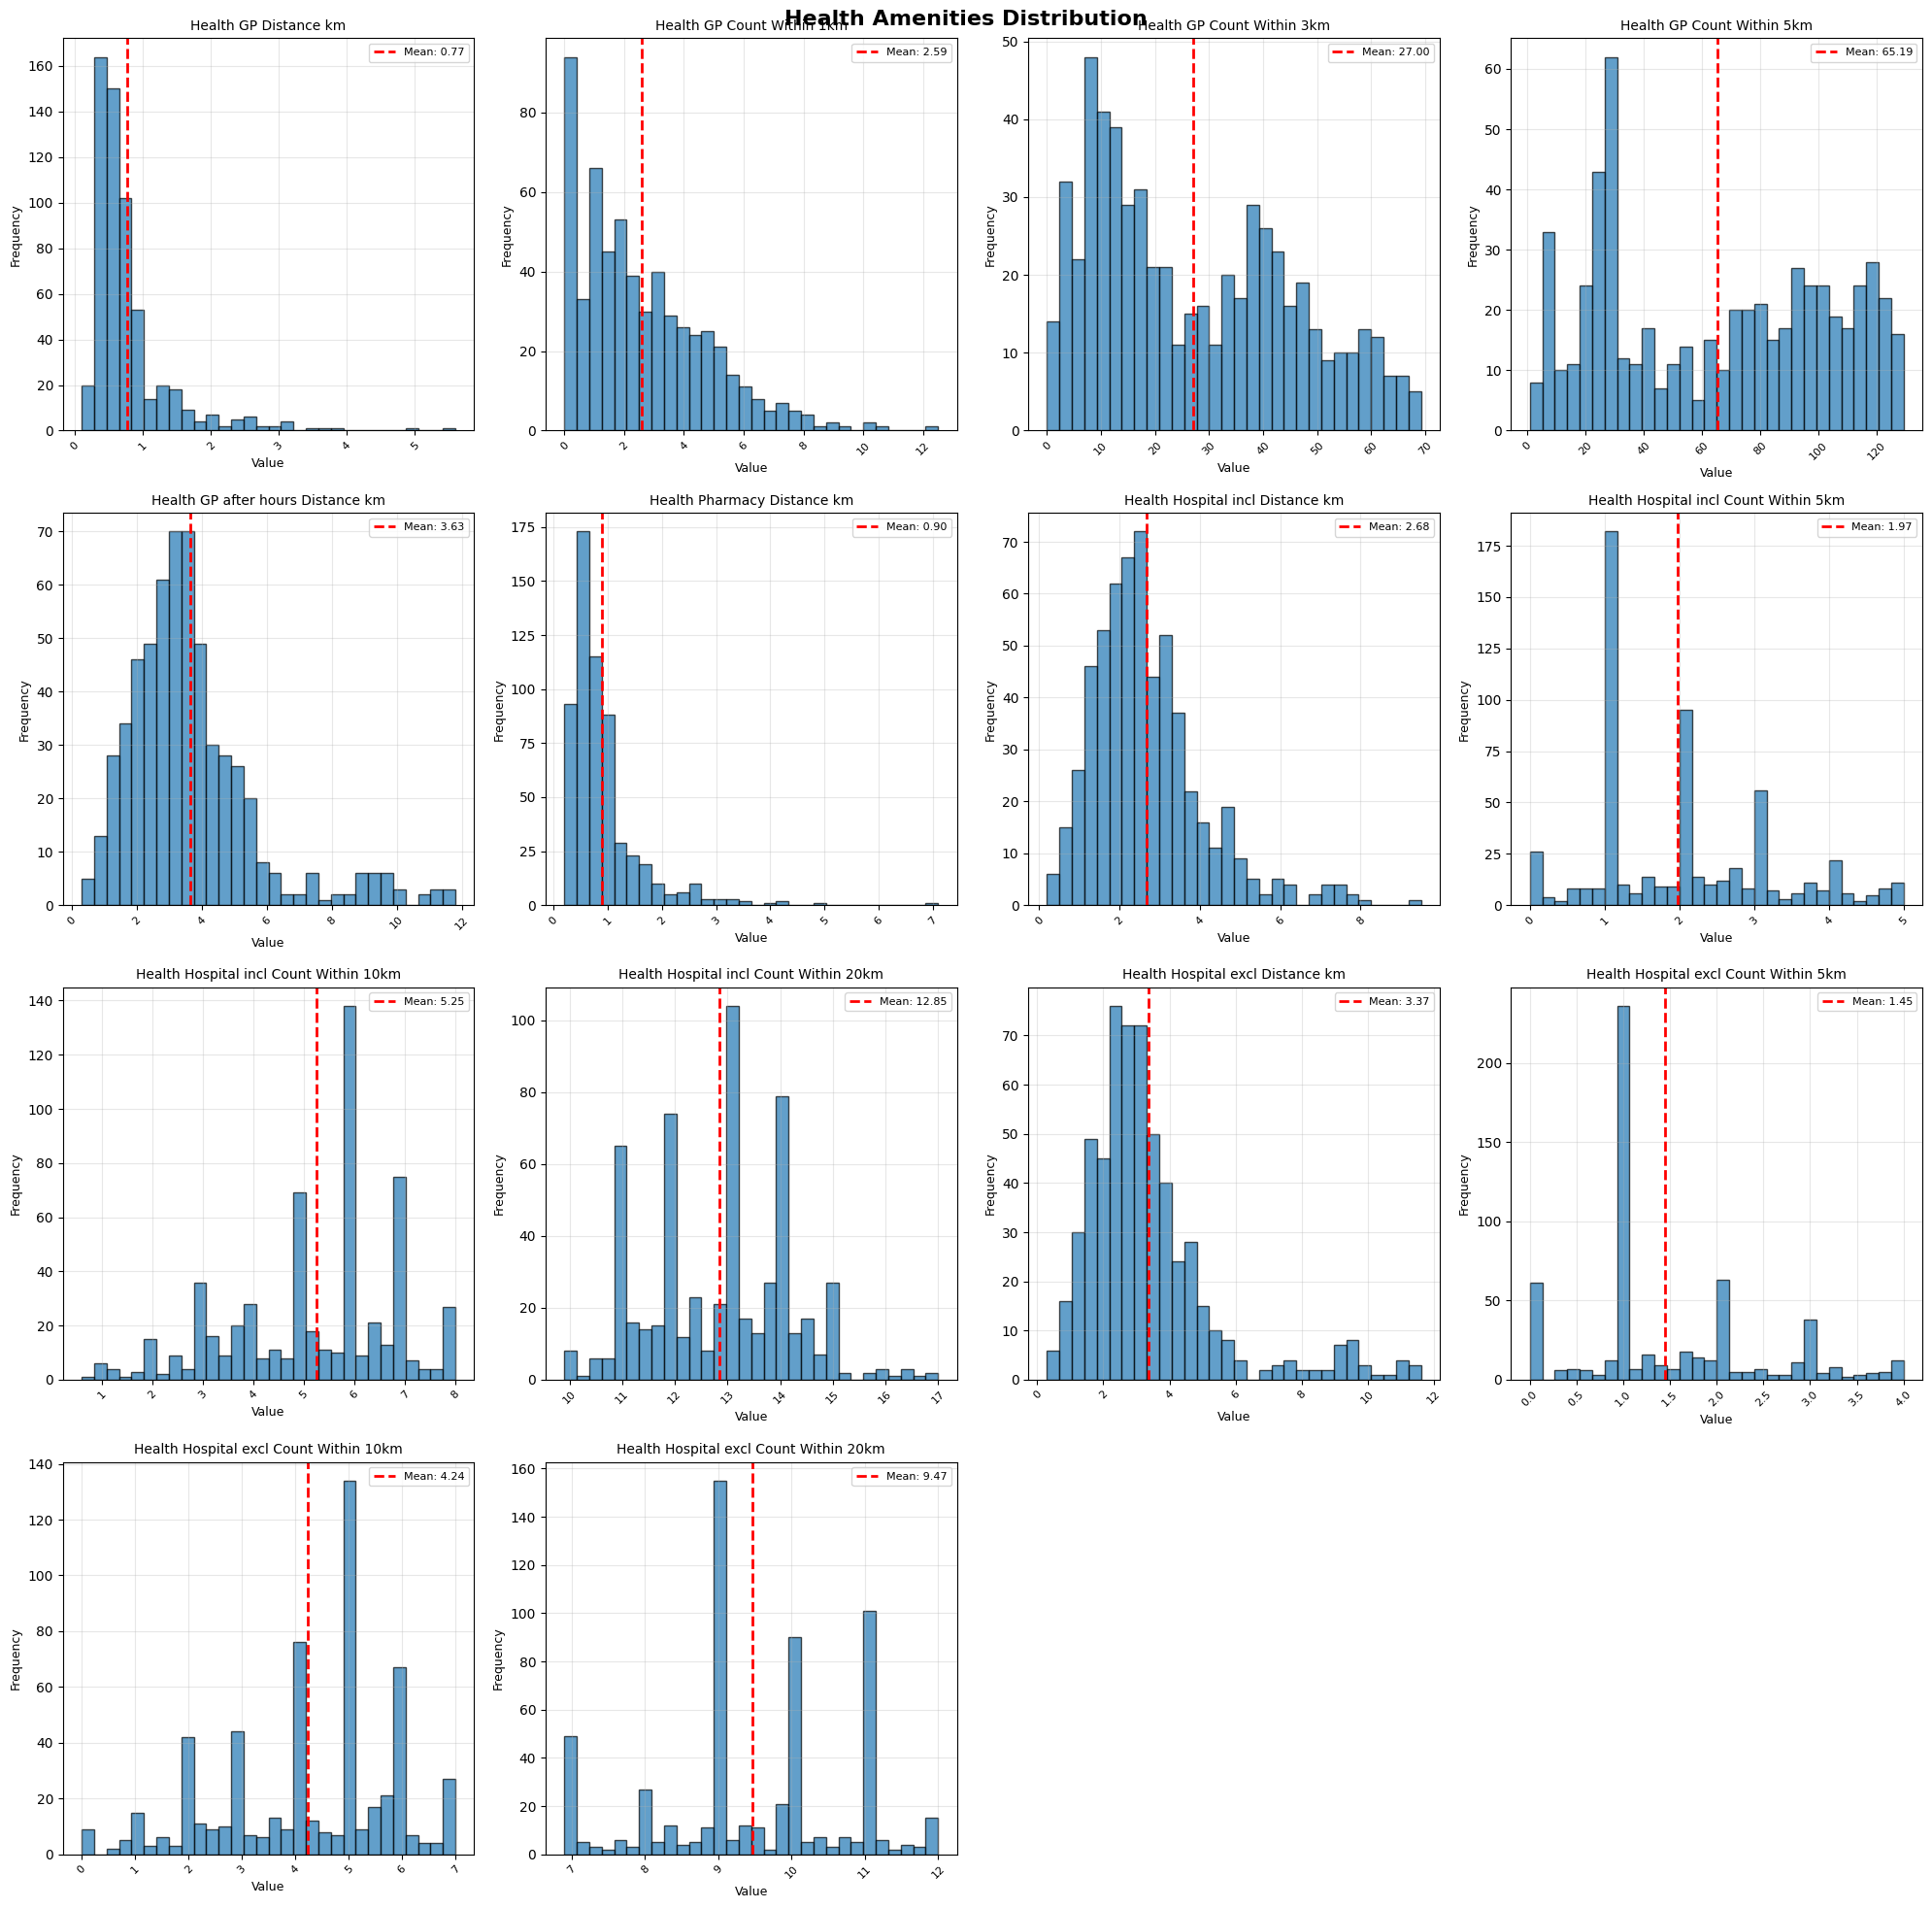

Plotting Retail category (8 columns)...


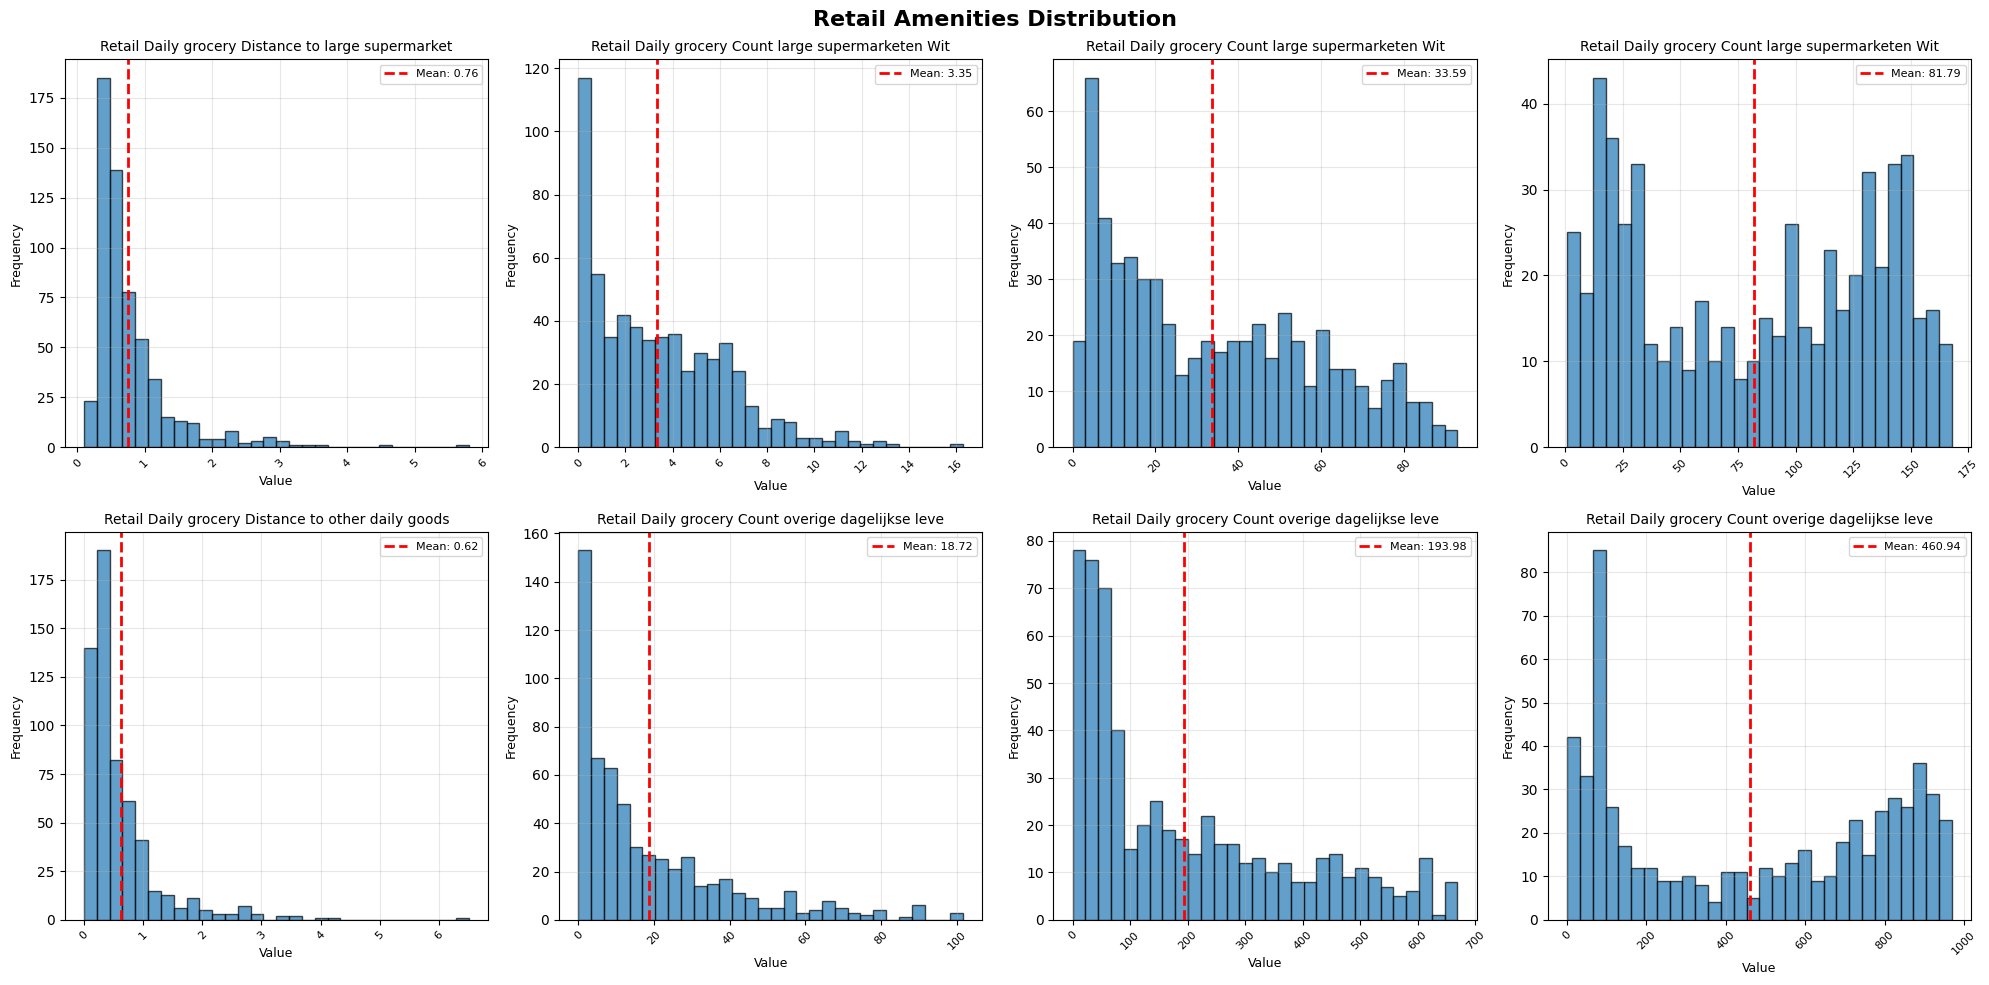

Plotting Hospitality category (12 columns)...


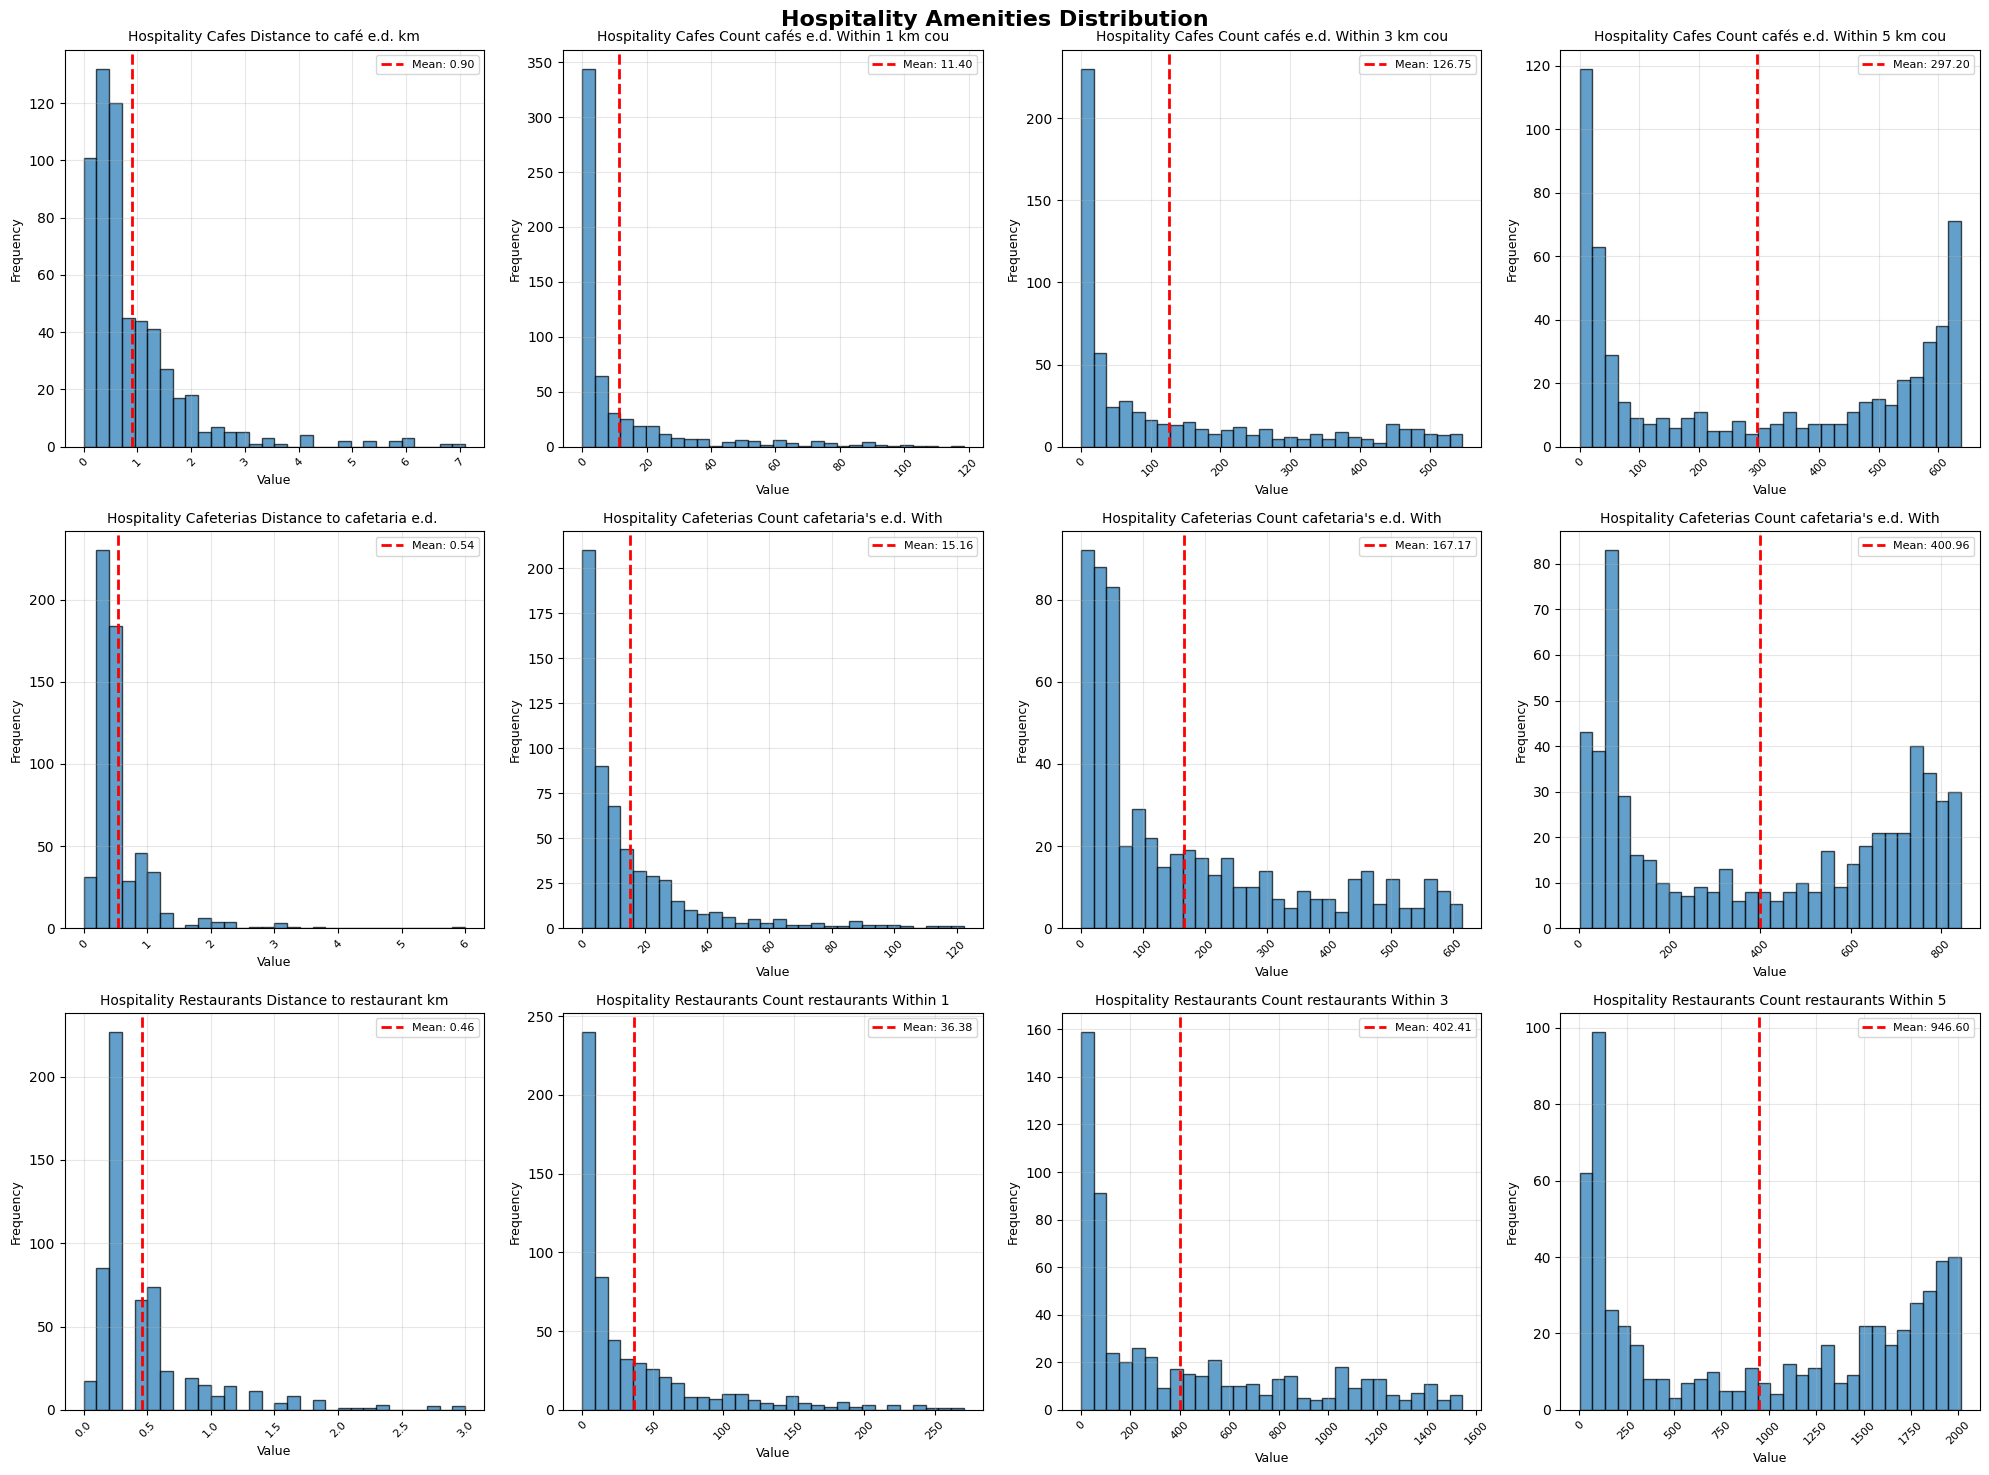

Plotting Traffic_Transport category (3 columns)...


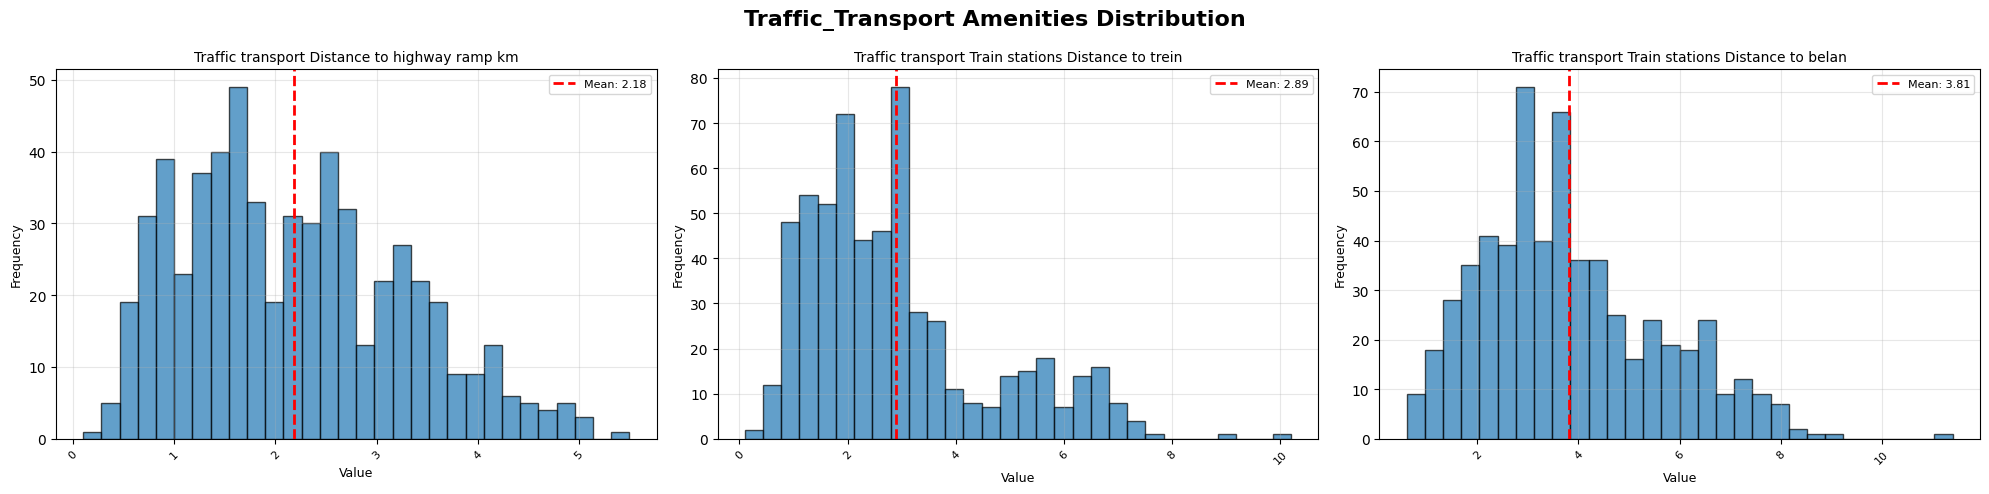

Plotting Leisure_Culture category (22 columns)...


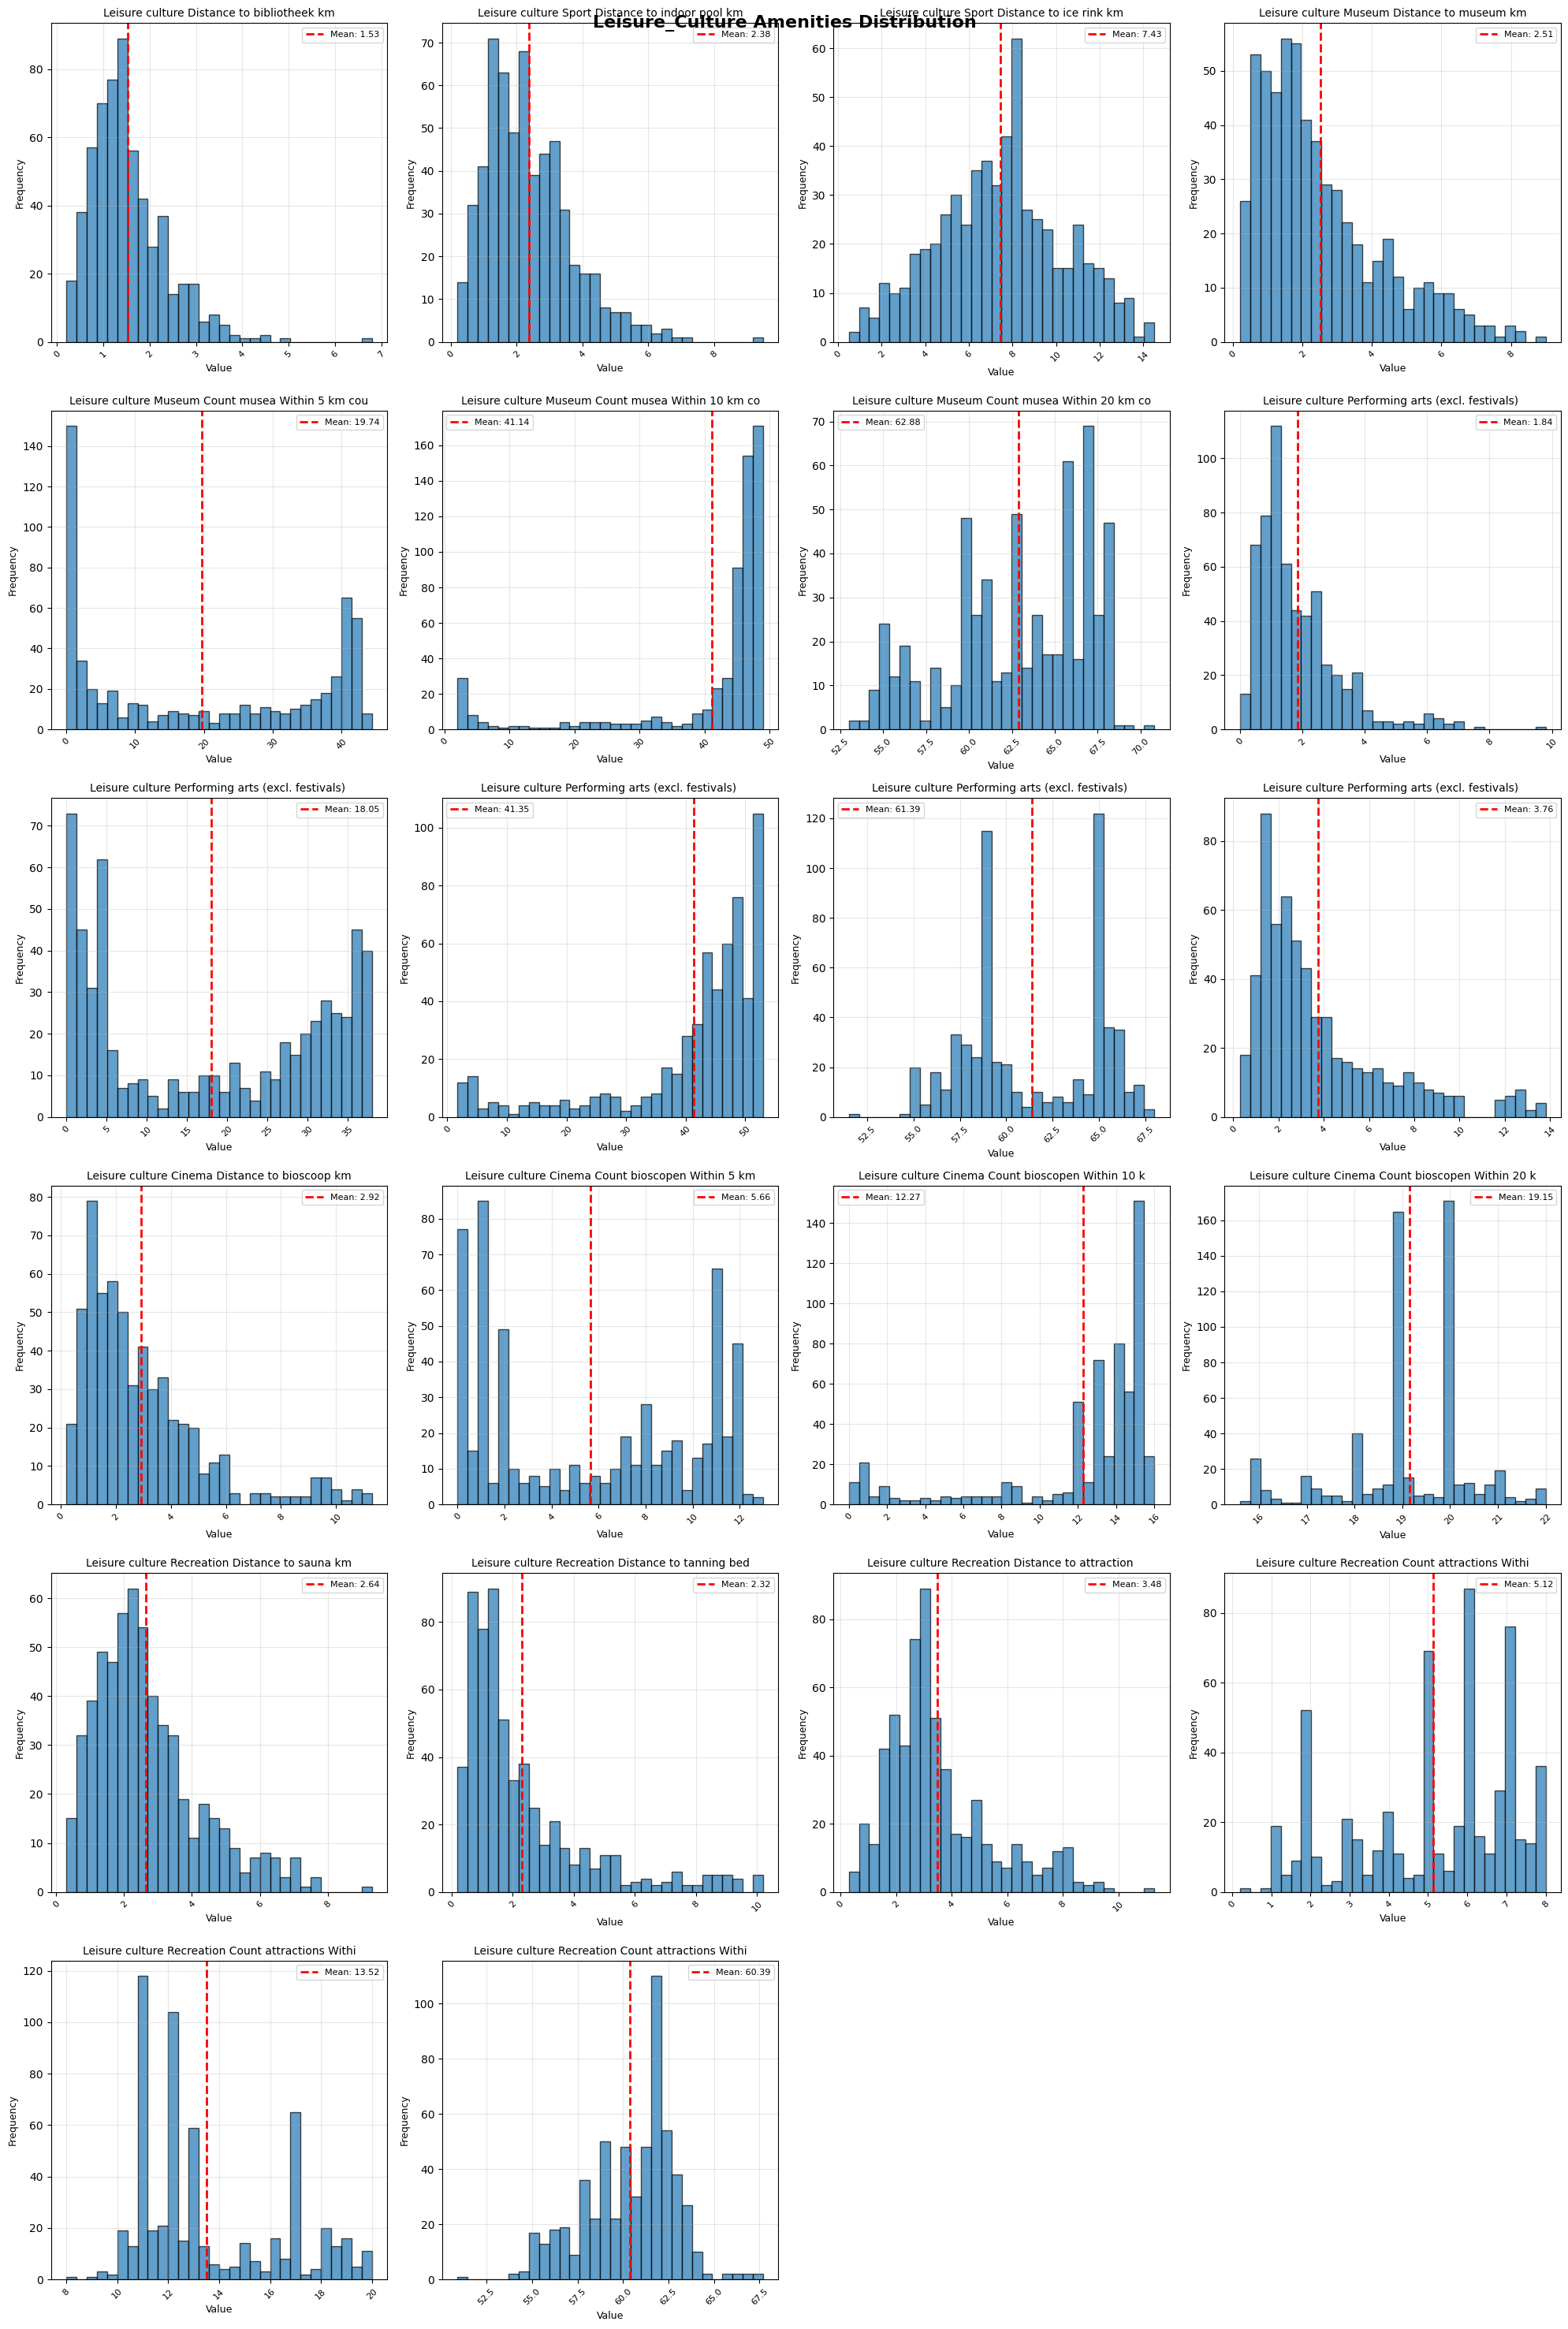

In [16]:
# amenities distribution - grouped by category and displayed in notebook with means
import matplotlib.pyplot as plt
import numpy as np

# Get numeric columns only (exclude area_name, municipality_name, region_type)
numeric_cols = amenities.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group columns by category prefix
categories = {
    'Health': [col for col in numeric_cols if col.startswith('Health')],
    'Retail': [col for col in numeric_cols if col.startswith('Retail')],
    'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality')],
    'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic')],
    'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure')],
    'Other': [col for col in numeric_cols if not any(col.startswith(cat) for cat in ['Health', 'Retail', 'Hospitality', 'Traffic', 'Leisure'])]
}

# Plot each category
for category, cols in categories.items():
    if len(cols) == 0:
        continue
    
    print(f"Plotting {category} category ({len(cols)} columns)...")
    
    # Calculate grid size (max 4 columns per row)
    n_cols = min(4, len(cols))
    n_rows = int(np.ceil(len(cols) / n_cols))
    
    # Create figure with appropriate size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig.suptitle(f'{category} Amenities Distribution', fontsize=16, fontweight='bold')
    
    # Flatten axes if needed
    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_cols > 1 else [axes]
    axes = axes.flatten()
    
    # Plot each column
    for idx, col in enumerate(cols):
        ax = axes[idx]
        amenities[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
        
        # Calculate and plot mean
        mean_val = amenities[col].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        
        ax.set_title(col.replace('_', ' ')[:50], fontsize=10, wrap=True)
        ax.set_xlabel('Value', fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
    
    # Hide unused subplots
    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

^


### Relevent variables with their means
Health:
- Health_GP_Distance_km	0.77
- Health_GP_Count_Within_1km	2.59
- Health_GP_Count_Within_3km	27.00

- Health_Hospital_incl_Distance_km	2.68
- Health_Hospital_incl_Count_Within_5km	1.97
- Health_Hospital_incl_Count_Within_10km	5.25

Retail
- Retail_Daily_grocery_Distance_to_large_supermarket_km	0.76
- Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count	3.35
- Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count	33.59
- Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count	81.79
- Retail_Daily_grocery_Distance_to_other_daily_goods_km	0.62

Transport
- Traffic_transport_Distance_to_highway_ramp_km	2.18
- Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km	2.89
- Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km	3.81

Leisure
- Leisure_culture_Distance_to_bibliotheek_km	1.53
- Leisure_culture_Sport_Distance_to_indoor_pool_km	2.38
- Leisure_culture_Sport_Distance_to_ice_rink_km	7.43
- Leisure_culture_Museum_Distance_to_museum_km	2.51
- Leisure_culture_Museum_Count_musea_Within_5_km_count	19.74
- Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count	18.05
- Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km	3.76
- Leisure_culture_Cinema_Distance_to_bioscoop_km	2.92
- Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count	5.66

- Leisure_culture_Recreation_Distance_to_sauna_km	2.64
- Leisure_culture_Recreation_Distance_to_tanning_bed_km	2.32
- Leisure_culture_Recreation_Distance_to_attraction_km	3.48
- Leisure_culture_Recreation_Count_attractions_Within_10_km_count	5.12
- Leisure_culture_Recreation_Count_attractions_Within_20_km_count	13.52

### Amsterdam means metrics by health facilities, retail stores, hospitality services, traffic & transportation, leasure & cultures
**Health:**
- Distance to GP: 0.77 km
- GP count within 1 km: 2.59
- GP count within 3 km: 27.00
- Distance to after-hours GP: 3.63 km
- Distance to pharmacy: 0.90 km
- Distance to hospital (incl. outpatient clinic): 2.68 km
- Hospital (incl.) count within 5 km: 1.97
- Hospital (incl.) count within 10 km: 5.25
- Hospital (incl.) count within 20 km: 12.85
- Distance to hospital (excl.): 3.37 km
- Hospital (excl.) count within 5 km: 1.45
- Hospital (excl.) count within 10 km: 4.24
- Hospital (excl.) count within 20 km: 9.47

**Retail:**
- Distance to large supermarket: 0.76 km
- Large supermarkets within 1 km: 3.35
- Large supermarkets within 3 km: 33.59
- Large supermarkets within 5 km: 81.79
- Distance to other daily goods: 0.62 km
- Other daily goods within 1 km: 18.72
- Other daily goods within 3 km: 193.98
- Other daily goods within 5 km: 460.94

**Hospitality:**
- Distance to café: 0.90 km
- Cafés within 1 km: 11.40
- Cafés within 3 km: 126.75
- Cafés within 5 km: 297.20
- Distance to cafeteria: 0.54 km
- Cafeterias within 1 km: 15.16
- Cafeterias within 3 km: 167.17
- Cafeterias within 5 km: 400.96
- Distance to restaurant: 0.46 km
- Restaurants within 1 km: 36.38
- Restaurants within 3 km: 402.41
- Restaurants within 5 km: 946.60

**Traffic & Transport:**
- Distance to highway ramp: 2.18 km
- Distance to train station: 2.89 km
- Distance to major transfer station: 3.81 km

**Leisure & Culture:**
- Distance to library: 1.53 km
- Distance to indoor pool: 2.38 km
- Distance to ice rink: 7.43 km
- Distance to museum: 2.51 km
- Museums within 5 km: 19.74
- Museums within 10 km: 41.14
- Museums within 20 km: 62.88
- Distance to performing arts venue: 1.84 km
- Performing arts venues within 5 km: 18.05
- Performing arts venues within 10 km: 41.35
- Performing arts venues within 20 km: 61.39
- Distance to music venue: 3.76 km
- Distance to cinema: 2.92 km
- Cinemas within 5 km: 5.66
- Cinemas within 10 km: 12.27
- Cinemas within 20 km: 19.15
- Distance to sauna: 2.64 km
- Distance to tanning bed: 2.32 km
- Distance to attraction: 3.48 km
- Attractions within 10 km: 5.12
- Attractions within 20 km: 13.52
- Attractions within 50 km: 60.39

In [17]:
'''This saves the graphs as PDF; left here to use if needed'''
# # amenities distribution - grouped by category and saved to PDF
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# import numpy as np
# from datetime import datetime

# # Get numeric columns only (exclude area_name, municipality_name, region_type)
# numeric_cols = amenities.select_dtypes(include=['float64', 'int64']).columns.tolist()

# # Group columns by category prefix
# categories = {
#     'Health': [col for col in numeric_cols if col.startswith('Health')],
#     'Retail': [col for col in numeric_cols if col.startswith('Retail')],
#     'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality')],
#     'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic')],
#     'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure')],
#     'Other': [col for col in numeric_cols if not any(col.startswith(cat) for cat in ['Health', 'Retail', 'Hospitality', 'Traffic', 'Leisure'])]
# }

# # Create PDF file
# pdf_filename = f'amenities_distributions_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'
# print(f"Creating PDF: {pdf_filename}\n")

# # Open PDF and plot each category
# with PdfPages(pdf_filename) as pdf:
#     for category, cols in categories.items():
#         if len(cols) == 0:
#             continue
        
#         print(f"Plotting {category} category ({len(cols)} columns)...")
        
#         # Calculate grid size (max 4 columns per row)
#         n_cols = min(4, len(cols))
#         n_rows = int(np.ceil(len(cols) / n_cols))
        
#         # Create figure with appropriate size
#         fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
#         fig.suptitle(f'{category} Amenities Distribution', fontsize=16, fontweight='bold')
        
#         # Flatten axes if needed
#         if n_rows == 1:
#             axes = axes.reshape(1, -1) if n_cols > 1 else [axes]
#         axes = axes.flatten()
        
#         # Plot each column
#         for idx, col in enumerate(cols):
#             ax = axes[idx]
#             amenities[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
#             ax.set_title(col.replace('_', ' ')[:50], fontsize=10, wrap=True)
#             ax.set_xlabel('Value', fontsize=9)
#             ax.set_ylabel('Frequency', fontsize=9)
#             ax.tick_params(axis='x', rotation=45, labelsize=8)
#             ax.grid(True, alpha=0.3)
        
#         # Hide unused subplots
#         for idx in range(len(cols), len(axes)):
#             axes[idx].set_visible(False)
        
#         plt.tight_layout()
        
#         # Save to PDF
#         pdf.savefig(fig, bbox_inches='tight')
#         plt.close(fig)  # Close figure to free memory

# print(f"\nSaved {len([c for c in categories.values() if len(c) > 0])} category pages to PDF")
# print(f"Total: {len(numeric_cols)} numeric columns plotted")
# print(f"PDF saved as: {pdf_filename}")

# # Automatically open the PDF in Preview to avoid SQLite/text editor errors
# import subprocess
# import os
# try:
#     pdf_path = os.path.abspath(pdf_filename)
#     subprocess.run(['open', '-a', 'Preview', pdf_path], check=True)
#     print(f"PDF opened in Preview: {pdf_path}")
# except Exception as e:
#     print(f"  Could not auto-open PDF. Please open manually: {pdf_filename}")
#     print(f"   Error: {e}")



'This saves the graphs as PDF; left here to use if needed'

### Categorize areas into Amsterdam Zuid vs Amsterdam Zuidoost

In [18]:

# Amsterdam Zuidoost (Southeast) - Bijlmer and surrounding areas
zuidoost_keywords = [
    # Letter neighborhoods (Bijlmer)
    'D-buurt', 'E-buurt', 'F-buurt', 'G-buurt', 'H-buurt', 'K-buurt', 'L-buurt',
    # Bijlmer specific areas
    'Bijlmermuseum', 'Ganzenhoef', 'Geerdinkhof', 'Kantershof', 'Grunder', 'Koningshoef',
    'Gooise Kant', 'Kortvoort', 'Kelbergen', 'De Kameleon',
    # Holendrecht and surrounding
    'Holendrecht',
    # Reigersbos
    'Reigersbos',
    # Gein
    'Gein',
    # Other Zuidoost areas
    'Nellestein', 'Venserpolder', 'Amsterdamse Poort', 'Amstel III', 'AMC', 'Hoge Dijk',
    'Hoptille', 'Hakfort', 'Huigenbos', 'Huntum', 'Vogeltjeswei', 'Rechte H-buurt',
    'Gaasperpark', 'Hoofdcentrum-Zuidoost', 'Bullewijk'
]

# Amsterdam Zuid (South) - Museum Quarter, De Pijp, Zuidas, Buitenveldert, etc.
zuid_keywords = [
    # Museum Quarter and surrounding
    'Museumkwartier', 'Concertgebouwbuurt', 'Cornelis Schuytbuurt', 'P.C. Hooftbuurt',
    'Willemspark', 'Valeriusbuurt',
    # De Pijp
    'Oude Pijp', 'Nieuwe Pijp', 'Zuid Pijp', 'Sarphatiparkbuurt', 'Frans Halsbuurt',
    'Gerard Doubuurt', 'Hercules Seghersbuurt', 'Hemonybuurt', 'Cornelis Troostbuurt',
    'Lizzy Ansinghbuurt', 'Van der Helstpleinbuurt', 'Willibrordusbuurt',
    'BurgemeesterTellegenbuurt', 'Burgemeester Tellegenbuurt',
    # Zuidas and business district
    'Zuidas', 'Kop Zuidas', 'RAI', 'VU-kwartier', 'Vivaldi',
    # Buitenveldert
    'Buitenveldert', 'Gelderlandpleinbuurt', 'De Klenckebuurt', 'Amstelpark', 'Zuiderhof',
    # Stadionbuurt and Olympic area
    'Stadionbuurt', 'Olympisch Stadion', 'Marathonbuurt', 'Bertelmanpleinbuurt',
    # Apollobuurt and surrounding
    'Apollobuurt', 'Hiltonbuurt', 'Minervabuurt', 'Beethovenbuurt', 'Diepenbrockbuurt',
    # Scheldebuurt and Rijnbuurt
    'Scheldebuurt', 'Wielingenbuurt', 'Veluwebuurt', 'IJselbuurt', 'Rijnbuurt',
    'Kromme Mijdrechtbuurt', 'Zorgvlied', 'Prinses Irenebuurt',
    # Vondelpark area
    'Vondelparkbuurt', 'Helmersbuurt', 'Cremerbuurt', 'Overtoomse Sluis',
    # Other Zuid areas
    'Diamantbuurt', 'Van Tuyllbuurt', 'IJsbaanpad', 'Duivelseiland', 'Harmoniehofbuurt',
    'Banpleinbuurt', 'Hondecoeterbuurt', 'Johannes Vermeerbuurt',
    # Schinkel area
    'Schinkelbuurt', 'Bedrijventerrein Schinkel', 'Aalsmeerwegbuurt', 'Surinamepleinbuurt',
    'Legmeerpleinbuurt', 'Hoofddorppleinbuurt', 'Westlandgrachtbuurt', 'Westlandgracht',
    'Nieuwe Meer', 'Riekerpolder', 'Riekerhaven', 'Delflandpleinbuurt',
    # Sloten area (southern part of Zuid)
    'Sloten', 'Nieuw-Sloten', 'Dorp Sloten', 'Belgiëplein', 'Sloterweg', 'Park Haagseweg',
    'Schipluidenbuurt', 'Koningin Wilhelminaplein', 'Andreasterrein',
    # Slotervaart (southern part)
    'Slotervaart', 'Medisch Centrum Slotervaart', 'Staalmanbuurt', 'Louis Crispijnbuurt',
    'Jacques Veltmanbuurt', 'Johan Jongkindbuurt', 'Rembrandtpark',
    'Overtoomse Veld', 'Lucas/Andreasziekenhuis', 'Jacob Geelbuurt', 'Emanuel van Meterenbuurt',
    'Oostoever Sloterplas'
]

def categorize_area(area_name):
    """
    Categorize an area name into Amsterdam Zuid, Amsterdam Zuidoost, or Other.
    """
    area_name_str = str(area_name).strip()
    
    # Check for Zuidoost
    for keyword in zuidoost_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuidoost'
    
    # Check for Zuid
    for keyword in zuid_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuid'
    
    return 'Other'

# Apply categorization
amenities['district'] = amenities['area_name'].apply(categorize_area)

# Display results
print("="*70)
print("AREA CATEGORIZATION RESULTS")
print("="*70)
print(f"\nTotal areas: {len(amenities)}")
print(f"\nDistribution by district:")
print(amenities['district'].value_counts())

print(f"\n\nAreas categorized as Amsterdam Zuid ({amenities[amenities['district'] == 'Amsterdam Zuid'].shape[0]}):")
zuid_areas = amenities[amenities['district'] == 'Amsterdam Zuid']['area_name'].sort_values().tolist()
for area in zuid_areas:
    print(f"  - {area}")

print(f"\n\nAreas categorized as Amsterdam Zuidoost ({amenities[amenities['district'] == 'Amsterdam Zuidoost'].shape[0]}):")
zuidoost_areas = amenities[amenities['district'] == 'Amsterdam Zuidoost']['area_name'].sort_values().tolist()
for area in zuidoost_areas:
    print(f"  - {area}")

print(f"\n\nAreas categorized as Other ({amenities[amenities['district'] == 'Other'].shape[0]}):")
other_areas = amenities[amenities['district'] == 'Other']['area_name'].sort_values().tolist()
print(f"  (First 20): {other_areas[:20]}")


AREA CATEGORIZATION RESULTS

Total areas: 587

Distribution by district:
district
Other                 402
Amsterdam Zuid        130
Amsterdam Zuidoost     55
Name: count, dtype: int64


Areas categorized as Amsterdam Zuid (130):
  - Aalsmeerwegbuurt-Oost
  - Aalsmeerwegbuurt-West
  - Amstelpark
  - Andreasterrein
  - Apollobuurt
  - Banpleinbuurt
  - Bedrijventerrein Schinkel
  - Beethovenbuurt
  - Belgiëplein e.o.
  - Bertelmanpleinbuurt
  - Buitenveldert-Oost
  - Buitenveldert-Oost-Midden
  - Buitenveldert-West
  - Buitenveldert-West-Midden
  - Buitenveldert-Zuid-Midden
  - Buitenveldert-Zuidoost
  - Buitenveldert-Zuidwest
  - Burgemeester Tellegenbuurt-Oost
  - BurgemeesterTellegenbuurt-West
  - Concertgebouwbuurt
  - Cornelis Schuytbuurt
  - Cornelis Troostbuurt
  - Cremerbuurt-Oost
  - Cremerbuurt-West
  - De Klenckebuurt
  - Delflandpleinbuurt-Oost
  - Delflandpleinbuurt-West
  - Diamantbuurt
  - Diepenbrockbuurt
  - Dorp Sloten
  - Duivelseiland
  - Emanuel van Meterenbuurt
  

In [19]:
# Comparative analysis of amenities between Amsterdam Zuid and Amsterdam Zuidoost neighborhoods

# Check if required variables exist
if 'amenities' not in globals():
    raise NameError("Error: 'amenities' dataframe not found. Please run Cells 1 and 2 first to load and process the data.")

if 'district' not in amenities.columns:
    raise KeyError("Error: 'district' column not found. Please run Cell 5 first to categorize areas into Amsterdam Zuid and Amsterdam Zuidoost.")

# Select only the rows for Amsterdam Zuid and Amsterdam Zuidoost
amenities_zuid = amenities[amenities['district'] == 'Amsterdam Zuid']
amenities_zuidoost = amenities[amenities['district'] == 'Amsterdam Zuidoost']

print("Comparative Analysis: Amenities in Amsterdam Zuid vs Amsterdam Zuidoost")
print(f"\nNumber of neighborhoods in Amsterdam Zuid: {len(amenities_zuid)}")
print(f"Number of neighborhoods in Amsterdam Zuidoost: {len(amenities_zuidoost)}")


Comparative Analysis: Amenities in Amsterdam Zuid vs Amsterdam Zuidoost

Number of neighborhoods in Amsterdam Zuid: 130
Number of neighborhoods in Amsterdam Zuidoost: 55


In [20]:

# Identify amenity columns (exclude non-numeric if necessary)
cols_to_compare = [col for col in amenities.columns if amenities[col].dtype != 'O' and col not in ['district']]

print("\nSummary statistics for amenity columns (selected columns shown):\n")

import pandas as pd

def comparative_stats(col_list):
    stats = []
    for col in col_list:
        z_mean = amenities_zuid[col].mean()
        zo_mean = amenities_zuidoost[col].mean()
        z_median = amenities_zuid[col].median()
        zo_median = amenities_zuidoost[col].median()
        z_std = amenities_zuid[col].std()
        zo_std = amenities_zuidoost[col].std()
        stats.append({
            'amenity': col,
            'Zuid mean': round(z_mean,2),
            'Zuidoost mean': round(zo_mean,2),
            'Zuid median': round(z_median,2),
            'Zuidoost median': round(zo_median,2),
            'Zuid std': round(z_std,2),
            'Zuidoost std': round(zo_std,2)
        })
    return pd.DataFrame(stats)

# If you want full stats for all numerical amenity columns, uncomment:
full_summary_table = comparative_stats(cols_to_compare)
display(full_summary_table)



Summary statistics for amenity columns (selected columns shown):



amenity  \
0                                                                             Health_GP_Distance_km   
1                                                                        Health_GP_Count_Within_1km   
2                                                                        Health_GP_Count_Within_3km   
3                                                                        Health_GP_Count_Within_5km   
4                                                                 Health_GP_after_hours_Distance_km   
5                                                                       Health_Pharmacy_Distance_km   
6                                                                  Health_Hospital_incl_Distance_km   
7                                                             Health_Hospital_incl_Count_Within_5km   
8                                                            Health_Hospital_incl_Count_Within_10km   
9                                                            Health_Hospital_incl_Count_Within_20km   
10                                                                 Health_Hospital_excl_Distance_km   
11                                                            Health_Hospital_excl_Count_Within_5km   
12                                                           Health_Hospital_excl_Count_Within_10km   
13                                                           Health_Hospital_excl_Count_Within_20km   
14                                            Retail_Daily_grocery_Distance_to_large_supermarket_km   
15                                 Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
16                                 Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count   
17                                 Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count   
18                                            Retail_Daily_grocery_Distance_to_other_daily_goods_km   
19                   Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count   
20                   Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_3_km_count   
21                   Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_5_km_count   
22                                                       Hospitality_Cafes_Distance_to_café_e.d._km   
23                                             Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count   
24                                             Hospitality_Cafes_Count_cafés_e.d._Within_3_km_count   
25                                             Hospitality_Cafes_Count_cafés_e.d._Within_5_km_count   
26                                             Hospitality_Cafeterias_Distance_to_cafetaria_e.d._km   
27                                  Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_1_km_count   
28                                  Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_3_km_count   
29                                  Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_5_km_count   
30                                                Hospitality_Restaurants_Distance_to_restaurant_km   
31                                      Hospitality_Restaurants_Count_restaurants_Within_1_km_count   
32                                      Hospitality_Restaurants_Count_restaurants_Within_3_km_count   
33                                      Hospitality_Restaurants_Count_restaurants_Within_5_km_count   
34                                                    Traffic_transport_Distance_to_highway_ramp_km   
35                             Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km   
36                       Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km   
37                                                       Leisure_culture_Distance_to_bibliotheek_km   
38                                                 Leisure_culture_Sport_Di

### Comparision in interested variables

In [21]:
import pandas as pd

# Define the selected amenities grouped by theme
selected_amenities = {
    'Health - GP': [
        'Health_GP_Distance_km',
        'Health_GP_Count_Within_1km',
        'Health_GP_Count_Within_3km'
    ],
    'Health - Hospital': [
        'Health_Hospital_incl_Distance_km',
        'Health_Hospital_incl_Count_Within_5km',
        'Health_Hospital_incl_Count_Within_10km'
    ],
    'Retail - Daily Grocery': [
        'Retail_Daily_grocery_Distance_to_large_supermarket_km',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count',
        'Retail_Daily_grocery_Distance_to_other_daily_goods_km'
    ],
    'Traffic & Transport': [
        'Traffic_transport_Distance_to_highway_ramp_km',
        'Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km'
    ],
    'Leisure & Culture - General': [
        'Leisure_culture_Distance_to_bibliotheek_km',
        'Leisure_culture_Sport_Distance_to_indoor_pool_km',
        'Leisure_culture_Sport_Distance_to_ice_rink_km'
    ],
    'Leisure & Culture - Arts': [
        'Leisure_culture_Museum_Distance_to_museum_km',
        'Leisure_culture_Museum_Count_musea_Within_5_km_count',
        'Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count',
        'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km',
        'Leisure_culture_Cinema_Distance_to_bioscoop_km',
        'Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count'
    ],
    'Leisure & Culture - Recreation': [
        'Leisure_culture_Recreation_Distance_to_sauna_km',
        'Leisure_culture_Recreation_Distance_to_tanning_bed_km',
        'Leisure_culture_Recreation_Distance_to_attraction_km',
        'Leisure_culture_Recreation_Count_attractions_Within_10_km_count',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count'
    ]
}

def comparative_stats_grouped(amenity_dict):
    all_stats = []
    
    for theme, cols in amenity_dict.items():
        # Add theme header row
        all_stats.append({
            'amenity': f'═══ {theme} ═══',
            'Zuid mean': '',
            'Zuidoost mean': '',
            'Zuid median': '',
            'Zuidoost median': '',
            'Zuid std': '',
            'Zuidoost std': ''
        })
        
        # Add stats for each amenity
        for col in cols:
            if col in amenities.columns:
                z_mean = amenities_zuid[col].mean()
                zo_mean = amenities_zuidoost[col].mean()
                z_median = amenities_zuid[col].median()
                zo_median = amenities_zuidoost[col].median()
                z_std = amenities_zuid[col].std()
                zo_std = amenities_zuidoost[col].std()
                
                all_stats.append({
                    'amenity': col,
                    'Zuid mean': round(z_mean, 2),
                    'Zuidoost mean': round(zo_mean, 2),
                    'Zuid median': round(z_median, 2),
                    'Zuidoost median': round(zo_median, 2),
                    'Zuid std': round(z_std, 2),
                    'Zuidoost std': round(zo_std, 2)
                })
        
        # Add blank row between themes
        all_stats.append({
            'amenity': '',
            'Zuid mean': '',
            'Zuidoost mean': '',
            'Zuid median': '',
            'Zuidoost median': '',
            'Zuid std': '',
            'Zuidoost std': ''
        })
    
    return pd.DataFrame(all_stats)

# Generate the grouped table
grouped_summary = comparative_stats_grouped(selected_amenities)
display(grouped_summary)

amenity  \
0                                                                              ═══ Health - GP ═══   
1                                                                            Health_GP_Distance_km   
2                                                                       Health_GP_Count_Within_1km   
3                                                                       Health_GP_Count_Within_3km   
4                                                                                                    
5                                                                        ═══ Health - Hospital ═══   
6                                                                 Health_Hospital_incl_Distance_km   
7                                                            Health_Hospital_incl_Count_Within_5km   
8                                                           Health_Hospital_incl_Count_Within_10km   
9                                                                                                    
10                                                                  ═══ Retail - Daily Grocery ═══   
11                                           Retail_Daily_grocery_Distance_to_large_supermarket_km   
12                                Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
13                                Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count   
14                                Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count   
15                                           Retail_Daily_grocery_Distance_to_other_daily_goods_km   
16                                                                                                   
17                                                                     ═══ Traffic & Transport ═══   
18                                                   Traffic_transport_Distance_to_highway_ramp_km   
19                            Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km   
20                      Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km   
21                                                                                                   
22                                                             ═══ Leisure & Culture - General ═══   
23                                                      Leisure_culture_Distance_to_bibliotheek_km   
24                                                Leisure_culture_Sport_Distance_to_indoor_pool_km   
25                                                   Leisure_culture_Sport_Distance_to_ice_rink_km   
26                                                                                                   
27                                                                ═══ Leisure & Culture - Arts ═══   
28                                                    Leisure_culture_Museum_Distance_to_museum_km   
29                                            Leisure_culture_Museum_Count_musea_Within_5_km_count   
30  Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count   
31                    Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km   
32                                                  Leisure_culture_Cinema_Distance_to_bioscoop_km   
33                                        Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count   
34                                                                                                   
35                                                          ═══ Leisure & Culture - Recreation ═══   
36                                                 Leisure_culture_Recreation_Distance_to_sauna_km   
37                                           Leisure_culture_Recreation_Distance_to_tanning_bed_km   
38                                            Leisure_culture_Recreation_Distance_to_attraction_km   
39         


Displaying comparison plots for 28 amenities



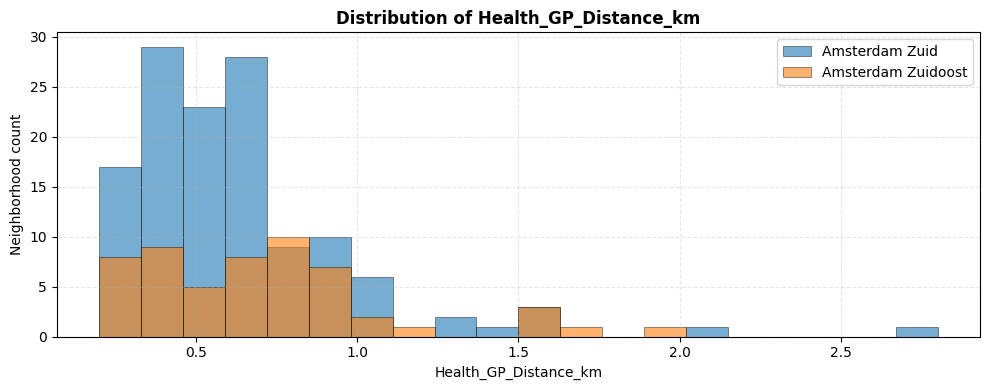

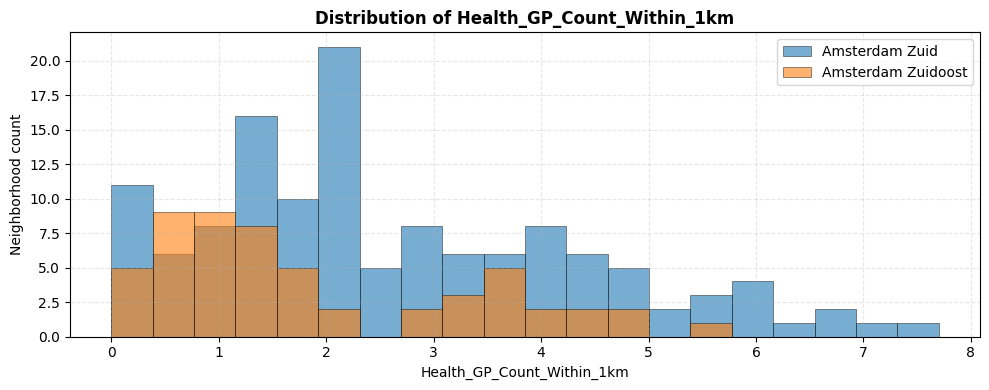

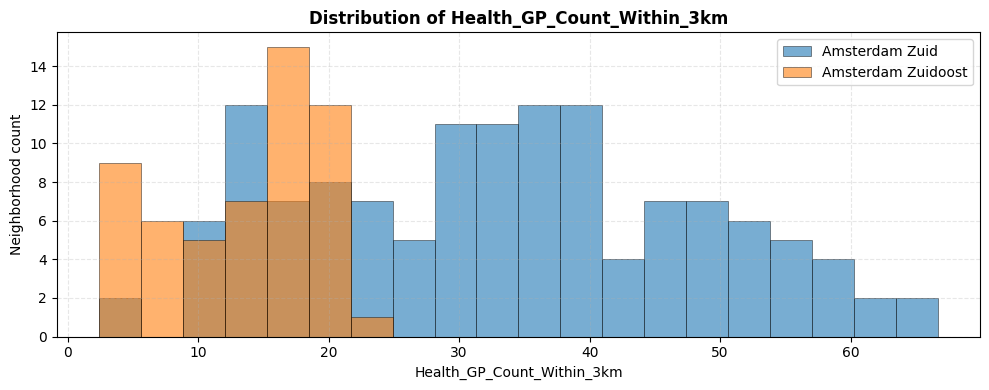

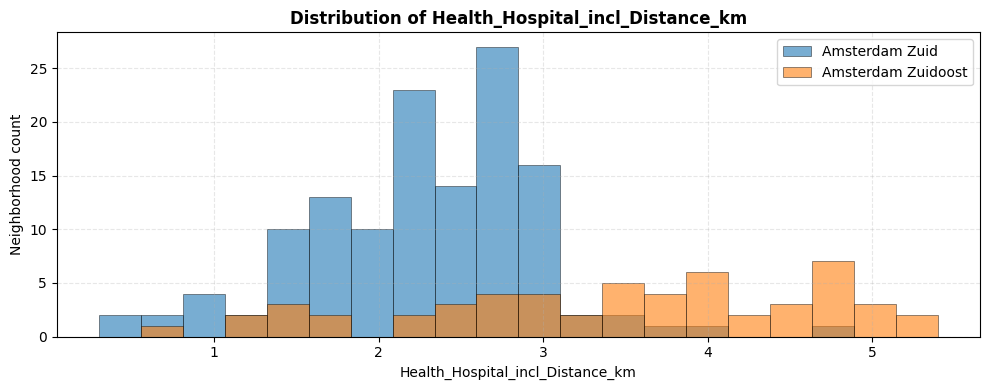

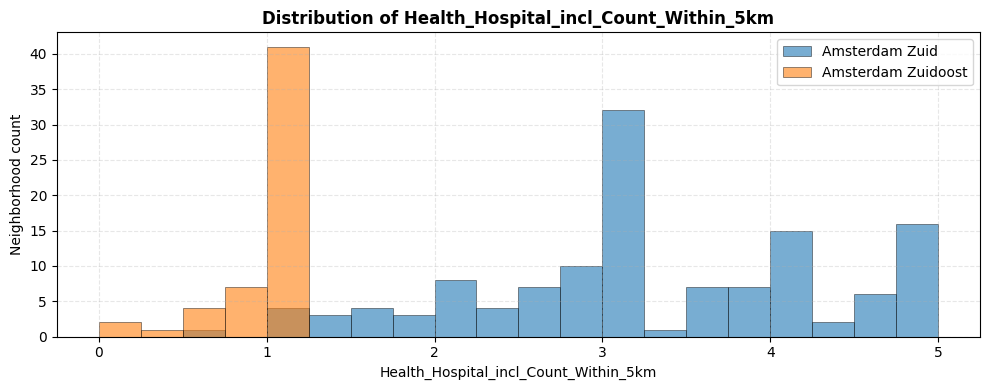

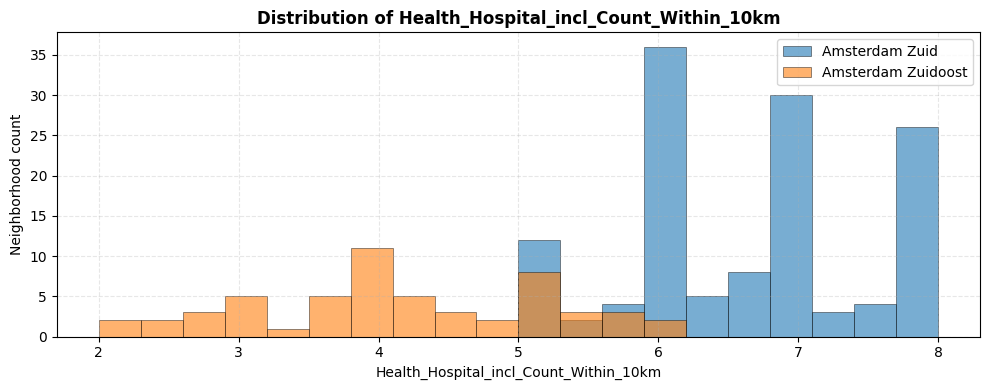

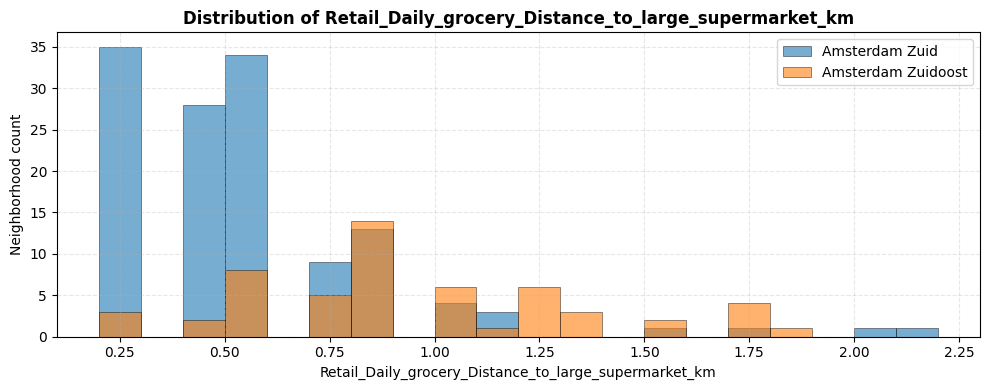

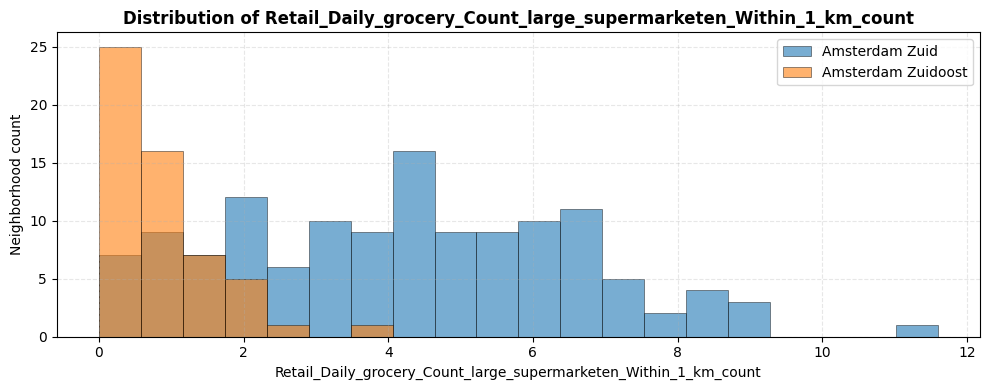

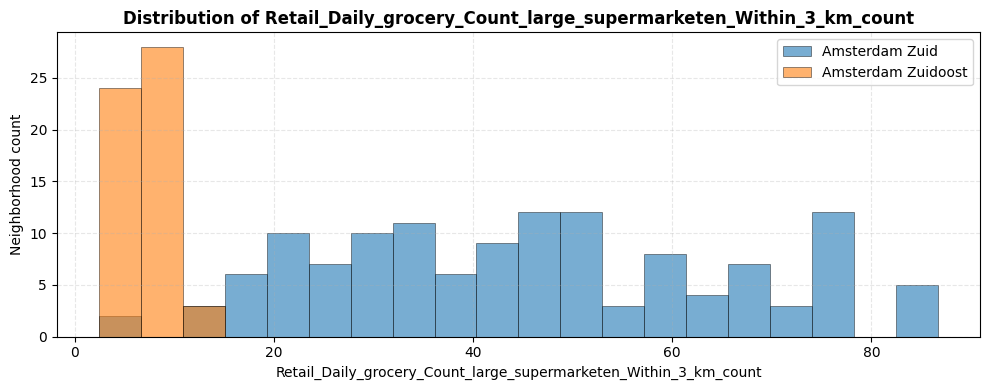

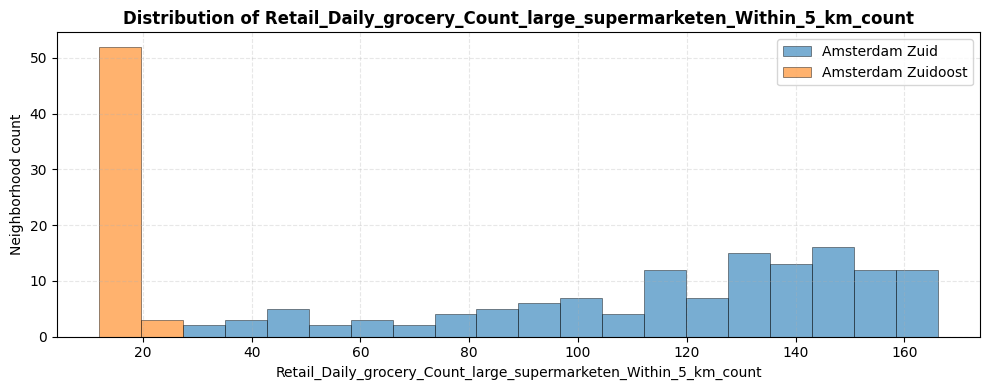

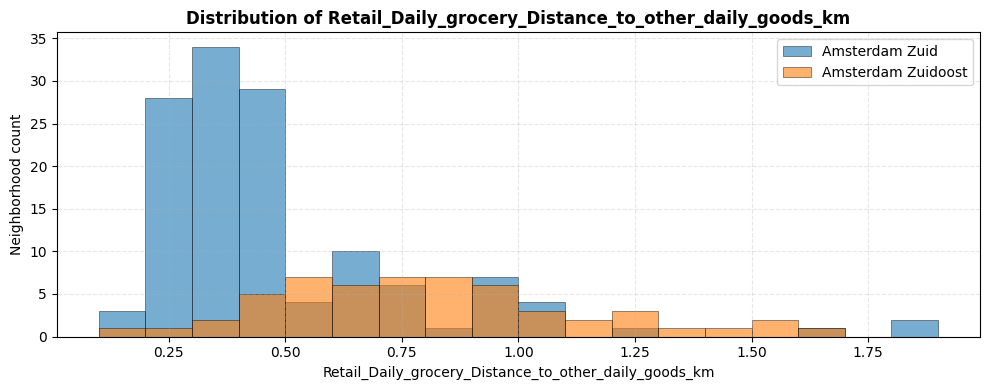

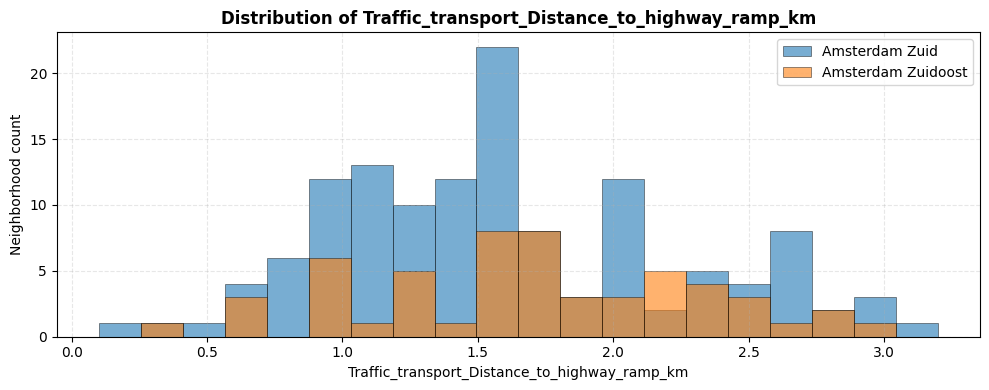

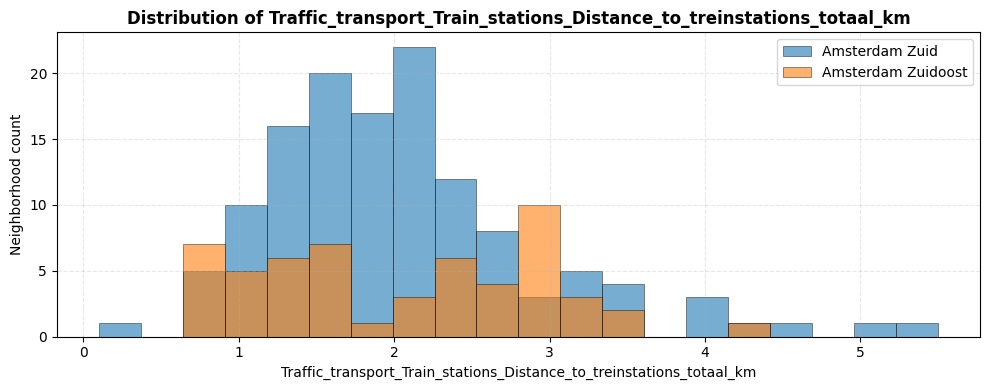

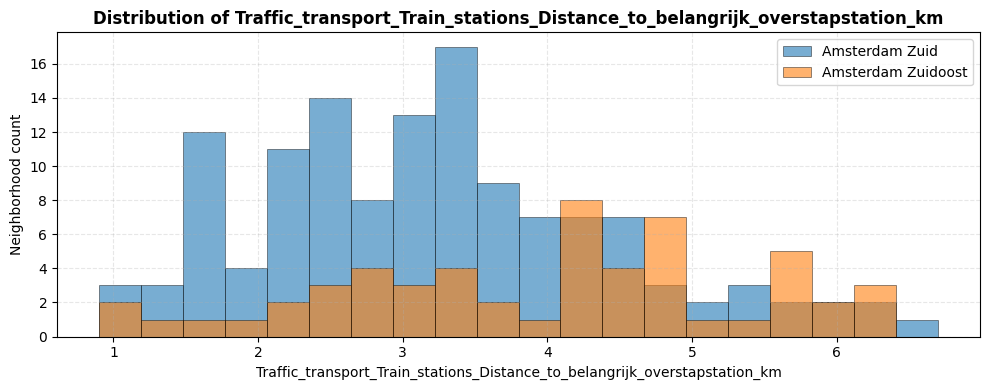

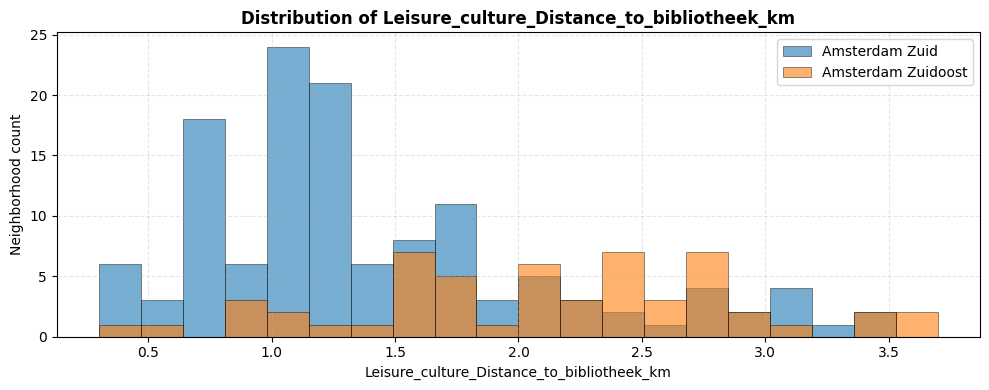

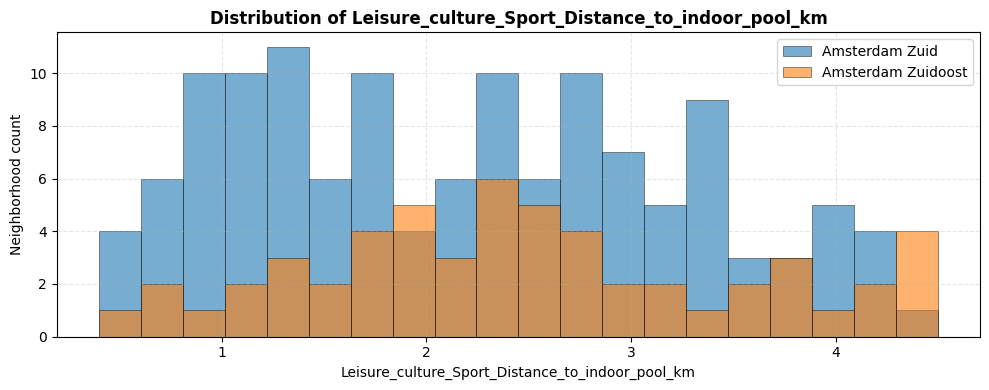

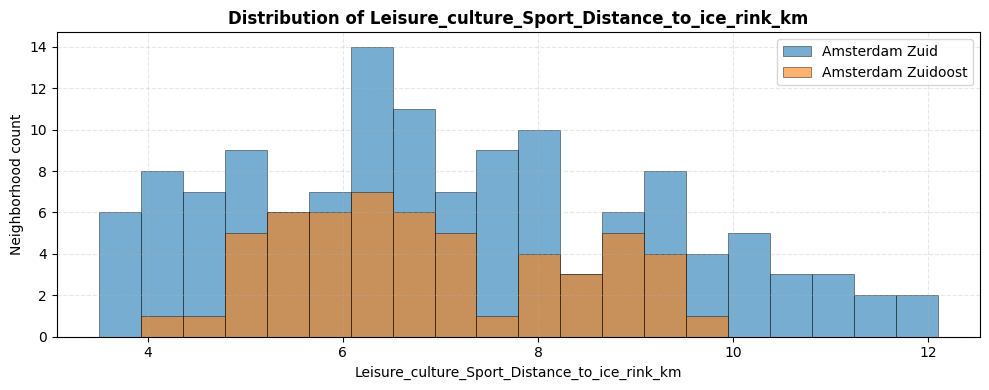

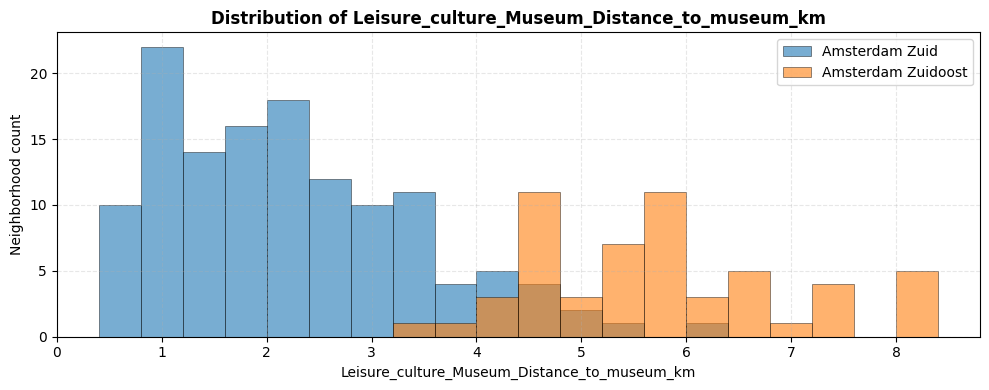

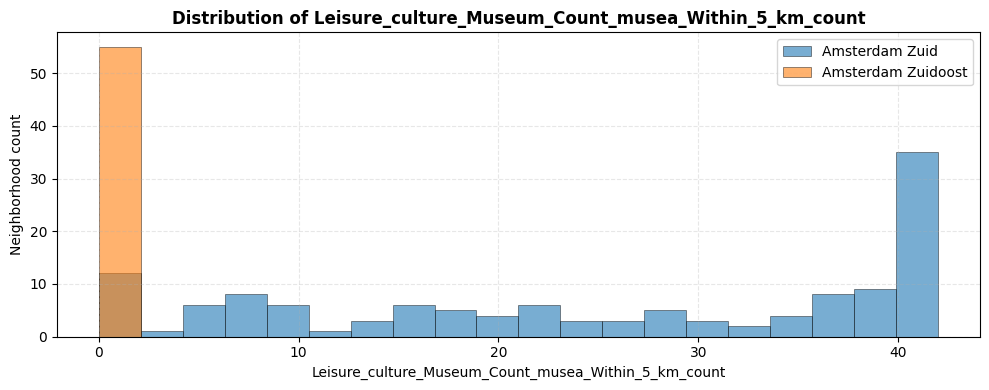

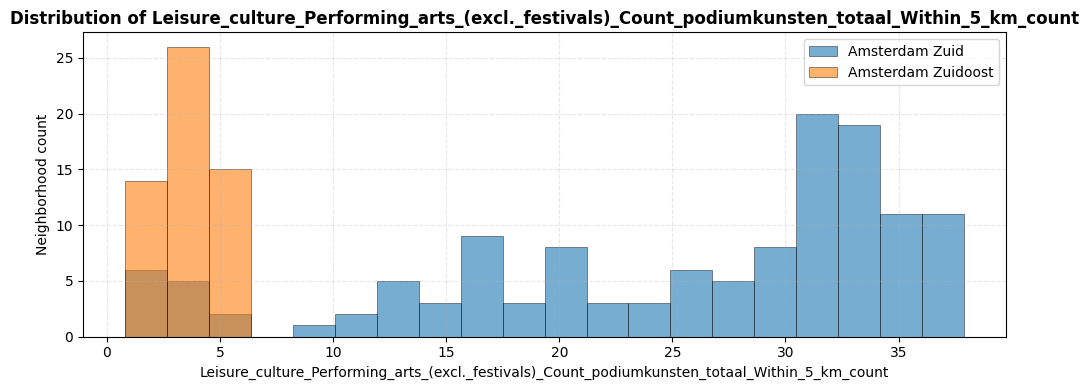

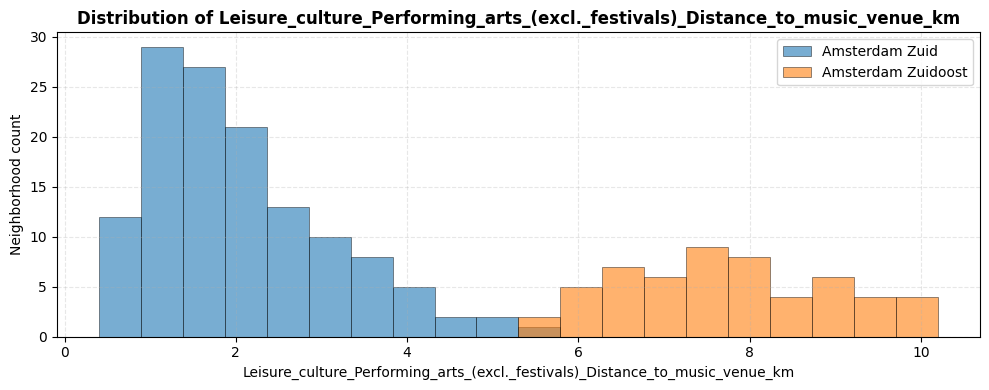

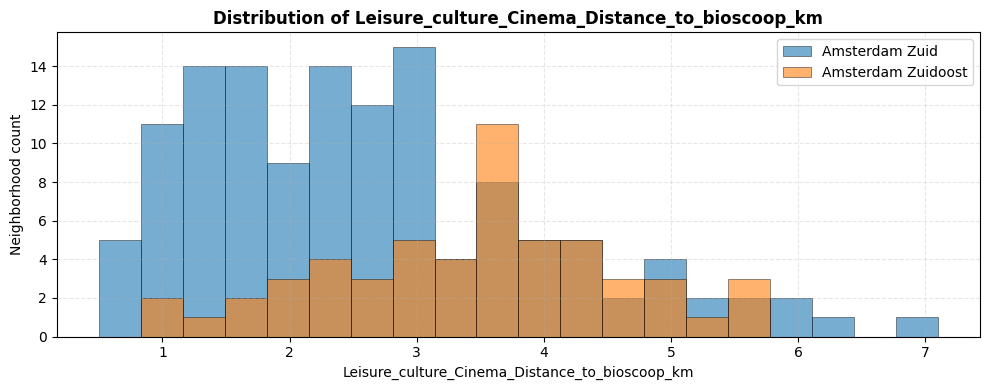

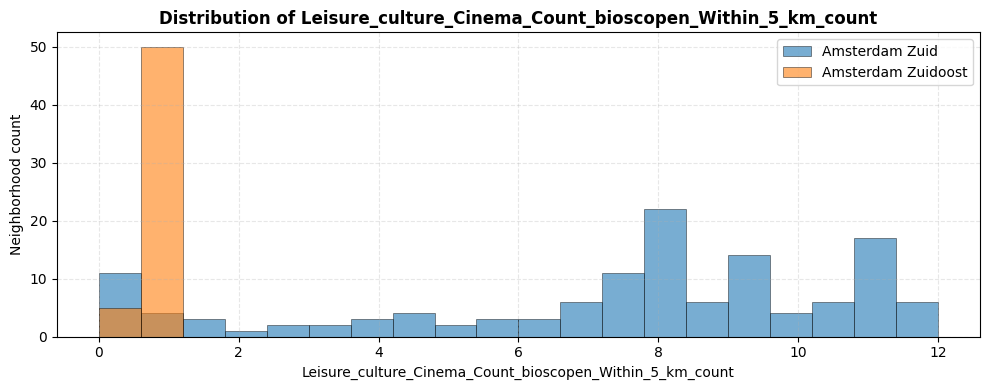

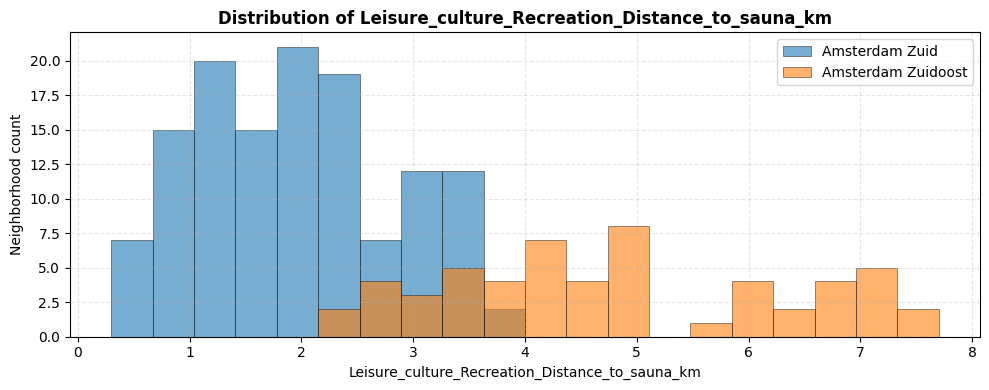

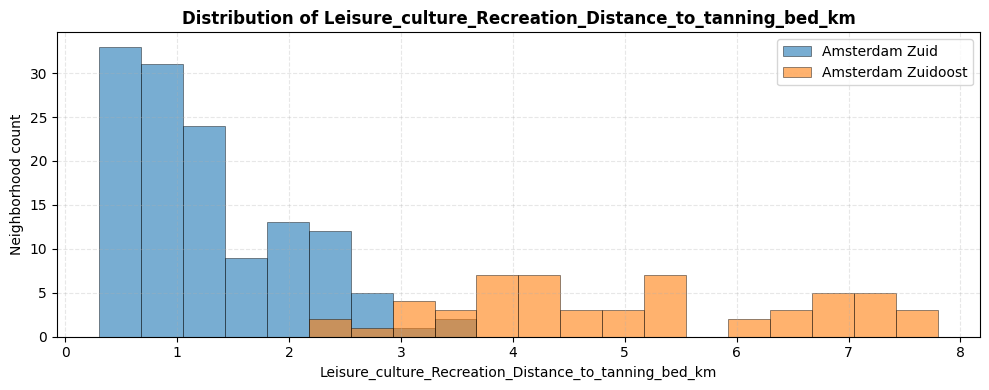

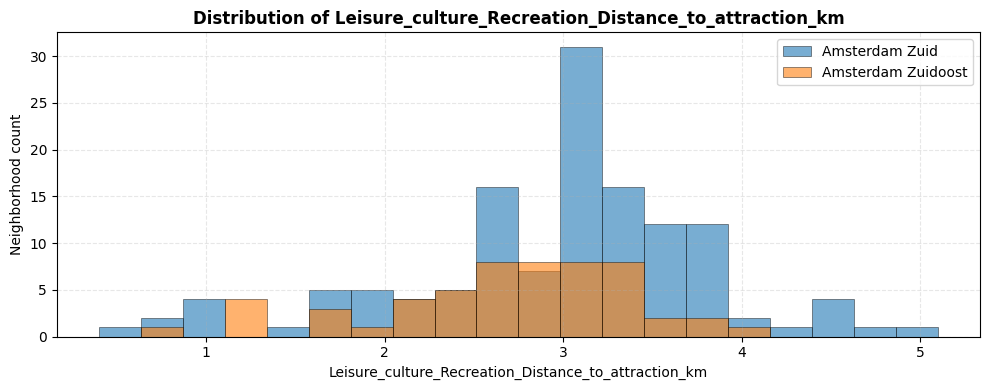

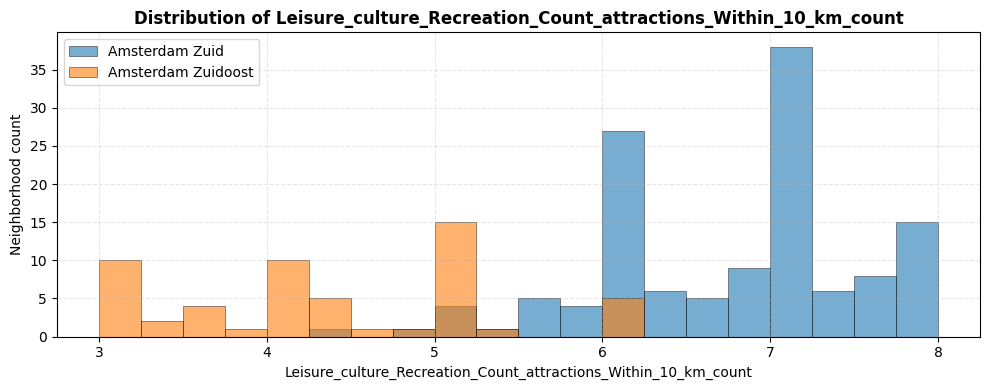

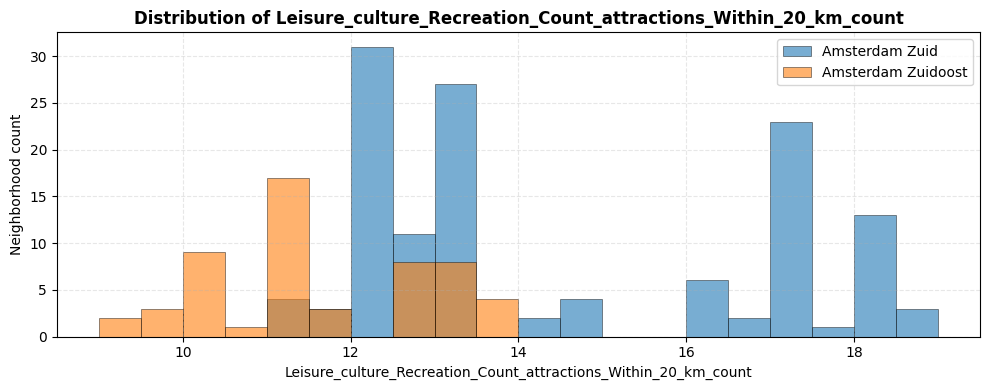

In [22]:
cols_to_compare = [
    # Health - GP
    "Health_GP_Distance_km",
    "Health_GP_Count_Within_1km",
    "Health_GP_Count_Within_3km",

    # Health - Hospital
    "Health_Hospital_incl_Distance_km",
    "Health_Hospital_incl_Count_Within_5km",
    "Health_Hospital_incl_Count_Within_10km",

    # Retail - Daily Grocery
    "Retail_Daily_grocery_Distance_to_large_supermarket_km",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count",
    "Retail_Daily_grocery_Distance_to_other_daily_goods_km",

    # Traffic & Transport
    "Traffic_transport_Distance_to_highway_ramp_km",
    "Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km",
    "Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km",

    # Leisure & Culture - General
    "Leisure_culture_Distance_to_bibliotheek_km",
    "Leisure_culture_Sport_Distance_to_indoor_pool_km",
    "Leisure_culture_Sport_Distance_to_ice_rink_km",

    # Leisure & Culture - Arts
    "Leisure_culture_Museum_Distance_to_museum_km",
    "Leisure_culture_Museum_Count_musea_Within_5_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km",
    "Leisure_culture_Cinema_Distance_to_bioscoop_km",
    "Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count",

    # Leisure & Culture - Recreation
    "Leisure_culture_Recreation_Distance_to_sauna_km",
    "Leisure_culture_Recreation_Distance_to_tanning_bed_km",
    "Leisure_culture_Recreation_Distance_to_attraction_km",
    "Leisure_culture_Recreation_Count_attractions_Within_10_km_count",
    "Leisure_culture_Recreation_Count_attractions_Within_20_km_count",
]
cols_to_compare = [
    c for c in cols_to_compare
    if c in amenities_zuid.columns and c in amenities_zuidoost.columns
]

print(f"\nDisplaying comparison plots for {len(cols_to_compare)} amenities\n")

for idx, col in enumerate(cols_to_compare):
    fig, ax = plt.subplots(figsize=(10, 4))

    zuid_data = amenities_zuid[col].dropna()
    zuidoost_data = amenities_zuidoost[col].dropna()

    combined_data = pd.concat([zuid_data, zuidoost_data])
    data_min = combined_data.min()
    data_max = combined_data.max()
    data_range = data_max - data_min

    if data_range == 0:
        bins = [data_min - 0.5, data_min + 0.5]
    else:
        is_integer_data = np.allclose(combined_data, combined_data.round(), rtol=1e-10)
        if data_range < 20 and is_integer_data:
            bins = np.arange(data_min, data_max + 2) - 0.5
        else:
            n_bins = min(30, max(15, int(np.ceil(data_range / max(0.1, data_range / 20)))))
            bins = np.linspace(data_min, data_max, n_bins + 1)

    ax.hist(zuid_data, bins=bins, alpha=0.6, label="Amsterdam Zuid",
            edgecolor="black", linewidth=0.5)
    ax.hist(zuidoost_data, bins=bins, alpha=0.6, label="Amsterdam Zuidoost",
            edgecolor="black", linewidth=0.5)

    ax.set_title(f"Distribution of {col}", fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Neighborhood count")
    ax.legend()
    ax.grid(True, alpha=0.3, linestyle="--")

    plt.tight_layout()
    plt.show()


Interpretation: ^

#### Full visual comparision between Zuid & Zuidoost

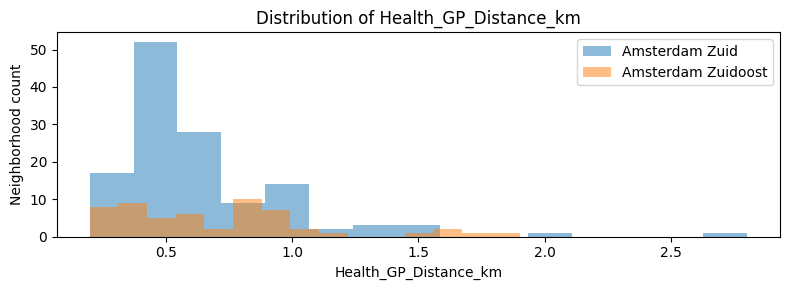

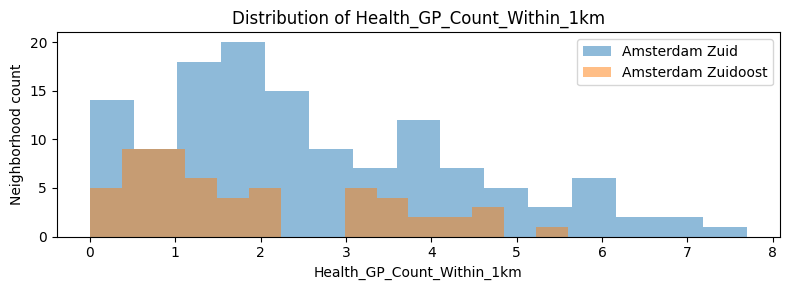

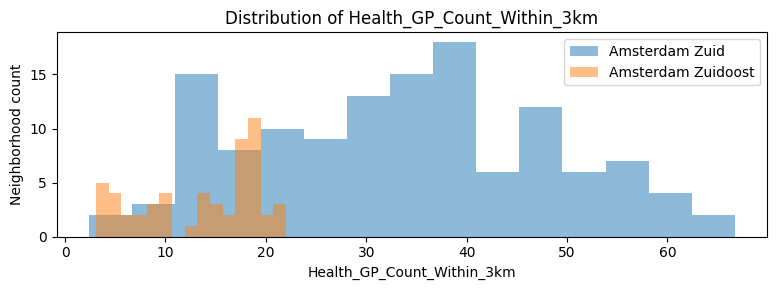

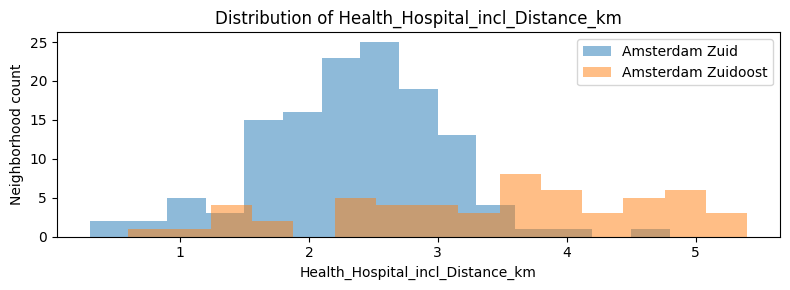

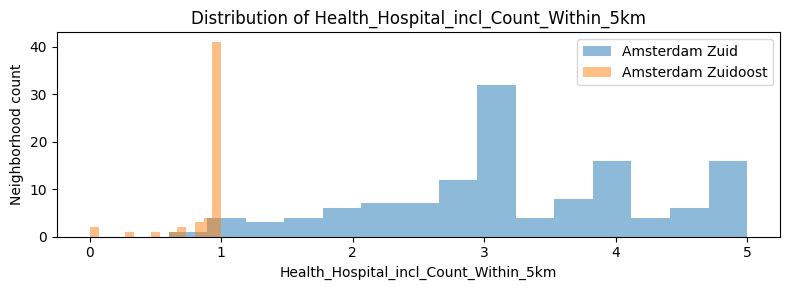

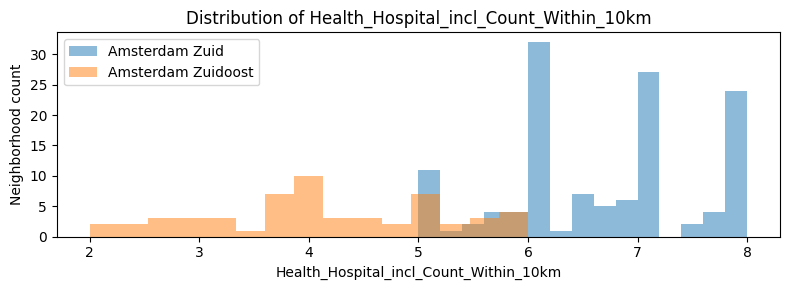


Creating comparison PDF: amenities_comparison_zuid_zuidoost_20251230_223310.pdf

  Processed 10/28 columns...
  Processed 20/28 columns...

 All amenity comparison plots have been exported to 'amenities_comparison_zuid_zuidoost_20251230_223310.pdf'
 Total: 28 comparison plots saved
 PDF opened in Preview: /Users/quynhmai/Documents/AAAHHHH/S3/gp3/1 copy/proximity to amentities/amenities_comparison_zuid_zuidoost_20251230_223310.pdf


In [23]:
for col in cols_to_compare[:6]:  # visualize a few columns
    plt.figure(figsize=(8,3))
    plt.hist(amenities_zuid[col].dropna(), bins=15, alpha=0.5, label='Amsterdam Zuid')
    plt.hist(amenities_zuidoost[col].dropna(), bins=15, alpha=0.5, label='Amsterdam Zuidoost')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Neighborhood count")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Visualize all amenities comparison and export to a PDF
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import numpy as np
import pandas as pd

# Create PDF file with timestamp
pdf_filename = f'amenities_comparison_zuid_zuidoost_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'
print(f"\nCreating comparison PDF: {pdf_filename}\n")

# Open PDF and plot each column
with PdfPages(pdf_filename) as pdf:
    for idx, col in enumerate(cols_to_compare):
        # Create figure for each comparison
        fig, ax = plt.subplots(figsize=(10, 4))
        
        # Get data for both districts
        zuid_data = amenities_zuid[col].dropna()
        zuidoost_data = amenities_zuidoost[col].dropna()
        
        # Calculate shared bins based on combined data range for fair comparison
        combined_data = pd.concat([zuid_data, zuidoost_data])
        data_min = combined_data.min()
        data_max = combined_data.max()
        
        # Use adaptive binning: more bins for wider ranges, fewer for narrow ranges
        # But ensure at least 10 bins and at most 30 bins
        data_range = data_max - data_min
        if data_range == 0:
            # If all values are the same, use a simple bin
            bins = [data_min - 0.5, data_min + 0.5]
        else:
            # Calculate appropriate number of bins based on data range
            # For integer-like data (counts), use integer bins
            # For continuous data, use more bins
            is_integer_data = np.allclose(combined_data, combined_data.round(), rtol=1e-10)
            if data_range < 20 and is_integer_data:
                # Integer data with small range - use integer bins
                n_bins = int(data_range) + 1
                bins = np.arange(data_min, data_max + 2) - 0.5  # Center bins on integers
            else:
                # Continuous or large range data - use adaptive binning
                # Use more bins for wider ranges, but cap at 30
                n_bins = min(30, max(15, int(np.ceil(data_range / max(0.1, data_range / 20)))))
                bins = np.linspace(data_min, data_max, n_bins + 1)
        
        # Plot histograms with shared bins
        ax.hist(zuid_data, bins=bins, alpha=0.6, label='Amsterdam Zuid', color='blue', edgecolor='black', linewidth=0.5)
        ax.hist(zuidoost_data, bins=bins, alpha=0.6, label='Amsterdam Zuidoost', color='orange', edgecolor='black', linewidth=0.5)
        
        # Formatting
        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Neighborhood count", fontsize=10)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3, linestyle='--')
        
        plt.tight_layout()
        
        # Save to PDF
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)  # Close figure to free memory
        
        # Print progress every 10 columns
        if (idx + 1) % 10 == 0:
            print(f"  Processed {idx + 1}/{len(cols_to_compare)} columns...")

print(f"\n All amenity comparison plots have been exported to '{pdf_filename}'")
print(f" Total: {len(cols_to_compare)} comparison plots saved")

# Automatically open the PDF in Preview to avoid SQLite/text editor errors
import subprocess
import os
try:
    pdf_path = os.path.abspath(pdf_filename)
    subprocess.run(['open', '-a', 'Preview', pdf_path], check=True)
    print(f" PDF opened in Preview: {pdf_path}")
except Exception as e:
    print(f"  Could not auto-open PDF. Please open manually: {pdf_filename}")
    print(f"   Error: {e}")



Interpretation: ^

## Reported health CSV

In [24]:
reported_health


GEBIED_NAAM  18_en_ouder  18_tot_65  65_en_ouder
0                        Nederland        69.00      72.00        60.00
1              Gemeente: Amsterdam        66.80      69.60        52.20
2                              NaN          NaN        NaN          NaN
3                              AMC        48.60      49.80          NaN
4            Aalsmeerwegbuurt Oost        72.60      75.10        55.90
..                             ...          ...        ...          ...
477  Zuidwestkwadrant Osdorp Noord        56.90      61.80        36.20
478   Zuidwestkwadrant Osdorp Zuid        64.00      65.90        48.10
479                     Zunderdorp        76.60      81.70        64.50
480                    Zwarte Gouw          NaN        NaN          NaN
481                    de Plantage        75.80      78.70        66.10

[482 rows x 4 columns]

In [25]:
print("Original reported health shape:", reported_health.shape)
reported_health.columns


Original reported health shape: (482, 4)


Index(['GEBIED_NAAM', '18_en_ouder', '18_tot_65', '65_en_ouder'], dtype='object')

In [26]:
reported_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEBIED_NAAM  481 non-null    object 
 1   18_en_ouder  446 non-null    float64
 2   18_tot_65    445 non-null    float64
 3   65_en_ouder  402 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


There are some null values that need to be deal with later in data cleanign

In [27]:
reported_health.describe()

18_en_ouder  18_tot_65  65_en_ouder
count       446.00     445.00       402.00
mean         68.73      71.21        54.93
std           7.47       7.09        10.59
min          46.00      49.40        30.30
25%          63.52      66.30        46.60
50%          70.00      72.60        55.35
75%          74.50      76.10        63.15
max          86.00      85.90        76.10

Mean reported health
- 18+ : 68.73% reported good health
- 18-65 : 71.21% reported good health
- 65+ : 54.93% reported good health

In [28]:
# display all in GEBIED_NAAM column
print(reported_health['GEBIED_NAAM'].unique())

# display all in GEBIED_NAAM column
print(reported_health['GEBIED_NAAM'].unique())



['Nederland' 'Gemeente: Amsterdam' nan 'AMC' 'Aalsmeerwegbuurt Oost'
 'Aalsmeerwegbuurt West' 'Afrikahaven' 'Alexanderplein e.o.'
 'Alfa-driehoek' 'Amerikahaven' 'Amstel III deel A/B Noord'
 'Amstel III deel A/B Zuid' 'Amstel III deel C/D Noord'
 'Amstel III deel C/D Zuid' 'Amstelglorie' 'Amstelkwartier Noord'
 'Amstelkwartier West' 'Amstelkwartier Zuid' 'Amstelpark'
 'Amstelveldbuurt' 'Amsterdamse Bos' 'Amsterdamse Poort' 'Andreasterrein'
 'Anjeliersbuurt Noord' 'Anjeliersbuurt Zuid' 'Architectenbuurt'
 'BG-terrein e.o.' 'Baanakkerspark Noord' 'Baanakkerspark Zuid'
 'Balboaplein e.o.' 'Banne Noordoost' 'Banne Noordwest' 'Banne Zuidoost'
 'Banne Zuidwest' 'Banpleinbuurt' 'Beatrixpark' 'Bedrijvencentrum Osdorp'
 'Bedrijvencentrum Westerkwartier' 'Bedrijvengebied Cruquiusweg'
 'Bedrijvengebied Veelaan' 'Bedrijvengebied Zeeburgerkade'
 'Bedrijvenpark Lutkemeer' 'Bedrijventerrein Hamerstraat'
 'Bedrijventerrein Landlust' 'Bedrijventerrein Nieuwendammerdijk'
 'Bedrijventerrein Schinkel' 'Be

### Catergorised health report into Zuid & Zuidoost

In [29]:
# Sort the reported health data into neighborhoods zuid and zuidoost
# First, apply the same categorization function used for amenities data

# Amsterdam Zuidoost (Southeast) - Bijlmer and surrounding areas
zuidoost_keywords = [
    # Letter neighborhoods (Bijlmer)
    'D-buurt', 'E-buurt', 'F-buurt', 'G-buurt', 'H-buurt', 'K-buurt', 'L-buurt',
    # Bijlmer specific areas
    'Bijlmermuseum', 'Ganzenhoef', 'Geerdinkhof', 'Kantershof', 'Grunder', 'Koningshoef',
    'Gooise Kant', 'Kortvoort', 'Kelbergen', 'De Kameleon',
    # Holendrecht and surrounding
    'Holendrecht',
    # Reigersbos
    'Reigersbos',
    # Gein
    'Gein',
    # Other Zuidoost areas
    'Nellestein', 'Venserpolder', 'Amsterdamse Poort', 'Amstel III', 'AMC', 'Hoge Dijk',
    'Hoptille', 'Hakfort', 'Huigenbos', 'Huntum', 'Vogeltjeswei', 'Rechte H-buurt',
    'Gaasperpark', 'Hoofdcentrum-Zuidoost', 'Bullewijk'
]

# Amsterdam Zuid (South) - Museum Quarter, De Pijp, Zuidas, Buitenveldert, etc.
zuid_keywords = [
    # Museum Quarter and surrounding
    'Museumkwartier', 'Concertgebouwbuurt', 'Cornelis Schuytbuurt', 'P.C. Hooftbuurt',
    'Willemspark', 'Valeriusbuurt',
    # De Pijp
    'Oude Pijp', 'Nieuwe Pijp', 'Zuid Pijp', 'Sarphatiparkbuurt', 'Frans Halsbuurt',
    'Gerard Doubuurt', 'Hercules Seghersbuurt', 'Hemonybuurt', 'Cornelis Troostbuurt',
    'Lizzy Ansinghbuurt', 'Van der Helstpleinbuurt', 'Willibrordusbuurt',
    'BurgemeesterTellegenbuurt', 'Burgemeester Tellegenbuurt',
    # Zuidas and business district
    'Zuidas', 'Kop Zuidas', 'RAI', 'VU-kwartier', 'Vivaldi',
    # Buitenveldert
    'Buitenveldert', 'Gelderlandpleinbuurt', 'De Klenckebuurt', 'Amstelpark', 'Zuiderhof',
    # Stadionbuurt and Olympic area
    'Stadionbuurt', 'Olympisch Stadion', 'Marathonbuurt', 'Bertelmanpleinbuurt',
    # Apollobuurt and surrounding
    'Apollobuurt', 'Hiltonbuurt', 'Minervabuurt', 'Beethovenbuurt', 'Diepenbrockbuurt',
    # Scheldebuurt and Rijnbuurt
    'Scheldebuurt', 'Wielingenbuurt', 'Veluwebuurt', 'IJselbuurt', 'Rijnbuurt',
    'Kromme Mijdrechtbuurt', 'Zorgvlied', 'Prinses Irenebuurt',
    # Vondelpark area
    'Vondelparkbuurt', 'Helmersbuurt', 'Cremerbuurt', 'Overtoomse Sluis',
    # Other Zuid areas
    'Diamantbuurt', 'Van Tuyllbuurt', 'IJsbaanpad', 'Duivelseiland', 'Harmoniehofbuurt',
    'Banpleinbuurt', 'Hondecoeterbuurt', 'Johannes Vermeerbuurt',
    # Schinkel area
    'Schinkelbuurt', 'Bedrijventerrein Schinkel', 'Aalsmeerwegbuurt', 'Surinamepleinbuurt',
    'Legmeerpleinbuurt', 'Hoofddorppleinbuurt', 'Westlandgrachtbuurt', 'Westlandgracht',
    'Nieuwe Meer', 'Riekerpolder', 'Riekerhaven', 'Delflandpleinbuurt',
    # Sloten area (southern part of Zuid)
    'Sloten', 'Nieuw-Sloten', 'Dorp Sloten', 'Belgiëplein', 'Sloterweg', 'Park Haagseweg',
    'Schipluidenbuurt', 'Koningin Wilhelminaplein', 'Andreasterrein',
    # Slotervaart (southern part)
    'Slotervaart', 'Medisch Centrum Slotervaart', 'Staalmanbuurt', 'Louis Crispijnbuurt',
    'Jacques Veltmanbuurt', 'Johan Jongkindbuurt', 'Rembrandtpark',
    'Overtoomse Veld', 'Lucas/Andreasziekenhuis', 'Jacob Geelbuurt', 'Emanuel van Meterenbuurt',
    'Oostoever Sloterplas'
]

def categorize_area(area_name):
    """
    Categorize an area name into Amsterdam Zuid, Amsterdam Zuidoost, or Other.
    """
    area_name_str = str(area_name).strip()
    
    # Check for Zuidoost
    for keyword in zuidoost_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuidoost'
    
    # Check for Zuid
    for keyword in zuid_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuid'
    
    return 'Other'

# Apply categorization to reported_health data
# Use GEBIED_NAAM column and normalize names (handle spaces vs hyphens)
def normalize_area_name(name):
    """Normalize area name by converting hyphens to spaces for consistent matching"""
    if pd.isna(name):
        return ""
    name_str = str(name).strip()
    # Replace hyphens with spaces for matching (handles both formats)
    return name_str.replace('-', ' ').lower()

# Create a normalized version for matching
reported_health['area_name_normalized'] = reported_health['GEBIED_NAAM'].apply(normalize_area_name)

# Update categorize_area to work with normalized names
def categorize_area_normalized(area_name_normalized):
    """
    Categorize an area name into Amsterdam Zuid, Amsterdam Zuidoost, or Other.
    Works with normalized names (spaces instead of hyphens).
    """
    if not area_name_normalized or area_name_normalized == 'nan':
        return 'Other'
    
    area_name_str = str(area_name_normalized).strip().lower()
    
    # Normalize keywords for matching (convert hyphens to spaces)
    zuidoost_keywords_normalized = [k.replace('-', ' ').lower() for k in zuidoost_keywords]
    zuid_keywords_normalized = [k.replace('-', ' ').lower() for k in zuid_keywords]
    
    # Check for Zuidoost
    for keyword in zuidoost_keywords_normalized:
        if keyword in area_name_str:
            return 'Amsterdam Zuidoost'
    
    # Check for Zuid
    for keyword in zuid_keywords_normalized:
        if keyword in area_name_str:
            return 'Amsterdam Zuid'
    
    return 'Other'

# Apply categorization using normalized names
reported_health['district'] = reported_health['area_name_normalized'].apply(categorize_area_normalized)

# Sort the reported health data into neighborhoods zuid and zuidoost
reported_health_zuid = reported_health[reported_health['district'] == 'Amsterdam Zuid']
reported_health_zuidoost = reported_health[reported_health['district'] == 'Amsterdam Zuidoost']

# Display summary
print("="*70)
print("REPORTED HEALTH DATA CATEGORIZATION")
print("="*70)
print(f"\nTotal areas in reported_health: {len(reported_health)}")
print(f"\nDistribution by district:")
print(reported_health['district'].value_counts())
print(f"\nAmsterdam Zuid: {len(reported_health_zuid)} neighborhoods")
print(f"Amsterdam Zuidoost: {len(reported_health_zuidoost)} neighborhoods")

# Save the reported health data into neighborhoods zuid and zuidoost
reported_health_zuid.to_csv('reported_health_zuid.csv', index=False)
reported_health_zuidoost.to_csv('reported_health_zuidoost.csv', index=False)

print(f"\n Saved reported_health_zuid.csv ({len(reported_health_zuid)} rows)")
print(f" Saved reported_health_zuidoost.csv ({len(reported_health_zuidoost)} rows)")

REPORTED HEALTH DATA CATEGORIZATION

Total areas in reported_health: 482

Distribution by district:
district
Other                 331
Amsterdam Zuid        104
Amsterdam Zuidoost     47
Name: count, dtype: int64

Amsterdam Zuid: 104 neighborhoods
Amsterdam Zuidoost: 47 neighborhoods

 Saved reported_health_zuid.csv (104 rows)
 Saved reported_health_zuidoost.csv (47 rows)


## Compare Zuid & Zuidoost reported health

/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_18855/3317894657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_18855/3317894657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_18855/3317894657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


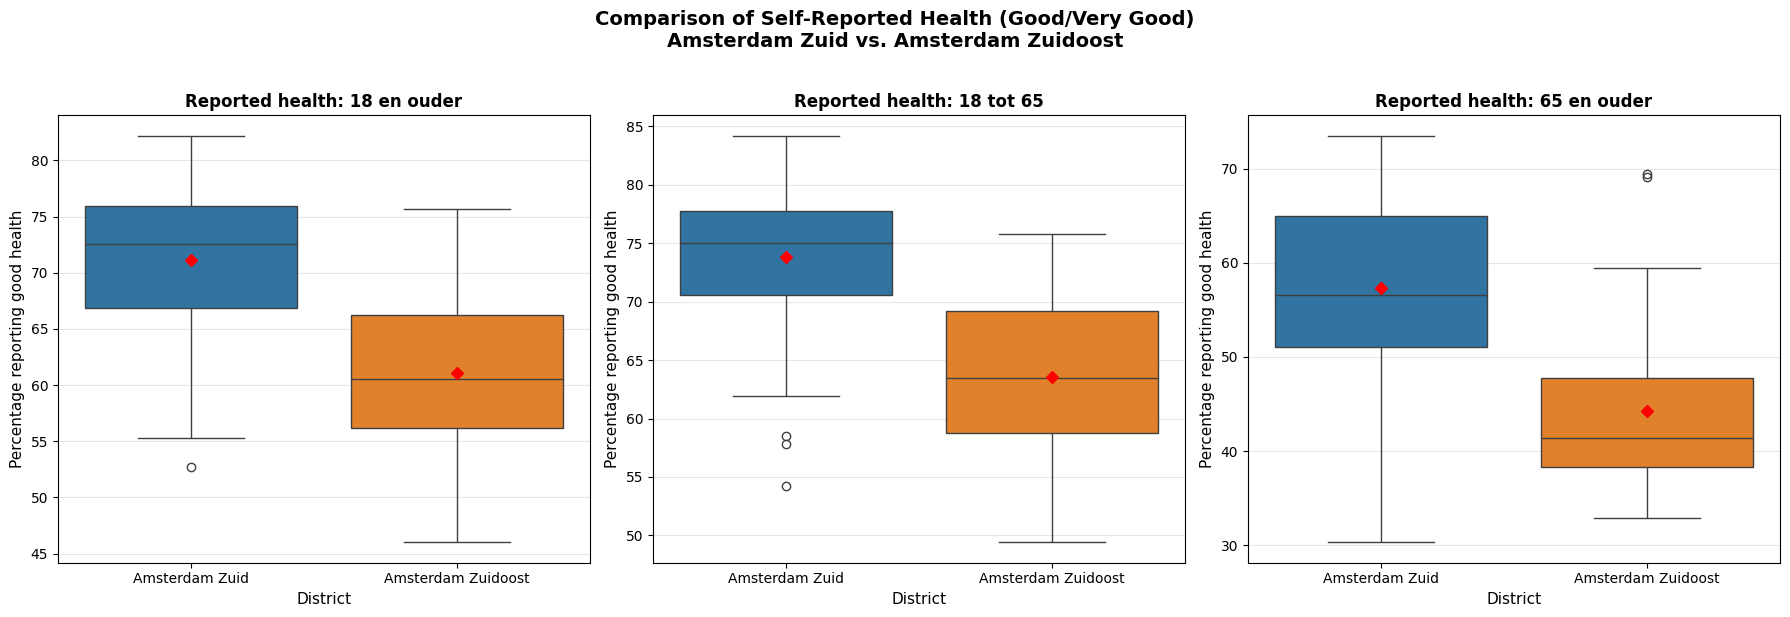

In [30]:
import seaborn as sns
# Compare reported health data between zuid and zuidoost with visualizations

# Identify the columns of interest (reported percentages)
health_cols = ['18_en_ouder', '18_tot_65', '65_en_ouder']

# Prepare data for plotting - combine both districts with district labels
plot_data_list = []
for col in health_cols:
    # Zuid data
    zuid_df = pd.DataFrame({
        'value': reported_health_zuid[col].dropna(),
        'district': 'Amsterdam Zuid',
        'age_group': col.replace('_', ' ')
    })
    # Zuidoost data
    zuidoost_df = pd.DataFrame({
        'value': reported_health_zuidoost[col].dropna(),
        'district': 'Amsterdam Zuidoost',
        'age_group': col.replace('_', ' ')
    })
    plot_data_list.append(pd.concat([zuid_df, zuidoost_df], ignore_index=True))

# Combine all data
plot_data = pd.concat(plot_data_list, ignore_index=True)

# Set up side-by-side boxplots to compare Zuid vs. Zuidoost
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Color palette: blue for Zuid, orange for Zuidoost (matching the amenities plots)
colors = {'Amsterdam Zuid': '#1f77b4', 'Amsterdam Zuidoost': '#ff7f0e'}

for i, col in enumerate(health_cols):
    age_group = col.replace('_', ' ')
    # Filter data for this age group
    age_data = plot_data[plot_data['age_group'] == age_group]
    
    # Create boxplot with colors
    sns.boxplot(
        data=age_data,
        x='district',
        y='value',
        palette=[colors['Amsterdam Zuid'], colors['Amsterdam Zuidoost']],
        showmeans=True,
        meanprops={'marker': 'D', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 6},
        ax=axes[i]
    )
    
    axes[i].set_xlabel('District', fontsize=11)
    axes[i].set_ylabel('Percentage reporting good health', fontsize=11)
    axes[i].set_title(f'Reported health: {age_group}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Comparison of Self-Reported Health (Good/Very Good)\nAmsterdam Zuid vs. Amsterdam Zuidoost', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [31]:
#Summary statistics

print("\nSummary statistics for Amsterdam Zuid:")
print(reported_health_zuid[health_cols].describe())
print("\nSummary statistics for Amsterdam Zuidoost:")
print(reported_health_zuidoost[health_cols].describe())



Summary statistics for Amsterdam Zuid:
       18_en_ouder  18_tot_65  65_en_ouder
count       103.00     102.00        95.00
mean         71.10      73.80        57.32
std           6.25       5.89         9.59
min          52.70      54.20        30.30
25%          66.90      70.60        51.05
50%          72.60      75.05        56.60
75%          75.95      77.78        65.00
max          82.20      84.20        73.50

Summary statistics for Amsterdam Zuidoost:
       18_en_ouder  18_tot_65  65_en_ouder
count        46.00      46.00        38.00
mean         61.10      63.58        44.29
std           7.87       7.15         9.03
min          46.00      49.40        32.90
25%          56.23      58.73        38.32
50%          60.55      63.50        41.35
75%          66.28      69.20        47.80
max          75.70      75.80        69.40


### T-test for significance for mean reported health between Zuid & Zuidoost

In [32]:
# Compute t-test for '18_en_ouder' between the two districts
reported_health_combined = pd.concat([reported_health_zuid[["district"] + health_cols], reported_health_zuidoost[["district"] + health_cols]])
reported_health_combined.reset_index(drop=True, inplace=True)
reported_health_combined

reported_health_combined.groupby("district")["18_en_ouder"].mean()



district
Amsterdam Zuid       71.10
Amsterdam Zuidoost   61.10
Name: 18_en_ouder, dtype: float64

In [33]:

def t_test_reported_health(age_group):
    import scipy.stats as stats
    t_statistic, p_value = stats.ttest_ind(a = reported_health_combined.loc[reported_health_combined["district"] == "Amsterdam Zuid", age_group], # vector of values for TG
                                          b = reported_health_combined.loc[reported_health_combined["district"] == "Amsterdam Zuidoost", age_group], # vector of values for MG
                                          alternative = 'two-sided',
                                          nan_policy = 'omit')
    
    print(f'Test for age group: {age_group.replace("_", " ")}')
    print(f't-statistic: {t_statistic}')
    print(f'p-value: {p_value}')
    
    # Conclusions
    alpha = 0.05
    if p_value < alpha:
      print(f'p-value of {round(p_value,3)} is lower than the alpha value of {alpha}. \nThe null hypothesis should be rejected. \
    \nThe mean values in two groups are stastically significantly different.\n')
      
    else:
        print(f'p-value of {round(p_value,3)} is higher than alpha value of {alpha}. \nThe null hypothesis should be retained. \
    \nThe mean values in two groups are not stastically significantly different.\n')
        
t_test_reported_health("18_en_ouder")
t_test_reported_health("18_tot_65")
t_test_reported_health("65_en_ouder")

Test for age group: 18 en ouder
t-statistic: 8.30879015461292
p-value: 5.880589820873993e-14
p-value of 0.0 is lower than the alpha value of 0.05. 
The null hypothesis should be rejected.     
The mean values in two groups are stastically significantly different.

Test for age group: 18 tot 65
t-statistic: 9.123292874146196
p-value: 5.386752073440468e-16
p-value of 0.0 is lower than the alpha value of 0.05. 
The null hypothesis should be rejected.     
The mean values in two groups are stastically significantly different.

Test for age group: 65 en ouder
t-statistic: 7.193732690497058
p-value: 4.346930591400765e-11
p-value of 0.0 is lower than the alpha value of 0.05. 
The null hypothesis should be rejected.     
The mean values in two groups are stastically significantly different.



=> There is a statistically significant difference between the reported health in different age groups in Zuid vs. Zuidoost.

In [34]:
amenities

area_name                         municipality_name  \
0              Amsterdam  Amsterdam                                  
1        Haarlemmerbuurt  Amsterdam                                  
2    Planciusbuurt-Noord  Amsterdam                                  
3    Westelijke eilanden  Amsterdam                                  
4       Westerdokseiland  Amsterdam                                  
..                   ...                                       ...   
582                 Gein  Amsterdam                                  
583               Gein 1  Amsterdam                                  
584               Gein 2  Amsterdam                                  
585               Gein 3  Amsterdam                                  
586               Gein 4  Amsterdam                                  

    region_type  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0    Gemeente                     0.60                        3.00   
1    Wijk                         0.50                        3.50   
2    Buurt                        0.80                        3.80   
3    Buurt                        0.90                        1.50   
4    Buurt                        0.20                        2.00   
..          ...                    ...                         ...   
582  Wijk                         0.80                        0.70   
583  Buurt                        0.80                        0.60   
584  Buurt                        0.80                        1.00   
585  Buurt                        1.00                        0.50   
586  Buurt                        0.80                        0.80   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                         28.00                       66.80   
1                         30.30                       89.00   
2                         28.00                       77.80   
3                         26.90                       75.60   
4                         28.60                       93.00   
..                          ...                         ...   
582                        4.30                       22.90   
583                        7.20                       24.50   
584                        3.50                       21.80   
585                        3.10                       22.80   
586                        3.30                       22.00   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                 3.30                         0.70   
1                                 4.60                         0.90   
2                                 4.50                         0.60   
3                                 4.80                         0.90   
4                                 4.50                         1.40   
..                                 ...                          ...   
582                               3.60                         0.90   
583                               3.20                         0.80   
584                               3.60                         0.80   
585                               3.80                         1.00   
586                               3.70                         0.90   

     Health_Hospital_incl_Distance_km  ...  \
0                                2.60  ...   
1                                2.00  ...   
2                                2.40  ...   
3                                2.40  ...   
4                                2.00  ...   
..                                ...  ...   
582                              3.60  ...   
583                              3.20  ...   
584                              3.60  ...   
585                              3.80  ...   
586                              3.70  ...   

     Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count  \
0                                                        5.70   
1                                       

# Merge CSVs

In [35]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thefuzz import process

amenities['Name_clean'] = amenities['area_name'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()
reported_health['Name_clean'] = reported_health['GEBIED_NAAM'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()

def best_match(x, choices):
    result = process.extractOne(x, choices)
    if result:
        match, score, _ = result  # ignore the index
        return match if score > 85 else None
    return None


amenities['match'] = amenities['Name_clean'].apply(lambda x: best_match(x, reported_health['Name_clean']))

# Merge based on matched names
merged_df = pd.merge(amenities, reported_health, left_on='match', right_on='Name_clean', how='left')
merged_df = merged_df.dropna()

merged_df.to_csv('merged.csv', index=False) 

In [36]:
merged_df

area_name                         municipality_name  \
0              Amsterdam  Amsterdam                                  
1        Haarlemmerbuurt  Amsterdam                                  
2    Planciusbuurt-Noord  Amsterdam                                  
3    Westelijke eilanden  Amsterdam                                  
4       Westerdokseiland  Amsterdam                                  
..                   ...                                       ...   
582                 Gein  Amsterdam                                  
583               Gein 1  Amsterdam                                  
584               Gein 2  Amsterdam                                  
585               Gein 3  Amsterdam                                  
586               Gein 4  Amsterdam                                  

    region_type  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0    Gemeente                     0.60                        3.00   
1    Wijk                         0.50                        3.50   
2    Buurt                        0.80                        3.80   
3    Buurt                        0.90                        1.50   
4    Buurt                        0.20                        2.00   
..          ...                    ...                         ...   
582  Wijk                         0.80                        0.70   
583  Buurt                        0.80                        0.60   
584  Buurt                        0.80                        1.00   
585  Buurt                        1.00                        0.50   
586  Buurt                        0.80                        0.80   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                         28.00                       66.80   
1                         30.30                       89.00   
2                         28.00                       77.80   
3                         26.90                       75.60   
4                         28.60                       93.00   
..                          ...                         ...   
582                        4.30                       22.90   
583                        7.20                       24.50   
584                        3.50                       21.80   
585                        3.10                       22.80   
586                        3.30                       22.00   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                 3.30                         0.70   
1                                 4.60                         0.90   
2                                 4.50                         0.60   
3                                 4.80                         0.90   
4                                 4.50                         1.40   
..                                 ...                          ...   
582                               3.60                         0.90   
583                               3.20                         0.80   
584                               3.60                         0.80   
585                               3.80                         1.00   
586                               3.70                         0.90   

     Health_Hospital_incl_Distance_km  ...          district_x  \
0                                2.60  ...               Other   
1                                2.00  ...               Other   
2                                2.40  ...               Other   
3                                2.40  ...               Other   
4                                2.00  ...               Other   
..                                ...  ...                 ...   
582                              3.60  ...  Amsterdam Zuidoost   
583                              3.20  ...  Amsterdam Zuidoost   
584                              3.60  ...  Amsterdam Zuidoost   
585                              3.80  ...  Amsterdam Zuidoost 

In [37]:
df = merged_df.drop(columns=['area_name', 'municipality_name', 'region_type', 'Name_clean_x', 'match', 'GEBIED_NAAM', 'area_name_normalized', 'district_y','Name_clean_y'])
df

Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0                     0.60                        3.00   
1                     0.50                        3.50   
2                     0.80                        3.80   
3                     0.90                        1.50   
4                     0.20                        2.00   
..                     ...                         ...   
582                   0.80                        0.70   
583                   0.80                        0.60   
584                   0.80                        1.00   
585                   1.00                        0.50   
586                   0.80                        0.80   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                         28.00                       66.80   
1                         30.30                       89.00   
2                         28.00                       77.80   
3                         26.90                       75.60   
4                         28.60                       93.00   
..                          ...                         ...   
582                        4.30                       22.90   
583                        7.20                       24.50   
584                        3.50                       21.80   
585                        3.10                       22.80   
586                        3.30                       22.00   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                 3.30                         0.70   
1                                 4.60                         0.90   
2                                 4.50                         0.60   
3                                 4.80                         0.90   
4                                 4.50                         1.40   
..                                 ...                          ...   
582                               3.60                         0.90   
583                               3.20                         0.80   
584                               3.60                         0.80   
585                               3.80                         1.00   
586                               3.70                         0.90   

     Health_Hospital_incl_Distance_km  Health_Hospital_incl_Count_Within_5km  \
0                                2.60                                   2.00   
1                                2.00                                   2.40   
2                                2.40                                   2.00   
3                                2.40                                   1.90   
4                                2.00                                   2.10   
..                                ...                                    ...   
582                              3.60                                   1.00   
583                              3.20                                   1.00   
584                              3.60                                   1.00   
585                              3.80                                   1.00   
586                              3.70                                   1.00   

     Health_Hospital_incl_Count_Within_10km  \
0                                      5.40   
1                                      6.00   
2                                      6.00   
3                                      6.00   
4                                      6.00   
..                                      ...   
582                                    2.60   
583                                    3.10   
584                                    2.50   
585                                    2.50   
586                                    2.10   

     Health_Hospital_incl_Count_Within_20km  ...  \
0                                     12.90  ...   
1                                     14.10  ...   
2               

# Linear regression

## Variables

In [38]:
regressors = [
    "Health_GP_Distance_km",
    "Health_GP_Count_Within_1km",
    "Health_GP_Count_Within_3km", 
    "Health_GP_Count_Within_5km",
    "Health_GP_after_hours_Distance_km",
    "Health_Pharmacy_Distance_km",
    "Health_Hospital_incl_Distance_km",
    "Health_Hospital_incl_Count_Within_5km",
    "Health_Hospital_incl_Count_Within_10km",
    "Health_Hospital_incl_Count_Within_20km",
    "Health_Hospital_excl_Distance_km",
    "Health_Hospital_excl_Count_Within_5km",
    "Health_Hospital_excl_Count_Within_10km",
    "Health_Hospital_excl_Count_Within_20km",
    "Retail_Daily_grocery_Distance_to_large_supermarket_km",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count",
    "Retail_Daily_grocery_Distance_to_other_daily_goods_km",
    "Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count",
    "Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_3_km_count",
    "Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_5_km_count",
    "Hospitality_Cafes_Distance_to_café_e.d._km",
    "Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count",
    "Hospitality_Cafes_Count_cafés_e.d._Within_3_km_count",
    "Hospitality_Cafes_Count_cafés_e.d._Within_5_km_count",
    "Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_1_km_count",
    "Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_3_km_count",
    "Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_5_km_count",
    "Hospitality_Restaurants_Distance_to_restaurant_km",
    "Hospitality_Restaurants_Count_restaurants_Within_1_km_count",
    "Hospitality_Restaurants_Count_restaurants_Within_3_km_count",
    "Hospitality_Restaurants_Count_restaurants_Within_5_km_count",
    "Traffic_transport_Distance_to_highway_ramp_km",
    "Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km",
    "Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km",
    "Leisure_culture_Distance_to_bibliotheek_km",
    "Leisure_culture_Sport_Distance_to_indoor_pool_km",
    "Leisure_culture_Sport_Distance_to_ice_rink_km",
    "Leisure_culture_Museum_Distance_to_museum_km",
    "Leisure_culture_Museum_Count_musea_Within_5_km_count",
    "Leisure_culture_Museum_Count_musea_Within_10_km_count",
    "Leisure_culture_Museum_Count_musea_Within_20_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_10_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_20_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km",
    "Leisure_culture_Cinema_Distance_to_bioscoop_km",
    "Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count",
    "Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count",
    "Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count",
    "Leisure_culture_Recreation_Distance_to_sauna_km",
    "Leisure_culture_Recreation_Distance_to_tanning_bed_km",
    "Leisure_culture_Recreation_Distance_to_attraction_km",
    "Leisure_culture_Recreation_Count_attractions_Within_10_km_count",
    "Leisure_culture_Recreation_Count_attractions_Within_20_km_count",
    "Leisure_culture_Recreation_Count_attractions_Within_50_km_count",
]

# One-hot encode district name
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)
district_encoder_one_hot = encoder.fit_transform(df[['district_x']])
district_encoder_categories = encoder.get_feature_names_out(['district_x'])
district_encoder_one_hot = pd.DataFrame(district_encoder_one_hot, columns=district_encoder_categories, index=df.index)

In [39]:
import statsmodels.api as sm

X = pd.concat([merged_df[regressors], district_encoder_one_hot], axis=1)

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Define target variable
y = merged_df['18_en_ouder']

# Convert everything to float
X_with_const = X_with_const.astype(float)
y = y.astype(float)

df = pd.DataFrame.join(y, X_with_const)
df

18_en_ouder  const  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0          66.80   1.00                   0.60                        3.00   
1          71.50   1.00                   0.50                        3.50   
2          67.90   1.00                   0.80                        3.80   
3          70.30   1.00                   0.90                        1.50   
4          71.20   1.00                   0.20                        2.00   
..           ...    ...                    ...                         ...   
582        73.00   1.00                   0.80                        0.70   
583        73.00   1.00                   0.80                        0.60   
584        73.00   1.00                   0.80                        1.00   
585        73.00   1.00                   1.00                        0.50   
586        61.60   1.00                   0.80                        0.80   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                         28.00                       66.80   
1                         30.30                       89.00   
2                         28.00                       77.80   
3                         26.90                       75.60   
4                         28.60                       93.00   
..                          ...                         ...   
582                        4.30                       22.90   
583                        7.20                       24.50   
584                        3.50                       21.80   
585                        3.10                       22.80   
586                        3.30                       22.00   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                 3.30                         0.70   
1                                 4.60                         0.90   
2                                 4.50                         0.60   
3                                 4.80                         0.90   
4                                 4.50                         1.40   
..                                 ...                          ...   
582                               3.60                         0.90   
583                               3.20                         0.80   
584                               3.60                         0.80   
585                               3.80                         1.00   
586                               3.70                         0.90   

     Health_Hospital_incl_Distance_km  Health_Hospital_incl_Count_Within_5km  \
0                                2.60                                   2.00   
1                                2.00                                   2.40   
2                                2.40                                   2.00   
3                                2.40                                   1.90   
4                                2.00                                   2.10   
..                                ...                                    ...   
582                              3.60                                   1.00   
583                              3.20                                   1.00   
584                              3.60                                   1.00   
585                              3.80                                   1.00   
586                              3.70                                   1.00   

     ...  Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count  \
0    ...                                                      19.10   
1    ...                                                      20.70   
2    ...                                                      20.00   
3    ...                                                      19.40   
4    ...                                                      21.00   
..   ...                                                        ...   


In [51]:
model_all = sm.OLS(y, X_with_const).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4.986
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.27e-22
Time:                        22:43:40   Log-Likelihood:                -1334.3
No. Observations:                 432   AIC:                             2791.
Df Residuals:                     371   BIC:                             3039.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

## Addressing Multicolinearity

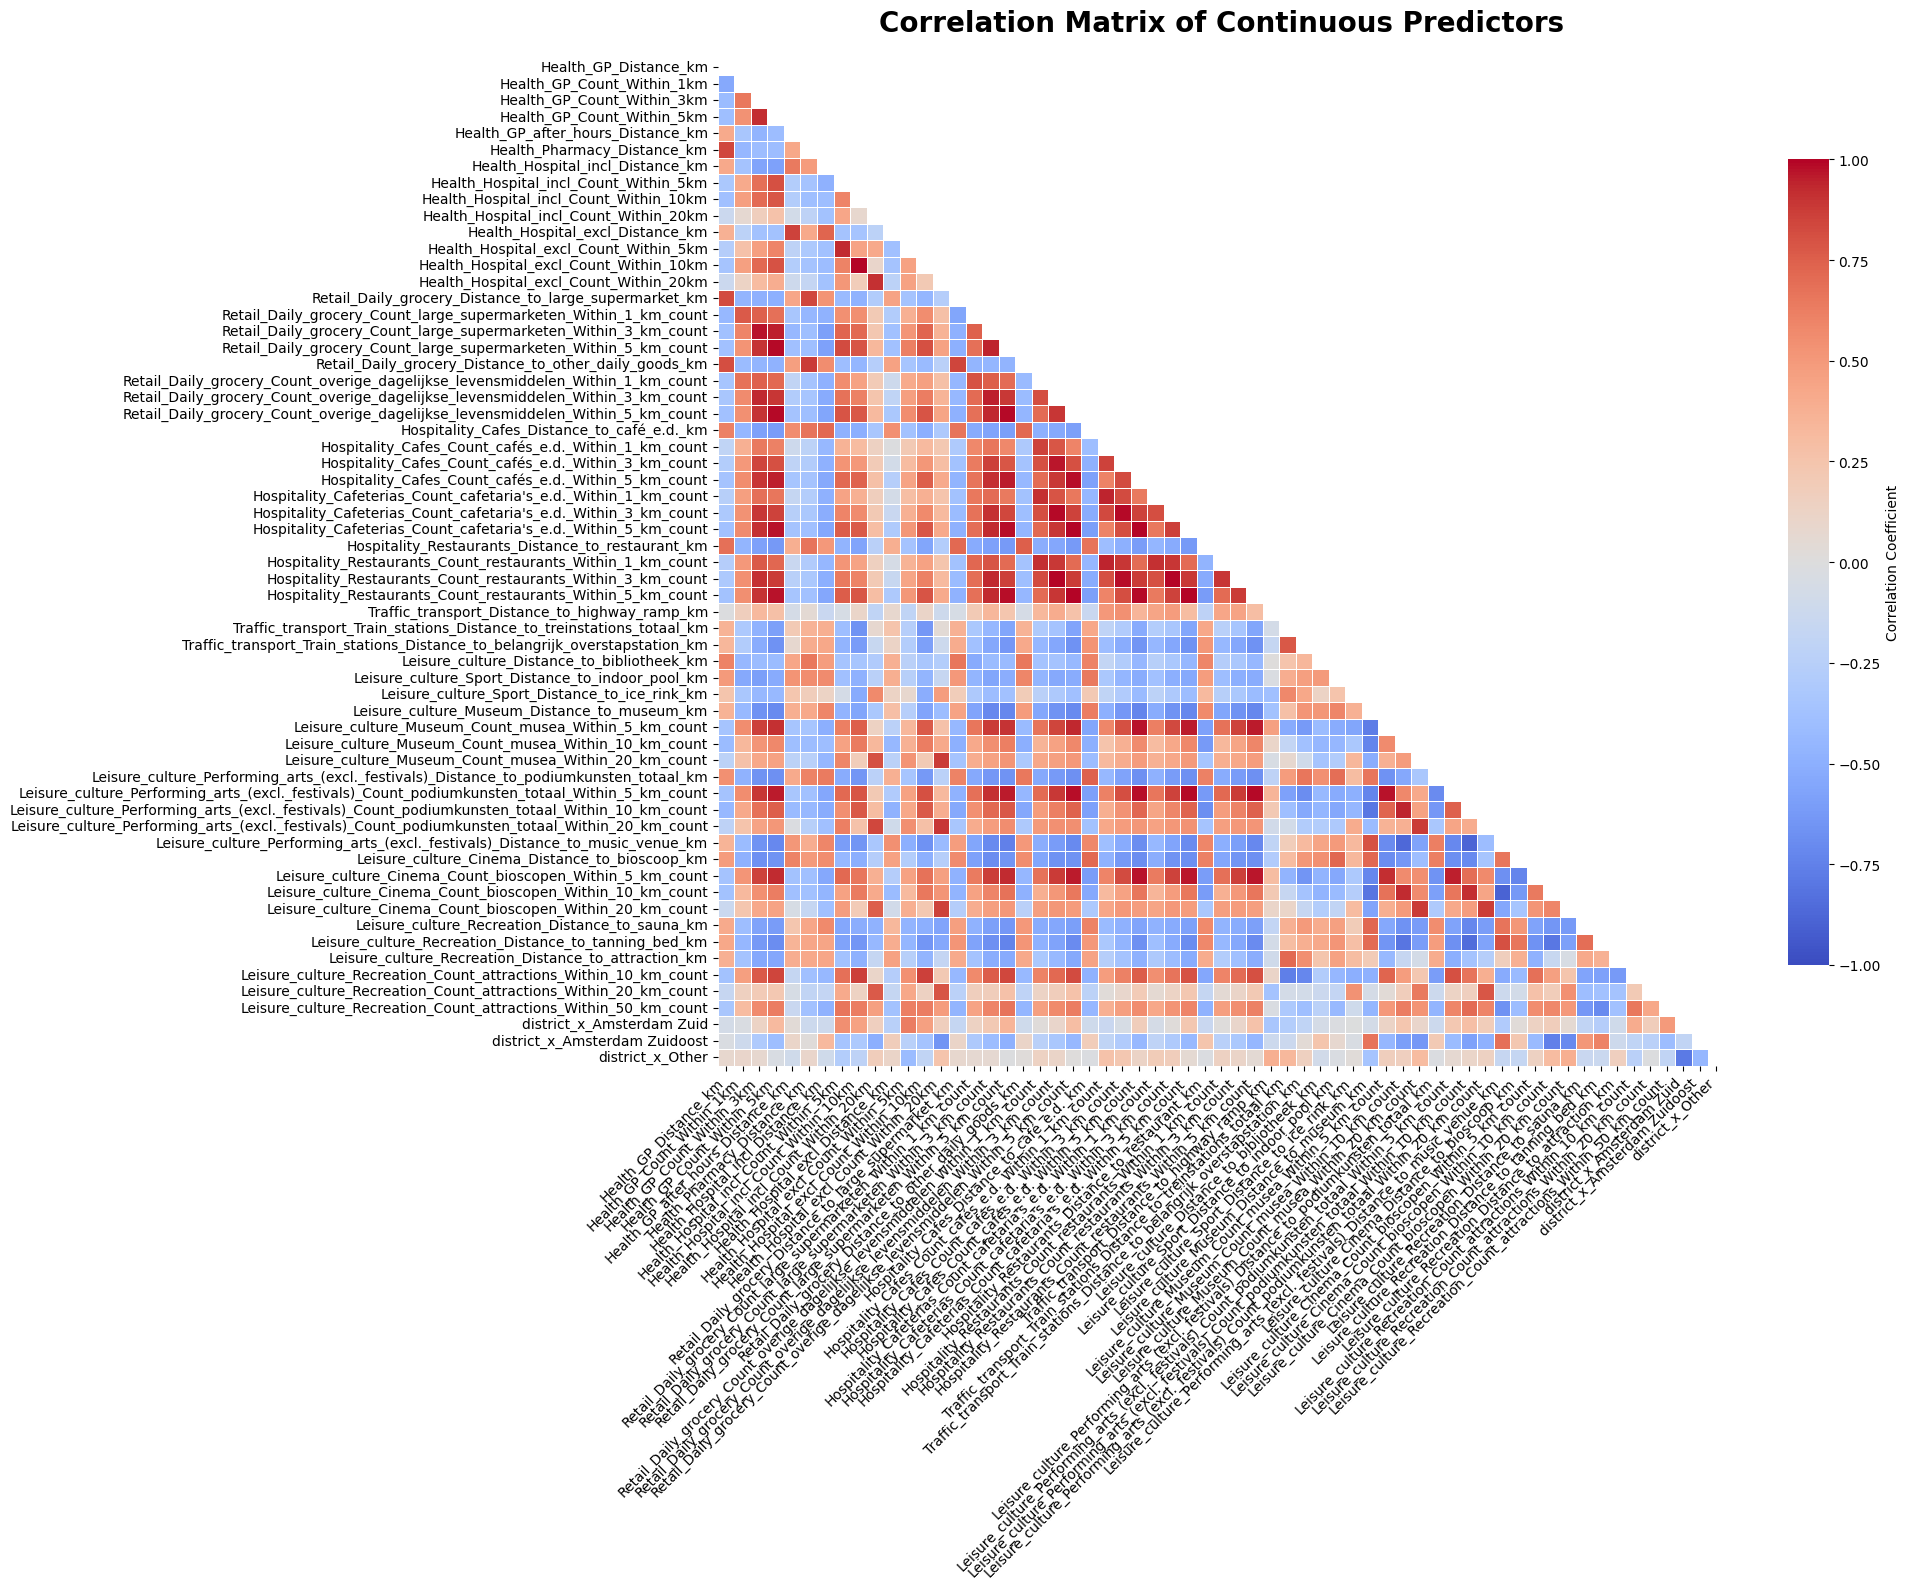

In [41]:
# Calculate the Correlation Matrix
corr = X.corr()

# Create a larger figure
plt.figure(figsize=(20, 16))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap with improved settings
sns.heatmap(corr, mask=mask, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1,
            annot_kws={"size": 8},
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

# Improve title
plt.title('Correlation Matrix of Continuous Predictors', 
          fontsize=20, 
          pad=20, 
          fontweight='bold')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

There are some colinearity

In [42]:
def find_high_correlations(df, regressors, threshold=0.7):
    """
    Find pairs of variables that are highly correlated with each other.
    """
    import pandas as pd
    
    # Calculate correlation matrix for the regressors
    corr_matrix = df[regressors].corr()
    
    # List to store pairs with high correlation
    high_corr_pairs = []
    
    # Go through each correlation in the matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            
            # Check if absolute correlation exceeds threshold then add to list as dictionary to store
            if abs(corr_value) >= threshold:
                high_corr_pairs.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlation': round(corr_value, 4)
                })
    
    # Convert list to DataFrame
    result_df = pd.DataFrame(high_corr_pairs)
    
    return result_df


high_corr = find_high_correlations(df, regressors, threshold=0.7)
print(f"{len(high_corr)} pairs with correlation >= 0.7:\n")
high_corr

280 pairs with correlation >= 0.7:



Variable 1  \
0                                                           Health_GP_Distance_km   
1                                                           Health_GP_Distance_km   
2                                                           Health_GP_Distance_km   
3                                                      Health_GP_Count_Within_1km   
4                                                      Health_GP_Count_Within_3km   
..                                                                            ...   
275  Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km   
276  Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km   
277                                Leisure_culture_Cinema_Distance_to_bioscoop_km   
278                     Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count   
279                         Leisure_culture_Recreation_Distance_to_tanning_bed_km   

                                                           Variable 2  \
0                                         Health_Pharmacy_Distance_km   
1               Retail_Daily_grocery_Distance_to_large_supermarket_km   
2               Retail_Daily_grocery_Distance_to_other_daily_goods_km   
3    Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
4                                          Health_GP_Count_Within_5km   
..                                                                ...   
275         Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count   
276             Leisure_culture_Recreation_Distance_to_tanning_bed_km   
277          Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count   
278             Leisure_culture_Recreation_Distance_to_tanning_bed_km   
279   Leisure_culture_Recreation_Count_attractions_Within_50_km_count   

     Correlation  
0           0.84  
1           0.82  
2           0.81  
3           0.77  
4           0.92  
..           ...  
275        -0.89  
276         0.81  
277        -0.73  
278        -0.80  
279        -0.71  

[280 rows x 3 columns]

In [43]:
def remove_correlated_features(X, corr_df, threshold=0.7, pvalues=None):
    """
    Remove highly correlated features systematically
    
    Parameters:
    - X: DataFrame with your features
    - corr_df: DataFrame with columns ['Variable 1', 'Variable 2', 'Correlation']
    - threshold: correlation threshold (default 0.7)
    - pvalues: Series of p-values from regression (optional)
    """
    # Filter high correlations
    high_corr = corr_df[abs(corr_df['Correlation']) >= threshold].copy()
    
    to_drop = set()
    
    for idx, row in high_corr.iterrows():
        var1 = row['Variable 1']
        var2 = row['Variable 2']
        
        # Skip if either already marked for dropping
        if var1 in to_drop or var2 in to_drop:
            continue
        
        # Decision logic: which one to drop?
        drop_var = decide_which_to_drop(var1, var2, pvalues)
        to_drop.add(drop_var)
    
    keep_vars = [col for col in X.columns if col not in to_drop]
    
    print(f"Dropping {len(to_drop)} variables due to high correlation")
    print(f"Keeping {len(keep_vars)} variables")
    
    return keep_vars, list(to_drop)

def decide_which_to_drop(var1, var2, pvalues=None):
    """
    Decide which variable to drop from a correlated pair
    """
    # Rule 1: If we have p-values, keep the more significant one
    if pvalues is not None:
        if var1 in pvalues.index and var2 in pvalues.index:
            if pvalues[var1] < pvalues[var2]:
                return var2  # Drop var2, keep var1
            else:
                return var1  # Drop var1, keep var2
    
    # Rule 2: Keep Distance over Count
    if 'Distance' in var1 and 'Count' in var2:
        return var2
    elif 'Count' in var1 and 'Distance' in var2:
        return var1
    
    # Rule 3: For multiple radii, keep 3km
    if 'Within_3km' in var1:
        return var2
    elif 'Within_3km' in var2:
        return var1
    
    # Rule 4: Keep 1km over 5km, 5km over 10km, etc.
    if 'Within_1km' in var1:
        return var2
    elif 'Within_1km' in var2:
        return var1
    
    # Default: drop var2 (arbitrary)
    return var2

# Use it
keep_vars, drop_vars = remove_correlated_features(
    X=X_with_const,  
    corr_df=high_corr, 
    threshold=0.7,
    pvalues=model.pvalues
)

# Create new dataset
X_reduced = X_with_const[keep_vars]

Dropping 39 variables due to high correlation
Keeping 23 variables


In [44]:
X_reduced

const  Health_GP_Distance_km  Health_GP_Count_Within_5km  \
0     1.00                   0.60                       66.80   
1     1.00                   0.50                       89.00   
2     1.00                   0.80                       77.80   
3     1.00                   0.90                       75.60   
4     1.00                   0.20                       93.00   
..     ...                    ...                         ...   
582   1.00                   0.80                       22.90   
583   1.00                   0.80                       24.50   
584   1.00                   0.80                       21.80   
585   1.00                   1.00                       22.80   
586   1.00                   0.80                       22.00   

     Health_GP_after_hours_Distance_km  Health_Hospital_incl_Distance_km  \
0                                 3.30                              2.60   
1                                 4.60                              2.00   
2                                 4.50                              2.40   
3                                 4.80                              2.40   
4                                 4.50                              2.00   
..                                 ...                               ...   
582                               3.60                              3.60   
583                               3.20                              3.20   
584                               3.60                              3.60   
585                               3.80                              3.80   
586                               3.70                              3.70   

     Health_Hospital_excl_Count_Within_5km  \
0                                     1.50   
1                                     1.40   
2                                     1.00   
3                                     0.90   
4                                     1.10   
..                                     ...   
582                                   1.00   
583                                   1.00   
584                                   1.00   
585                                   1.00   
586                                   1.00   

     Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count  \
0                                                                3.80   
1                                                                3.90   
2                                                                5.70   
3                                                                3.00   
4                                                                1.80   
..                                                                ...   
582                                                              0.50   
583                                                              0.50   
584                                                              0.50   
585                                                              0.40   
586                                                              0.50   

     Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count  \
0                                                    9.80   
1                                                   22.60   
2                                                   19.90   
3                                                    9.30   
4                                                   14.00   
..                                                    ...   
582                                                  0.00   
583                                                  0.00   
584                                                  0.00   
585                                                  0.00   
586                                                  0.00   

     Hospitality_Restaurants_Distance_to_restaurant_km  \
0                                                 0.40   
1                               

In [45]:
high_corr = find_high_correlations(df, X_reduced.columns, threshold=0.7)
print(f"{len(high_corr)} pairs with correlation >= 0.7:\n")
high_corr

1 pairs with correlation >= 0.7:



Variable 1        Variable 2  Correlation
0  district_x_Amsterdam Zuid  district_x_Other        -0.79

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each regressor
# Note: We use X (without constant) for VIF calculation
vif_data = pd.DataFrame()
vif_data["Variable"] = df[keep_vars + list(district_encoder_one_hot.columns)].columns
X = pd.concat([df[keep_vars], district_encoder_one_hot], axis=1)
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display results
vif_data

/Users/quynhmai/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/quynhmai/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variable  \
25                                                                       district_x_Other   
24                                                          district_x_Amsterdam Zuidoost   
23                                                              district_x_Amsterdam Zuid   
22                                                                       district_x_Other   
21                                                          district_x_Amsterdam Zuidoost   
20                                                              district_x_Amsterdam Zuid   
2                                                              Health_GP_Count_Within_5km   
12                                          Leisure_culture_Sport_Distance_to_ice_rink_km   
19                        Leisure_culture_Recreation_Count_attractions_Within_20_km_count   
13                                  Leisure_culture_Museum_Count_musea_Within_20_km_count   
17                                  Leisure_culture_Recreation_Distance_to_tanning_bed_km   
15                                         Leisure_culture_Cinema_Distance_to_bioscoop_km   
10             Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km   
3                                                       Health_GP_after_hours_Distance_km   
16                                        Leisure_culture_Recreation_Distance_to_sauna_km   
5                                                   Health_Hospital_excl_Count_Within_5km   
18                                   Leisure_culture_Recreation_Distance_to_attraction_km   
4                                                        Health_Hospital_incl_Distance_km   
7                                    Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count   
14  Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km   
8                                       Hospitality_Restaurants_Distance_to_restaurant_km   
6                        Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
1                                                                   Health_GP_Distance_km   
11                                             Leisure_culture_Distance_to_bibliotheek_km   
9                                           Traffic_transport_Distance_to_highway_ramp_km   
0                                                                                   const   

     VIF  
25   inf  
24   inf  
23   inf  
22   inf  
21   inf  
20   inf  
2  19.65  
12  9.55  
19  8.16  
13  7.85  
17  7.48  
15  6.53  
10  6.22  
3   6.06  
16  5.60  
5   5.17  
18  4.99  
4   4.79  
7   4.54  
14  3.56  
8   3.09  
6   3.00  
1   2.94  
11  2.76  
9   2.61  
0   0.00

In [ ]:
#full DF
df_all = pd.DataFrame.join(y, X_with_const)
df_all

18_en_ouder  const  Health_GP_Distance_km  Health_GP_Count_Within_1km  \
0          66.80   1.00                   0.60                        3.00   
1          71.50   1.00                   0.50                        3.50   
2          67.90   1.00                   0.80                        3.80   
3          70.30   1.00                   0.90                        1.50   
4          71.20   1.00                   0.20                        2.00   
..           ...    ...                    ...                         ...   
582        73.00   1.00                   0.80                        0.70   
583        73.00   1.00                   0.80                        0.60   
584        73.00   1.00                   0.80                        1.00   
585        73.00   1.00                   1.00                        0.50   
586        61.60   1.00                   0.80                        0.80   

     Health_GP_Count_Within_3km  Health_GP_Count_Within_5km  \
0                         28.00                       66.80   
1                         30.30                       89.00   
2                         28.00                       77.80   
3                         26.90                       75.60   
4                         28.60                       93.00   
..                          ...                         ...   
582                        4.30                       22.90   
583                        7.20                       24.50   
584                        3.50                       21.80   
585                        3.10                       22.80   
586                        3.30                       22.00   

     Health_GP_after_hours_Distance_km  Health_Pharmacy_Distance_km  \
0                                 3.30                         0.70   
1                                 4.60                         0.90   
2                                 4.50                         0.60   
3                                 4.80                         0.90   
4                                 4.50                         1.40   
..                                 ...                          ...   
582                               3.60                         0.90   
583                               3.20                         0.80   
584                               3.60                         0.80   
585                               3.80                         1.00   
586                               3.70                         0.90   

     Health_Hospital_incl_Distance_km  Health_Hospital_incl_Count_Within_5km  \
0                                2.60                                   2.00   
1                                2.00                                   2.40   
2                                2.40                                   2.00   
3                                2.40                                   1.90   
4                                2.00                                   2.10   
..                                ...                                    ...   
582                              3.60                                   1.00   
583                              3.20                                   1.00   
584                              3.60                                   1.00   
585                              3.80                                   1.00   
586                              3.70                                   1.00   

     ...  Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count  \
0    ...                                                      19.10   
1    ...                                                      20.70   
2    ...                                                      20.00   
3    ...                                                      19.40   
4    ...                                                      21.00   
..   ...                                                        ...   


In [105]:

# df with removed variables for multicolinearity
df_reduced = pd.DataFrame.join(y, X_reduced)
df_reduced

18_en_ouder  const  Health_GP_Distance_km  Health_GP_Count_Within_5km  \
0          66.80   1.00                   0.60                       66.80   
1          71.50   1.00                   0.50                       89.00   
2          67.90   1.00                   0.80                       77.80   
3          70.30   1.00                   0.90                       75.60   
4          71.20   1.00                   0.20                       93.00   
..           ...    ...                    ...                         ...   
582        73.00   1.00                   0.80                       22.90   
583        73.00   1.00                   0.80                       24.50   
584        73.00   1.00                   0.80                       21.80   
585        73.00   1.00                   1.00                       22.80   
586        61.60   1.00                   0.80                       22.00   

     Health_GP_after_hours_Distance_km  Health_Hospital_incl_Distance_km  \
0                                 3.30                              2.60   
1                                 4.60                              2.00   
2                                 4.50                              2.40   
3                                 4.80                              2.40   
4                                 4.50                              2.00   
..                                 ...                               ...   
582                               3.60                              3.60   
583                               3.20                              3.20   
584                               3.60                              3.60   
585                               3.80                              3.80   
586                               3.70                              3.70   

     Health_Hospital_excl_Count_Within_5km  \
0                                     1.50   
1                                     1.40   
2                                     1.00   
3                                     0.90   
4                                     1.10   
..                                     ...   
582                                   1.00   
583                                   1.00   
584                                   1.00   
585                                   1.00   
586                                   1.00   

     Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count  \
0                                                                3.80   
1                                                                3.90   
2                                                                5.70   
3                                                                3.00   
4                                                                1.80   
..                                                                ...   
582                                                              0.50   
583                                                              0.50   
584                                                              0.50   
585                                                              0.40   
586                                                              0.50   

     Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count  \
0                                                    9.80   
1                                                   22.60   
2                                                   19.90   
3                                                    9.30   
4                                                   14.00   
..                                                    ...   
582                                                  0.00   
583                                                  0.00   
584                                                  0.00   
585                                                  0.00   
586                                                  0

In [53]:
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     11.72
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.41e-30
Time:                        22:46:59   Log-Likelihood:                -1360.5
No. Observations:                 432   AIC:                             2765.
Df Residuals:                     410   BIC:                             2854.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Models

In [117]:
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4.986
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.27e-22
Time:                        23:24:29   Log-Likelihood:                -1334.3
No. Observations:                 432   AIC:                             2791.
Df Residuals:                     371   BIC:                             3039.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [116]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     11.72
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.41e-30
Time:                        23:23:29   Log-Likelihood:                -1360.5
No. Observations:                 432   AIC:                             2765.
Df Residuals:                     410   BIC:                             2854.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Model Training

## Bootstraping for variable certainty

### Full model

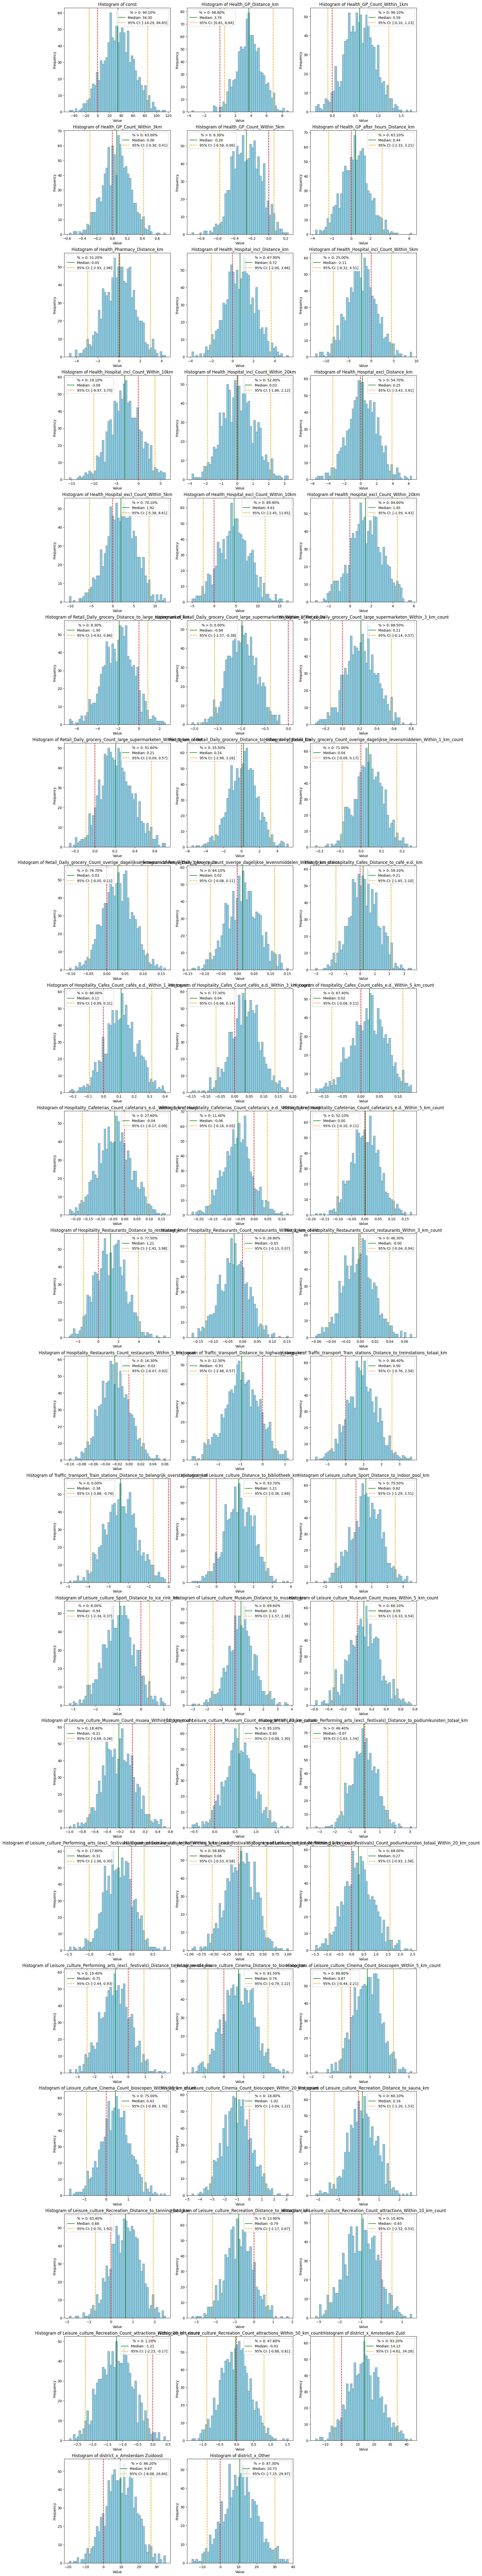

In [54]:
import matplotlib.pyplot as plt
import numpy as np

#. Your solution here ...
np.random.seed(42)
n_simulations = 1000

coef_estimates = model_all.params
coef_cov = model_all.cov_params()
coeff_samples = np.random.multivariate_normal(coef_estimates, coef_cov, size=n_simulations)

# Get parameter names 
parameter_names = getattr(model_all.model, 'exog_names', [f'Param_{i}' for i in range(len(coef_estimates))])

n_params = len(parameter_names)

# Rows + Columns
n_cols = min(3, n_params)
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5), constrained_layout=True)
axes_flat = axes.flatten()

for i, name in enumerate(parameter_names):

    mean_val = np.mean(coeff_samples[:, i])
    median_val = np.median(coeff_samples[:, i])
    ci_lower, ci_upper = np.percentile(coeff_samples[:, i], [2.5, 97.5])
    percent_positive = (np.sum(coeff_samples[:, i] > 0) / n_simulations) * 100

    ax = axes_flat[i]
    ax.hist(coeff_samples[:, i], bins=50, color='skyblue', edgecolor='gray')
    ax.axvline(x=median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.axvline(x=ci_lower, color='orange', linestyle='--', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
    ax.axvline(x=ci_upper, color='orange', linestyle='--')
    ax.axvline(x=0, color='red', linestyle='--')
    ax.set_title(f'Histogram of {name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(title=f'% > 0: {percent_positive:.2f}%')

# Hide unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.show()


### Reduced for multicolinearity

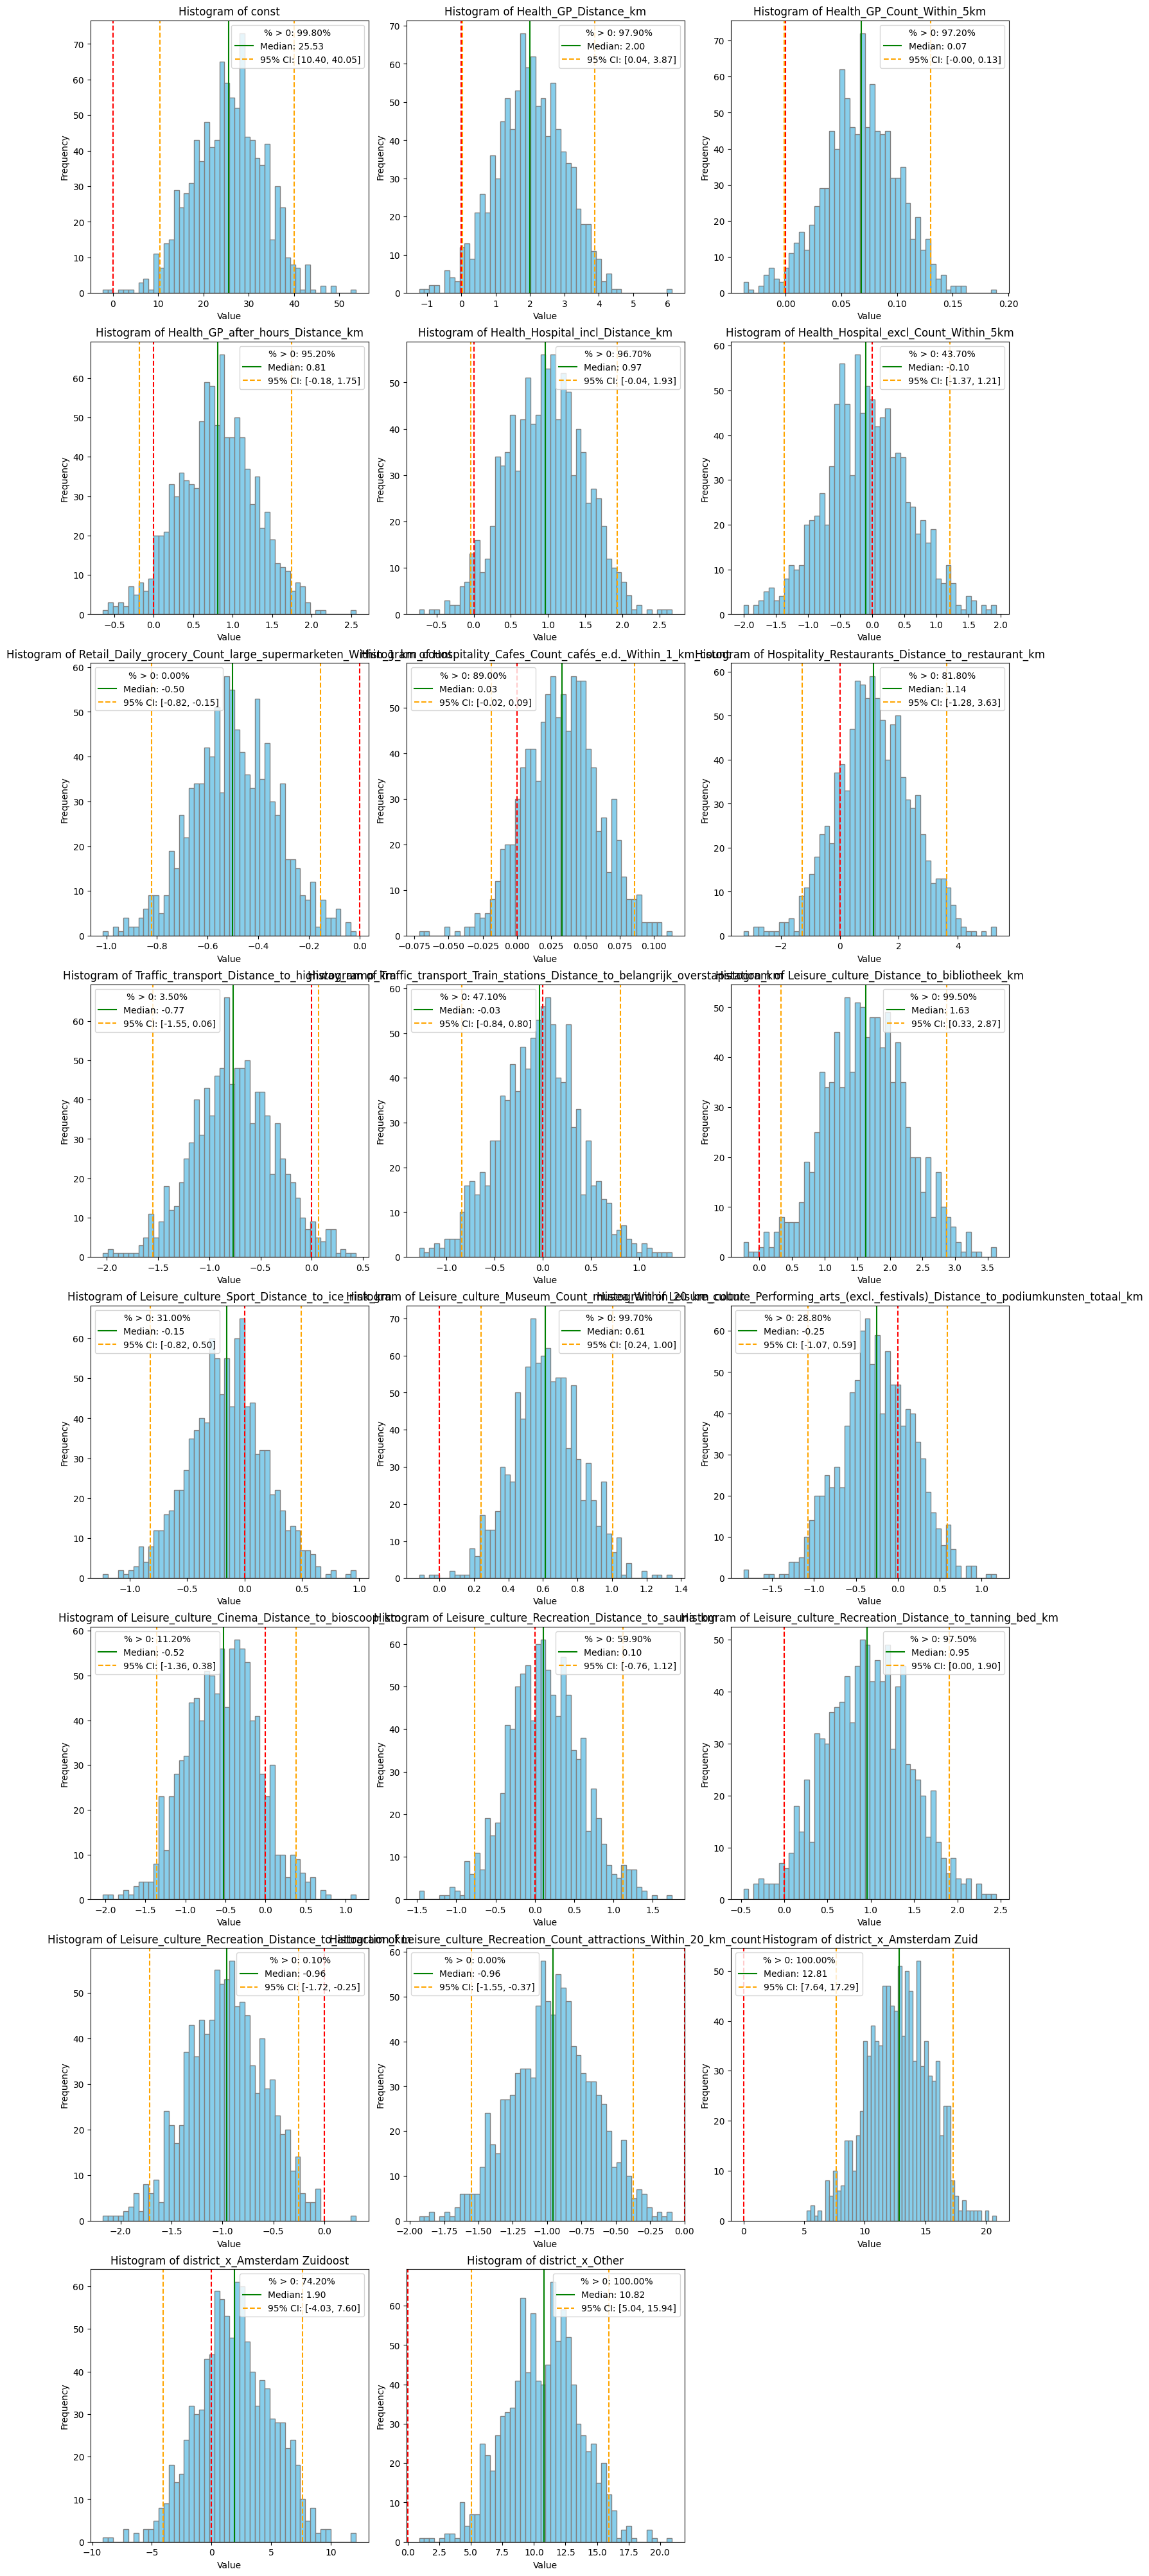

In [55]:
import matplotlib.pyplot as plt
import numpy as np

#. Your solution here ...
np.random.seed(42)
n_simulations = 1000

coef_estimates = model_reduced.params
coef_cov = model_reduced.cov_params()
coeff_samples = np.random.multivariate_normal(coef_estimates, coef_cov, size=n_simulations)

# Get parameter names 
parameter_names = getattr(model_reduced.model, 'exog_names', [f'Param_{i}' for i in range(len(coef_estimates))])

n_params = len(parameter_names)

# Rows + Columns
n_cols = min(3, n_params)
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5), constrained_layout=True)
axes_flat = axes.flatten()

for i, name in enumerate(parameter_names):

    mean_val = np.mean(coeff_samples[:, i])
    median_val = np.median(coeff_samples[:, i])
    ci_lower, ci_upper = np.percentile(coeff_samples[:, i], [2.5, 97.5])
    percent_positive = (np.sum(coeff_samples[:, i] > 0) / n_simulations) * 100

    ax = axes_flat[i]
    ax.hist(coeff_samples[:, i], bins=50, color='skyblue', edgecolor='gray')
    ax.axvline(x=median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.axvline(x=ci_lower, color='orange', linestyle='--', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
    ax.axvline(x=ci_upper, color='orange', linestyle='--')
    ax.axvline(x=0, color='red', linestyle='--')
    ax.set_title(f'Histogram of {name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(title=f'% > 0: {percent_positive:.2f}%')

# Hide unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.show()


- Strong variables: Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count, Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km, Leisure_culture_Recreation_Count_attractions_Within_20_km_count
- May be significant: Health_GP_Count_Within_1km, Leisure_culture_Museum_Count_musea_Within_20_km_count, District variables (Zuid, Zuidoost)

According to this, we can derive the following models to train & compare:
- **Model 1 (4 predictors)**: only strong predictors -> Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count, Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km, Leisure_culture_Recreation_Count_attractions_Within_20_km_count
- **Model 2 (7 predictors)**: strong predictors + districts -> Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count, Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km, Leisure_culture_Recreation_Count_attractions_Within_20_km_count
- **Model 3 (9 predictors):** strong predictors + may be significant predictors -> Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count, Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km, Leisure_culture_Recreation_Count_attractions_Within_20_km_count, Health_GP_Count_Within_1km, Leisure_culture_Museum_Count_musea_Within_20_km_count, District variables (Zuid, Zuidoost)
- **Model 4 (14 predictors):** Category representatives with moderate coverage → 2-3 variables per category (Health, Retail, Traffic, Leisure, Hospitality) + districts
- **Model 5 (16 predictors):** Comprehensive category representatives → Diverse amenities across all categories + districts
- **Model 6 (22 predictors):** No multicolinearity model → All available variables (with multicorelated variables dropped)
- **Model 7 (61 predictors):** Full model

## Split into train, valid, and test dataset

In [61]:
df = df_all
# Obtain the list of all ids (indices) in the dataframe

ids = df.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df.loc[train_ids]
validation_set = df.loc[validation_ids]
test_set = df.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)



## Train model

In [67]:
def fit_predict_evaluate(train_X, train_y, valid_X, valid_y, credibility_pct=95, n_sims=1000):
    
    rng = np.random.default_rng(42)  # For reproducibility
    
    # Fit the model
    model = sm.OLS(train_y, train_X).fit()

    W_hat = model.params
    cov_matrix = model.cov_params()
    residual_std = np.sqrt(model.scale)  # standard deviation of residuals

    # Simulate W from the posterior distribution
    simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=n_sims)

    # Calculate simulated mu for the validation set
    simulated_mus = simulated_W @ valid_X.T  # shape: (n_sims, n_valid)

    # Simulate y based on simulated mu and residual standard error
    simulated_ys = simulated_mus + rng.normal(0, residual_std, size=simulated_mus.shape)

    # Calculate prediction summaries
    simulated_y_median = np.median(simulated_ys, axis=0)

    lower = np.percentile(simulated_ys, (100 - credibility_pct) / 2, axis=0)
    upper = np.percentile(simulated_ys, 100 - (100 - credibility_pct) / 2, axis=0)
    prediction_intervals = np.vstack([lower, upper])  # shape: (2, n_validation)

    # Calculate metrics
    bias = np.mean(simulated_y_median - valid_y)
    rmse = np.sqrt(np.mean((simulated_y_median - valid_y) ** 2))
    correlation = np.corrcoef(simulated_y_median, valid_y)[0, 1]
    coverage = np.mean((valid_y.values >= lower) & (valid_y.values <= upper))

    # Return results as a dictionary
    results = {
        'bias': bias,
        'rmse': rmse,
        'correlation': correlation,
        'coverage': coverage,       
        'predictions': simulated_y_median,
        'prediction_intervals': prediction_intervals,
        'model': model  # Store model for inspection
    }

    return results


# Define different model specifications


model_specs = {
    'Intercept-Only': ['const'],
    
    # Model 1 (4 predictors): only strong predictors
    # Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count, 
    # Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km, 
    # Leisure_culture_Recreation_Count_attractions_Within_20_km_count
    'Model-1-Strong-Only': [
        'const',
        'Health_GP_Distance_km',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count'
    ],
    
    # Model 2 (7 predictors): strong predictors + districts
    # Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count,
    # Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km,
    # Leisure_culture_Recreation_Count_attractions_Within_20_km_count,
    # district_x_Amsterdam Zuid, district_x_Amsterdam Zuidoost, district_x_Other
    'Model-2-Strong-Plus-Districts': [
        'const',
        'Health_GP_Distance_km',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count',
        'district_x_Amsterdam Zuid',
        'district_x_Amsterdam Zuidoost',
        'district_x_Other'
    ],
    
    # Model 3 (9 predictors): strong predictors + maybe significant predictors + districts
    # Health_GP_Distance_km, Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count,
    # Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km,
    # Leisure_culture_Recreation_Count_attractions_Within_20_km_count,
    # Leisure_culture_Museum_Count_musea_Within_20_km_count,
    # district_x_Amsterdam Zuid, district_x_Amsterdam Zuidoost, district_x_Other
    'Model-3-Strong-Plus-Maybe': [
        'const',
        'Health_GP_Distance_km',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count',
        'Leisure_culture_Museum_Count_musea_Within_20_km_count',
        'district_x_Amsterdam Zuid',
        'district_x_Amsterdam Zuidoost',
        'district_x_Other'
    ],
    
    # Model 4 (14 predictors): category representatives with moderate coverage
    # One key variable per category: Health, Retail, Traffic, Leisure, Hospitality, Districts
    'Model-4-Category-Moderate': [
        'const',
        # Health
        'Health_GP_Distance_km',
        'Health_Hospital_incl_Distance_km',
        # Retail
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        # Traffic
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
        'Traffic_transport_Distance_to_highway_ramp_km',
        # Leisure
        'Leisure_culture_Distance_to_bibliotheek_km',
        'Leisure_culture_Museum_Count_musea_Within_20_km_count',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count',
        # Hospitality
        'Hospitality_Restaurants_Distance_to_restaurant_km',
        # Districts
        'district_x_Amsterdam Zuid',
        'district_x_Amsterdam Zuidoost',
        'district_x_Other'
    ],
    
    # Model 5 (16 predictors): comprehensive category representatives
    # Includes diverse amenities across all categories
    'Model-5-Category-Comprehensive': [
        'const',
        # Health - keep distance only
        'Health_GP_Distance_km',
        'Health_Hospital_incl_Distance_km',
        # Retail - keep significant one
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        # Hospitality - one per type
        'Hospitality_Restaurants_Distance_to_restaurant_km',
        # Traffic
        'Traffic_transport_Distance_to_highway_ramp_km',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
        # Leisure/Culture - diverse measures
        'Leisure_culture_Distance_to_bibliotheek_km',
        'Leisure_culture_Museum_Count_musea_Within_20_km_count',
        'Leisure_culture_Cinema_Distance_to_bioscoop_km',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count',
        # Districts
        'district_x_Amsterdam Zuid',
        'district_x_Amsterdam Zuidoost',
        'district_x_Other'
    ],
    
    # No multicolinearity model
    'Model-6-reduced': X_reduced.columns.tolist(),

    # Full Model (60 predictors): all available variables
    'Model-7-Full': train_X_full.columns.tolist()
}

# Train all models
scores_dict = {}
model_results = {}

for model_name, features in model_specs.items():
    print(f"Training {model_name} ({len(features)-1} features)...")
    
    # Check if all features exist in the dataset
    missing_features = [f for f in features if f not in train_X_full.columns]
    if missing_features:
        print(f"  Warning: Missing features {missing_features}, skipping...")
        continue
    
    # Select features for train and validation
    X_train_subset = train_X_full[features]
    X_valid_subset = valid_X_full[features]
    
    # Fit and evaluate
    try:
        results = fit_predict_evaluate(X_train_subset, train_y, X_valid_subset, valid_y, credibility_pct=95)
        scores_dict[model_name] = results
        model_results[model_name] = results['model']
        print(f"  ✓ RMSE: {results['rmse']:.3f}, R²: {results['model'].rsquared:.3f}")
    except Exception as e:
        print(f"  ✗ Error: {e}")

print("\nAll models have been trained!")

# Summarize scalar metrics only
def summarize(d):
    return {k: d[k] for k in ['bias','rmse','correlation','coverage']}

scores = pd.DataFrame({name: summarize(results) for name, results in scores_dict.items()}).T

# Add additional model statistics
scores['R²'] = [model_results[name].rsquared for name in scores.index]
scores['Adj_R²'] = [model_results[name].rsquared_adj for name in scores.index]
scores['AIC'] = [model_results[name].aic for name in scores.index]
scores['BIC'] = [model_results[name].bic for name in scores.index]
scores['N_features'] = [len(model_specs[name])-1 for name in scores.index]  # -1 for const

scores.round(3)


Training Intercept-Only (0 features)...
  ✓ RMSE: 7.096, R²: 0.000
Training Model-1-Strong-Only (4 features)...
  ✓ RMSE: 6.690, R²: 0.134
Training Model-2-Strong-Plus-Districts (7 features)...
  ✓ RMSE: 6.000, R²: 0.256
Training Model-3-Strong-Plus-Maybe (8 features)...
  ✓ RMSE: 5.972, R²: 0.276
Training Model-4-Category-Moderate (12 features)...
  ✓ RMSE: 5.828, R²: 0.319
Training Model-5-Category-Comprehensive (13 features)...
  ✓ RMSE: 5.807, R²: 0.319
Training Model-6-reduced (22 features)...
  ✓ RMSE: 5.732, R²: 0.387
Training Model-7-Full (61 features)...
  ✓ RMSE: 6.616, R²: 0.510

All models have been trained!


bias  rmse  correlation  coverage   R²  \
Intercept-Only                  0.07  7.10        -0.10      0.98 0.00   
Model-1-Strong-Only            -0.13  6.69         0.32      0.95 0.13   
Model-2-Strong-Plus-Districts   0.47  6.00         0.53      0.94 0.26   
Model-3-Strong-Plus-Maybe       0.16  5.97         0.53      0.95 0.28   
Model-4-Category-Moderate       0.19  5.83         0.57      0.94 0.32   
Model-5-Category-Comprehensive  0.19  5.81         0.57      0.96 0.32   
Model-6-reduced                 0.00  5.73         0.58      0.94 0.39   
Model-7-Full                    0.25  6.62         0.49      0.95 0.51   

                                Adj_R²     AIC     BIC  N_features  
Intercept-Only                    0.00 1469.56 1472.93           0  
Model-1-Strong-Only               0.12 1446.56 1463.43           4  
Model-2-Strong-Plus-Districts     0.23 1417.70 1441.33           7  
Model-3-Strong-Plus-Maybe         0.25 1413.82 1440.82           8  
Model-4-Category-Moderate         0.28 1408.73 1449.23          12  
Model-5-Category-Comprehensive    0.28 1410.65 1454.53          13  
Model-6-reduced                   0.32 1405.80 1480.06          22  
Model-7-Full                      0.32 1435.26 1641.16          61

In [68]:
scores.round(3).sort_values("rmse")

bias  rmse  correlation  coverage   R²  \
Model-6-reduced                 0.00  5.73         0.58      0.94 0.39   
Model-5-Category-Comprehensive  0.19  5.81         0.57      0.96 0.32   
Model-4-Category-Moderate       0.19  5.83         0.57      0.94 0.32   
Model-3-Strong-Plus-Maybe       0.16  5.97         0.53      0.95 0.28   
Model-2-Strong-Plus-Districts   0.47  6.00         0.53      0.94 0.26   
Model-7-Full                    0.25  6.62         0.49      0.95 0.51   
Model-1-Strong-Only            -0.13  6.69         0.32      0.95 0.13   
Intercept-Only                  0.07  7.10        -0.10      0.98 0.00   

                                Adj_R²     AIC     BIC  N_features  
Model-6-reduced                   0.32 1405.80 1480.06          22  
Model-5-Category-Comprehensive    0.28 1410.65 1454.53          13  
Model-4-Category-Moderate         0.28 1408.73 1449.23          12  
Model-3-Strong-Plus-Maybe         0.25 1413.82 1440.82           8  
Model-2-Strong-Plus-Districts     0.23 1417.70 1441.33           7  
Model-7-Full                      0.32 1435.26 1641.16          61  
Model-1-Strong-Only               0.12 1446.56 1463.43           4  
Intercept-Only                    0.00 1469.56 1472.93           0

In [69]:
# Determining the best of each metric
print("BEST OF EACH METRIC")
print(f"Lowest RMSE: {scores['rmse'].idxmin()} ({scores['rmse'].min():.3f})")
print(f"Highest Correlation: {scores['correlation'].idxmax()} ({scores['correlation'].max():.3f})")
print(f"Closest to Unbiased: {scores['bias'].abs().idxmin()} ({scores.loc[scores['bias'].abs().idxmin(), 'bias']:.3f})")
print(f"Coverage nearest 95%: {(scores['coverage']-0.95).abs().idxmin()} ({scores.loc[(scores['coverage']-0.95).abs().idxmin(), 'coverage']:.1%})")

BEST OF EACH METRIC
Lowest RMSE: Model-6-reduced (5.732)
Highest Correlation: Model-6-reduced (0.584)
Closest to Unbiased: Model-6-reduced (0.002)
Coverage nearest 95%: Model-1-Strong-Only (95.4%)


The reduced model is the best in all metrics, so it will be chosen for training and testing.

In [74]:
# Checking for overfitting on the reduced model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Using the reduced model columns from earlier
X = df[X_reduced.columns]
y = df['18_en_ouder']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit OLS on training data
model_train = sm.OLS(y_train, X_train_const).fit()

# Predictions
y_train_pred = model_train.predict(X_train_const)
y_test_pred = model_train.predict(X_test_const)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = model_train.rsquared
test_r2 = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print(f"Train RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")




Train RMSE: 5.658, Test RMSE: 5.901
Train R²: 0.365, Test R²: 0.339


While the training error is smaller than the test error, showing signs of overfitting, the difference is too small to say it is definitely overfitting. In other words, the model seems to generalise well and seems to be okay (hopefully)

In [75]:
model = sm.OLS(y, X).fit()

## Method Validation
Validate that Monte Carlo simulation produces well-calibrated  prediction intervals before applying to train/validation/test splits.


Correlation: 0.611
RMSE: 5.650
Bias: -0.025
Coverage: 94.91%


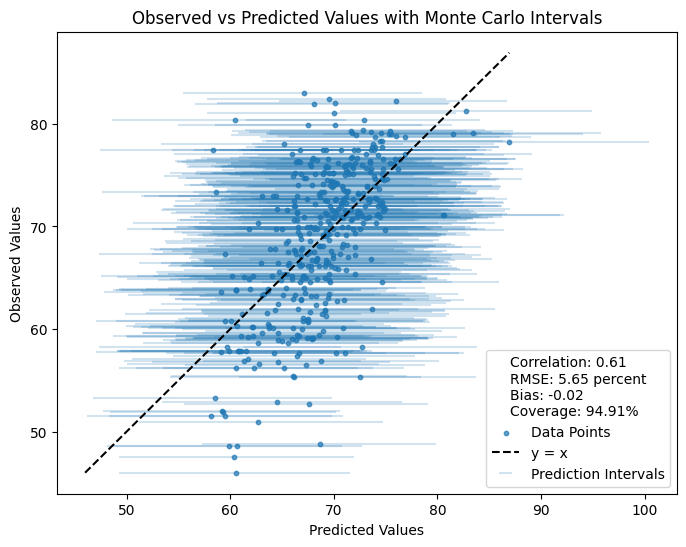

In [77]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X_with_const = sm.add_constant(X)  # adds 'const' column
X_with_const = X_with_const[model.params.index]  # reorder to match model coefficients

# Point estimates (fitted values)
fitted_values = model.predict(X_with_const)

# 3Standard deviation of fitted value estimates (for Monte Carlo)
pred_var = np.diagonal(X_with_const @ model.cov_params() @ X_with_const.T)
pred_std = np.sqrt(pred_var + model.mse_resid)  # Include residual variance for prediction intervals

# Monte Carlo simulation
np.random.seed(42)
n_simulations = 1000
n_obs = len(X_with_const)
fitted_value_samples = np.zeros((n_obs, n_simulations))

# Draw coefficient samples from multivariate normal
coef_samples = np.random.multivariate_normal(mean=model.params, cov=model.cov_params(), size=n_simulations)

for i in range(n_simulations):
    # Mean prediction from sampled coefficients
    mean_pred = X_with_const.values @ coef_samples[i]
    
    # Add residual variance (the key missing piece!)
    residual_noise = np.random.normal(0, np.sqrt(model.mse_resid), size=n_obs)
    fitted_value_samples[:, i] = mean_pred + residual_noise

# Compute Monte Carlo median and 95% prediction intervals
monte_carlo_medians = np.median(fitted_value_samples, axis=1)
prediction_intervals = np.percentile(fitted_value_samples, [2.5, 97.5], axis=1)

# Metrics
correlation = np.corrcoef(monte_carlo_medians, y)[0, 1]
rmse = np.sqrt(mean_squared_error(y, monte_carlo_medians))
bias = np.mean(monte_carlo_medians - y)
coverage = np.mean((y >= prediction_intervals[0, :]) & (y <= prediction_intervals[1, :]))

print(f"Correlation: {correlation:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Coverage: {coverage:.2%}")

# Plot Observed vs Predicted
min_val = min(y.min(), monte_carlo_medians.min())
max_val = max(y.max(), monte_carlo_medians.max())

plt.figure(figsize=(8, 6))
plt.scatter(monte_carlo_medians, y, s=10, alpha=0.7, label='Data Points')
plt.errorbar(
    monte_carlo_medians,
    y,
    xerr=[monte_carlo_medians - prediction_intervals[0, :], prediction_intervals[1, :] - monte_carlo_medians],
    fmt='none',
    alpha=0.2,
    label='Prediction Intervals'
)
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='y = x')

# Legend with metrics
legend_text = (
    f'Correlation: {correlation:.2f}\n'
    f'RMSE: {rmse:.2f} percent\n'
    f'Bias: {bias:.2f}\n'
    f'Coverage: {coverage:.2%}'
)
plt.legend(title=legend_text, loc='lower right')

plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Observed vs Predicted Values with Monte Carlo Intervals')
plt.show()


For each simulation, each point is clustered around the diagonal, showing that for each instant, the predicted value comes quite close to the observed values (perfect prediction line (y=x), so the closer to this line the closer the predicted value comes to the observed values). This means that the model predicts reasonably well. There’s some scatter, especially at the lower and upper ends, indicating the model underestimates high values slightly and overestimates low values slightly.

- The correlation of 0.91 indicates a strong relationship between predictions and observations, meaning that model captures the general trend well.
- The RMSE indicates that predictions are typically within ±5–6 percent of the true reported health percentage
- Bias of -0.02 means that the model does not consistently overpredict or underpredict.
- Coverage of 94.91% means that 93% of the prediction intervals actually include the true value, which is close to the intended 95%

This validates our uncertainty quantification methodology and gives us confidence in applying the same approach to the train/validation/test evaluation that follows.

# Final test set performance

In [82]:
df_final = pd.concat([df["18_en_ouder"], df[X_reduced.columns]], axis=1).copy()

In [85]:
# Obtain the list of all ids (indices) in the dataframe
ids = df_final.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df_final.loc[train_ids]
validation_set = df_final.loc[validation_ids]
test_set = df_final.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)



In [96]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

NUM_SIMULATIONS = 1000
rng = np.random.default_rng(42)

# Fit model on TRAINING SET
model = sm.OLS(train_y, train_X).fit()

W_hat = model.params
cov_matrix = model.cov_params()
residual_std = np.sqrt(model.mse_resid)


# Posterior sampling of coefficients
simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=NUM_SIMULATIONS)


# Posterior predictive y on TEST SET
simulated_mus = simulated_W @ test_X.T
simulated_ys = simulated_mus + rng.normal(0, residual_std, simulated_mus.shape)

# Convert to numpy
simulated_ys = np.asarray(simulated_ys)
y_true = np.asarray(test_y)

# Compute posterior predictive median + intervals
median_preds = np.median(simulated_ys, axis=0)
lower_bounds = np.percentile(simulated_ys, 2.5, axis=0)
upper_bounds = np.percentile(simulated_ys, 97.5, axis=0)

# Metrics using MEDIAN predictions
correlation = np.corrcoef(median_preds, y_true)[0, 1]
rmse = np.sqrt(mean_squared_error(y_true, median_preds))
bias = np.mean(median_preds - y_true)
coverage = np.mean((y_true >= lower_bounds) & (y_true <= upper_bounds))

#PRINT METRICS
available_cols = [col for col in X_reduced.columns if col in train_X_full.columns]
print(f"Using {len(available_cols)} predictors: {available_cols}")


print(f"\nFinal model trained on {len(train_y)} observations")
print(f"Number of parameters: {len(W_hat)}")
print(f"Training R²: {model.rsquared:.4f}")


print(f"Correlation: {correlation:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Coverage: {coverage:.2%}")



Using 23 predictors: ['const', 'Health_GP_Distance_km', 'Health_GP_Count_Within_5km', 'Health_GP_after_hours_Distance_km', 'Health_Hospital_incl_Distance_km', 'Health_Hospital_excl_Count_Within_5km', 'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count', 'Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count', 'Hospitality_Restaurants_Distance_to_restaurant_km', 'Traffic_transport_Distance_to_highway_ramp_km', 'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km', 'Leisure_culture_Distance_to_bibliotheek_km', 'Leisure_culture_Sport_Distance_to_ice_rink_km', 'Leisure_culture_Museum_Count_musea_Within_20_km_count', 'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km', 'Leisure_culture_Cinema_Distance_to_bioscoop_km', 'Leisure_culture_Recreation_Distance_to_sauna_km', 'Leisure_culture_Recreation_Distance_to_tanning_bed_km', 'Leisure_culture_Recreation_Distance_to_attraction_km', 'Leisure_culture_Recreation_Count_attract

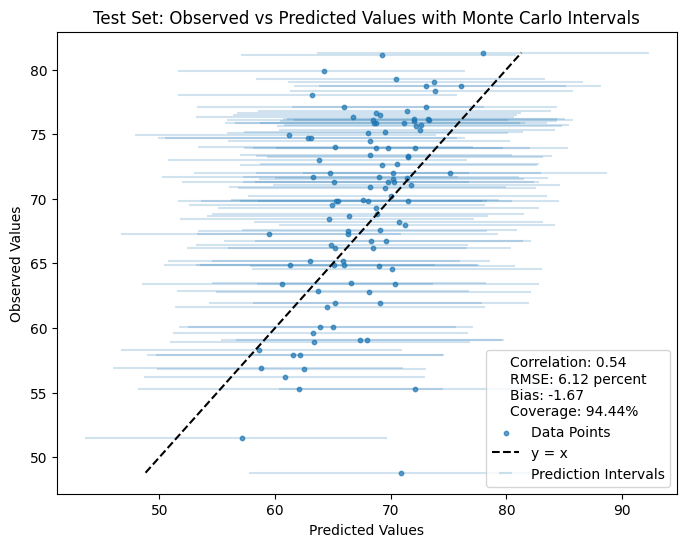

In [99]:
# Plot Observed vs Predicted 
min_val = min(y_true.min(), median_preds.min())
max_val = max(y_true.max(), median_preds.max())

plt.figure(figsize=(8, 6))

# Scatter of median predictions vs observed
plt.scatter(median_preds, y_true, s=10, alpha=0.7, label='Data Points')

# Horizontal error bars (x-direction)
plt.errorbar(
    median_preds,
    y_true,
    xerr=[median_preds - lower_bounds, upper_bounds - median_preds],
    fmt='none',
    alpha=0.2,
    label='Prediction Intervals'
)

# Diagonal line y=x
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='y = x')

# Legend with metrics block
legend_text = (
    f'Correlation: {correlation:.2f}\n'
    f'RMSE: {rmse:.2f} percent\n'
    f'Bias: {bias:.2f}\n'
    f'Coverage: {coverage:.2%}'
)

plt.legend(title=legend_text, loc='lower right')

plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Test Set: Observed vs Predicted Values with Monte Carlo Intervals')
plt.show()


The final model achieves an RMSE of 6.12 percent on the test set, which represents the expected prediction error when applying the model to new, unseen "areas". The observed versus predicted plot shows a decent linear agreement between predicted and actual life expectancy values, with a test-set correlation of 0.54, indicating that the model is not weak in capturing the underlying relationship between the predictors and reported health. The model exhibits only a small negative bias of −1.67 percent, suggesting that predictions are essentially unbiased on average but do usually under estimate the dependent variable systematically. Additionally, the prediction interval coverage of 94.44% demonstrates that the Monte Carlo uncertainty estimates are well calibrated, with the majority of true observations falling within the 95% prediction intervals. The consistency between training and test performance, along with the strong alignment in the prediction plot and well-calibrated uncertainty, indicates minimal overfitting and confirms that the model generalises well to unseen data. **The model is moderately good, but not strong.**

In [101]:
# Extract significant predictors
significant_vars = model_reduced.pvalues[model_reduced.pvalues < 0.05].sort_values()
print("Statistically Significant Predictors (p < 0.05):")
print(significant_vars)

# Get coefficients with confidence intervals
conf_intervals = model_reduced.conf_int()
conf_intervals['coef'] = model_reduced.params
conf_intervals['p_value'] = model_reduced.pvalues
conf_intervals = conf_intervals[conf_intervals['p_value'] < 0.05].sort_values('p_value')
print("\nCoefficients with 95% Confidence Intervals:")
conf_intervals

Statistically Significant Predictors (p < 0.05):
district_x_Amsterdam Zuid                                          0.00
district_x_Other                                                   0.00
const                                                              0.00
Leisure_culture_Museum_Count_musea_Within_20_km_count              0.00
Leisure_culture_Recreation_Count_attractions_Within_20_km_count    0.00
Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   0.00
Leisure_culture_Distance_to_bibliotheek_km                         0.01
Leisure_culture_Recreation_Distance_to_attraction_km               0.01
Health_GP_Distance_km                                              0.04
Health_GP_Count_Within_5km                                         0.04
Leisure_culture_Recreation_Distance_to_tanning_bed_km              0.04
dtype: float64

Coefficients with 95% Confidence Intervals:


0     1  \
district_x_Amsterdam Zuid                                         7.81 17.88   
district_x_Other                                                  5.06 16.46   
const                                                            10.44 40.68   
Leisure_culture_Museum_Count_musea_Within_20_km_count             0.24  1.00   
Leisure_culture_Recreation_Count_attractions_Within_20_km_count  -1.56 -0.37   
Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count -0.82 -0.17   
Leisure_culture_Distance_to_bibliotheek_km                        0.40  2.87   
Leisure_culture_Recreation_Distance_to_attraction_km             -1.71 -0.22   
Health_GP_Distance_km                                             0.08  3.97   
Health_GP_Count_Within_5km                                        0.00  0.13   
Leisure_culture_Recreation_Distance_to_tanning_bed_km             0.02  1.89   

                                                                  coef  \
district_x_Amsterdam Zuid                                        12.85   
district_x_Other                                                 10.76   
const                                                            25.56   
Leisure_culture_Museum_Count_musea_Within_20_km_count             0.62   
Leisure_culture_Recreation_Count_attractions_Within_20_km_count  -0.96   
Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count -0.50   
Leisure_culture_Distance_to_bibliotheek_km                        1.63   
Leisure_culture_Recreation_Distance_to_attraction_km             -0.97   
Health_GP_Distance_km                                             2.03   
Health_GP_Count_Within_5km                                        0.07   
Leisure_culture_Recreation_Distance_to_tanning_bed_km             0.96   

                                                                  p_value  
district_x_Amsterdam Zuid                                            0.00  
district_x_Other                                                     0.00  
const                                                                0.00  
Leisure_culture_Museum_Count_musea_Within_20_km_count                0.00  
Leisure_culture_Recreation_Count_attractions_Within_20_km_count      0.00  
Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count     0.00  
Leisure_culture_Distance_to_bibliotheek_km                           0.01  
Leisure_culture_Recreation_Distance_to_attraction_km                 0.01  
Health_GP_Distance_km                                                0.04  
Health_GP_Count_Within_5km                                           0.04  
Leisure_culture_Recreation_Distance_to_tanning_bed_km                0.04

In [103]:
# Quantify bootstrap results
np.random.seed(42)
n_simulations = 1000

coef_estimates = model_reduced.params
coef_cov = model_reduced.cov_params()
coeff_samples = np.random.multivariate_normal(coef_estimates, coef_cov, size=n_simulations)

bootstrap_summary = []
for i, param_name in enumerate(model_reduced.params.index):
    samples = coeff_samples[:, i]
    ci_lower, ci_upper = np.percentile(samples, [2.5, 97.5])
    percent_positive = (np.sum(samples > 0) / n_simulations) * 100
    
    bootstrap_summary.append({
        'Variable': param_name,
        'Coefficient': coef_estimates[i],
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Percent_Positive': percent_positive,
        'Crosses_Zero': (ci_lower < 0 < ci_upper)
    })

bootstrap_df = pd.DataFrame(bootstrap_summary)
bootstrap_df = bootstrap_df[bootstrap_df['Variable'] != 'const']

# Strong predictors: CI doesn't cross zero
strong_predictors = bootstrap_df[~bootstrap_df['Crosses_Zero']].sort_values('Percent_Positive')
print("\nStrong Predictors (95% CI doesn't include zero):")
strong_predictors[['Variable', 'Coefficient', 'Percent_Positive']]


Strong Predictors (95% CI doesn't include zero):


/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_18855/3886016323.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': coef_estimates[i],


Variable  \
6   Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
19   Leisure_culture_Recreation_Count_attractions_Within_20_km_count   
18              Leisure_culture_Recreation_Distance_to_attraction_km   
17             Leisure_culture_Recreation_Distance_to_tanning_bed_km   
1                                              Health_GP_Distance_km   
11                        Leisure_culture_Distance_to_bibliotheek_km   
13             Leisure_culture_Museum_Count_musea_Within_20_km_count   
20                                         district_x_Amsterdam Zuid   
22                                                  district_x_Other   

    Coefficient  Percent_Positive  
6         -0.50              0.00  
19        -0.96              0.00  
18        -0.97              0.10  
17         0.96             97.50  
1          2.03             97.90  
11         1.63             99.50  
13         0.62             99.70  
20        12.85            100.00  
22        10.76            100.00

In [108]:
# Standardize predictors to compare effect sizes
from sklearn.preprocessing import StandardScaler

# Get numeric predictors (exclude const and categorical)
numeric_predictors = [col for col in model_reduced.params.index 
                     if col not in ['const', 'district_x_Amsterdam Zuid', 
                                   'district_x_Amsterdam Zuidoost', 'district_x_Other']]

# Standardize X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_standardized = pd.DataFrame(
    scaler_X.fit_transform(df_reduced[numeric_predictors]),
    columns=numeric_predictors,
    index=df_reduced.index
)

# Add back categorical variables and constant
X_standardized = pd.concat([
    pd.DataFrame({'const': 1}, index=df_reduced.index),
    X_standardized,
    df_reduced[['district_x_Amsterdam Zuid', 'district_x_Amsterdam Zuidoost', 'district_x_Other']]
], axis=1)

y_standardized = scaler_y.fit_transform(df_reduced[['18_en_ouder']])

# Fit standardized model
model_standardized = sm.OLS(y_standardized, X_standardized[model_reduced.params.index]).fit()

# Compare standardized coefficients
std_coefs = pd.DataFrame({
    'Variable': model_standardized.params.index,
    'Standardized_Coef': model_standardized.params.values,
    'Original_Coef': model_reduced.params.values,
    'P_Value': model_reduced.pvalues.values
})

std_coefs = std_coefs[std_coefs['Variable'] != 'const'].sort_values('Standardized_Coef', key=abs, ascending=False)
print("\nStandardized Coefficients (Effect Sizes):")
std_coefs[std_coefs['P_Value'] < 0.05]


Standardized Coefficients (Effect Sizes):


Variable  \
20                                         district_x_Amsterdam Zuid   
2                                         Health_GP_Count_Within_5km   
19   Leisure_culture_Recreation_Count_attractions_Within_20_km_count   
13             Leisure_culture_Museum_Count_musea_Within_20_km_count   
22                                                  district_x_Other   
18              Leisure_culture_Recreation_Distance_to_attraction_km   
17             Leisure_culture_Recreation_Distance_to_tanning_bed_km   
6   Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
11                        Leisure_culture_Distance_to_bibliotheek_km   
1                                              Health_GP_Distance_km   

    Standardized_Coef  Original_Coef  P_Value  
20               0.54          12.85     0.00  
2                0.35           0.07     0.04  
19              -0.35          -0.96     0.00  
13               0.35           0.62     0.00  
22               0.25          10.76     0.00  
18              -0.22          -0.97     0.01  
17               0.21           0.96     0.04  
6               -0.20          -0.50     0.00  
11               0.17           1.63     0.01  
1                0.14           2.03     0.04

In [109]:
# Calculate partial R² for each predictor
def calculate_partial_r2(full_model, X_full, y, var_to_drop):
    """Calculate partial R² by comparing models with/without a variable"""
    X_reduced = X_full.drop(columns=[var_to_drop])
    reduced_model = sm.OLS(y, X_reduced).fit()
    
    partial_r2 = (reduced_model.ssr - full_model.ssr) / reduced_model.ssr
    return partial_r2

# Calculate for each predictor
partial_r2_results = []
predictors_to_test = [col for col in X_reduced.columns if col != 'const']

for predictor in predictors_to_test:
    partial_r2 = calculate_partial_r2(model_reduced, X_reduced, y, predictor)
    partial_r2_results.append({
        'Variable': predictor,
        'Partial_R2': partial_r2,
        'P_Value': model_reduced.pvalues[predictor]
    })

partial_r2_df = pd.DataFrame(partial_r2_results).sort_values('Partial_R2', ascending=False)
print("\nPartial R² Contribution:")
partial_r2_df[partial_r2_df['P_Value'] < 0.05].head(10)


Partial R² Contribution:


Variable  \
12             Leisure_culture_Museum_Count_musea_Within_20_km_count   
18   Leisure_culture_Recreation_Count_attractions_Within_20_km_count   
5   Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count   
10                        Leisure_culture_Distance_to_bibliotheek_km   
17              Leisure_culture_Recreation_Distance_to_attraction_km   
0                                              Health_GP_Distance_km   
1                                         Health_GP_Count_Within_5km   
16             Leisure_culture_Recreation_Distance_to_tanning_bed_km   
19                                         district_x_Amsterdam Zuid   
21                                                  district_x_Other   

    Partial_R2  P_Value  
12        0.02     0.00  
18        0.02     0.00  
5         0.02     0.00  
10        0.02     0.01  
17        0.02     0.01  
0         0.01     0.04  
1         0.01     0.04  
16        0.01     0.04  
19        0.00     0.00  
21       -0.00     0.00

In [110]:
# Comprehensive predictor summary
summary_data = []

for var in model_reduced.params.index:
    if var == 'const':
        continue
        
    summary_data.append({
        'Variable': var,
        'Coefficient': model_reduced.params[var],
        'Std_Error': model_reduced.bse[var],
        'P_Value': model_reduced.pvalues[var],
        'CI_Lower': model_reduced.conf_int().loc[var, 0],
        'CI_Upper': model_reduced.conf_int().loc[var, 1],
        'T_Statistic': model_reduced.tvalues[var],
        'Significant': model_reduced.pvalues[var] < 0.05
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('P_Value')

# Categorize predictors
summary_df['Strength'] = summary_df.apply(
    lambda row: 'Strong' if row['P_Value'] < 0.01 else 
                'Moderate' if row['P_Value'] < 0.05 else 
                'Weak', axis=1
)

summary_df['Direction'] = summary_df['Coefficient'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative'
)

print("\n" + "="*80)
print("COMPREHENSIVE PREDICTOR ANALYSIS")
print("="*80)
print(f"\nTotal predictors: {len(summary_df)}")
print(f"Significant (p < 0.05): {summary_df['Significant'].sum()}")
print("\nStrongest Predictors (p < 0.01):")
print(summary_df[summary_df['Strength'] == 'Strong'][
    ['Variable', 'Coefficient', 'P_Value', 'Direction']
].to_string(index=False))


COMPREHENSIVE PREDICTOR ANALYSIS

Total predictors: 22
Significant (p < 0.05): 10

Strongest Predictors (p < 0.01):
                                                        Variable  Coefficient  P_Value Direction
                                       district_x_Amsterdam Zuid        12.85     0.00  Positive
                                                district_x_Other        10.76     0.00  Positive
           Leisure_culture_Museum_Count_musea_Within_20_km_count         0.62     0.00  Positive
 Leisure_culture_Recreation_Count_attractions_Within_20_km_count        -0.96     0.00  Negative
Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count        -0.50     0.00  Negative
                      Leisure_culture_Distance_to_bibliotheek_km         1.63     0.01  Positive


MULTIPLE LINEAR REGRESSION: AMENITIES vs REPORTED HEALTH (18 en ouder)
✅ Using existing dataframes

Merged dataset shape: (385, 67)
Number of areas with both amenities and health data: 385

Amenity columns by category:
  Health: 14 columns
  Retail: 8 columns
  Hospitality: 12 columns
  Traffic_Transport: 3 columns
  Leisure_Culture: 22 columns

Removed 0 columns with zero variance
Final number of amenity predictors: 59

Final dataset for regression: 380 observations, 59 predictors

REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     4.510
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           9.16e-19
Time:                        23:30:15   Log-Likelihood:                -1178.2
No. Observations:  

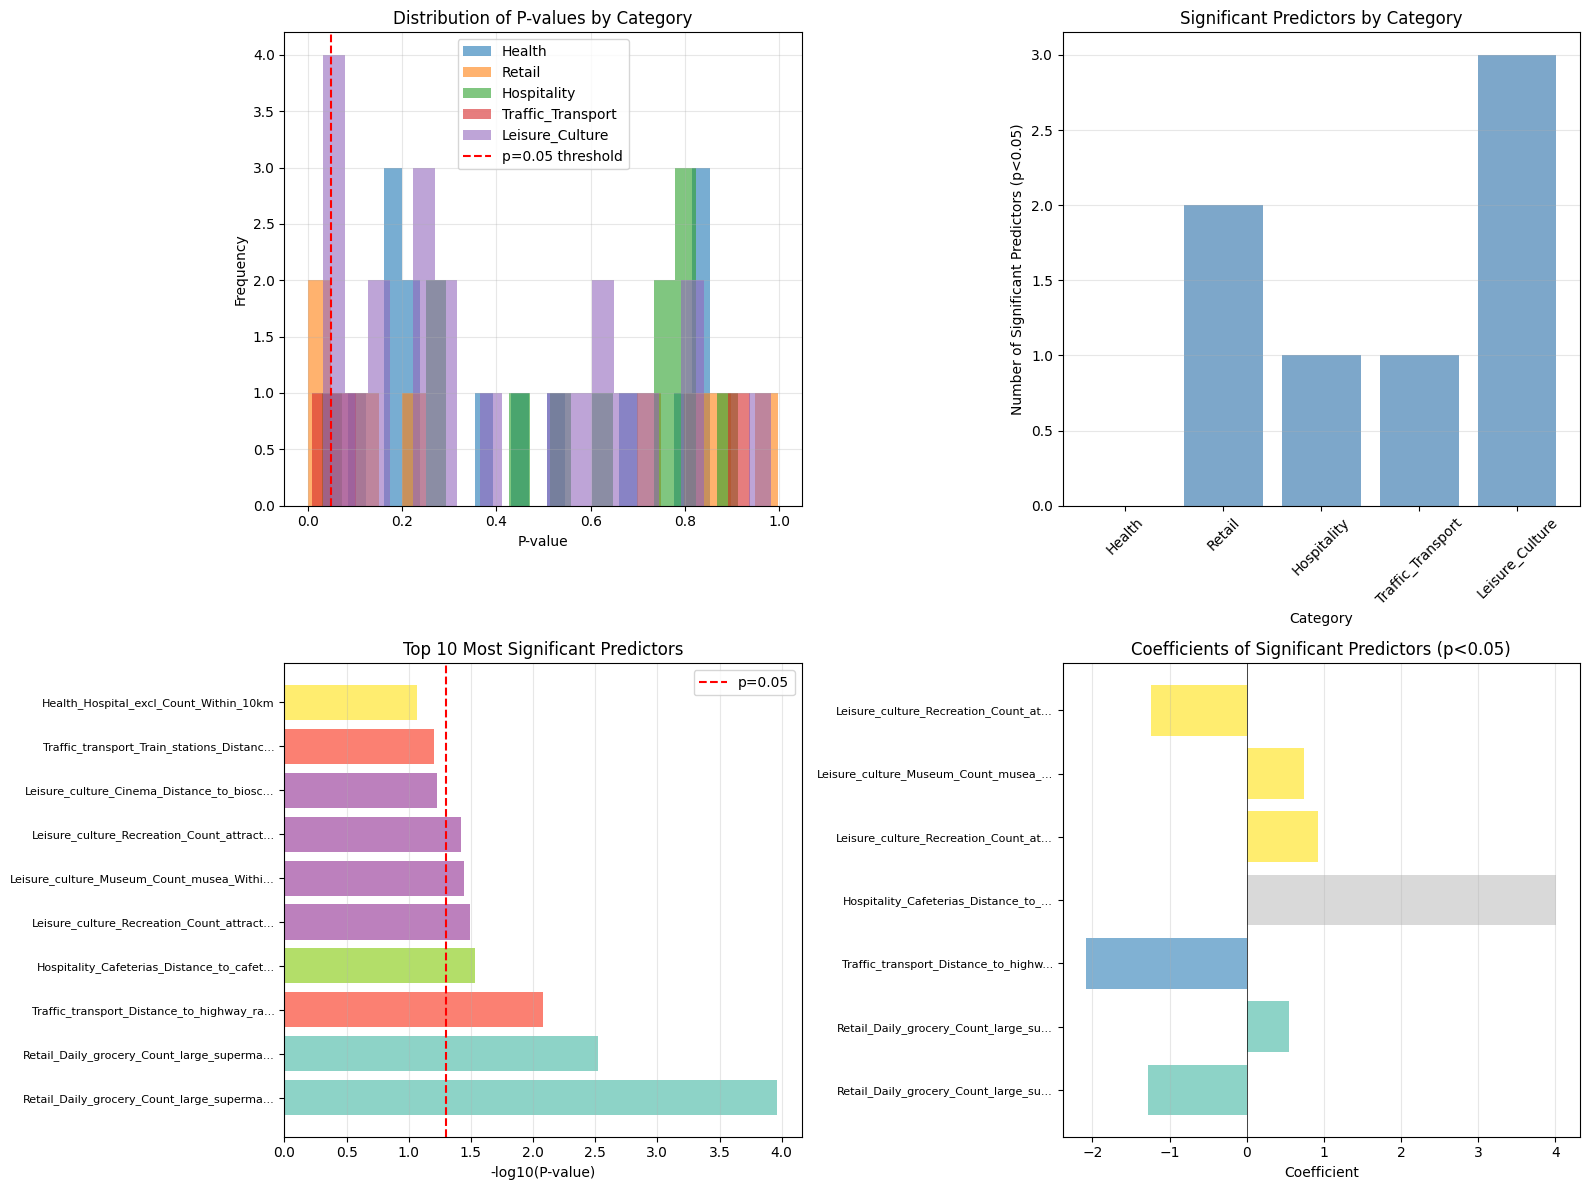

In [118]:


# Multiple Linear Regression: How significant are different kinds of amenities 
# in influencing reported health 18 en ouder

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("MULTIPLE LINEAR REGRESSION: AMENITIES vs REPORTED HEALTH (18 en ouder)")
print("="*70)

# Check if dataframes exist, if not load them
try:
    # Try to access the dataframes
    _ = amenities.shape
    _ = reported_health.shape
    print("✅ Using existing dataframes")
except NameError:
    print("Loading data...")
    amenities = pd.read_csv("amenities.csv")
    reported_health = pd.read_csv("reported_health.csv")
    
    # Do minimal processing needed for regression
    # Remove BOM if present
    amenities.columns = amenities.columns.str.replace("ï»¿", "")
    
    # Rename the first column if needed
    if 'Wijken en buurten' in amenities.columns:
        amenities.rename(columns={'Wijken en buurten': 'area_name'}, inplace=True)
    
    # Basic translation of column names (simplified version)
    amenities.columns = amenities.columns.str.replace('Gezondheid en welzijn', 'Health')
    amenities.columns = amenities.columns.str.replace('Huisartsenpraktijk', 'GP')
    amenities.columns = amenities.columns.str.replace('Huisartsenpost', 'GP_after_hours')
    amenities.columns = amenities.columns.str.replace('Afstand tot', 'Distance_to')
    amenities.columns = amenities.columns.str.replace('Aantal', 'Count')
    amenities.columns = amenities.columns.str.replace('Binnen', 'Within')
    amenities.columns = amenities.columns.str.replace('Detailhandel', 'Retail')
    amenities.columns = amenities.columns.str.replace('Winkels dagelijkse boodschappen', 'Daily_grocery')
    amenities.columns = amenities.columns.str.replace('grote supermarkt', 'large_supermarket')
    amenities.columns = amenities.columns.str.replace('ov. dagel. levensmiddelen', 'other_daily_goods')
    amenities.columns = amenities.columns.str.replace('Horeca', 'Hospitality')
    amenities.columns = amenities.columns.str.replace('Cafés en dergelijke', 'Cafes')
    amenities.columns = amenities.columns.str.replace("Cafetaria's en dergelijke", 'Cafeterias')
    amenities.columns = amenities.columns.str.replace('Verkeer en vervoer', 'Traffic_transport')
    amenities.columns = amenities.columns.str.replace('Treinstations', 'Train_stations')
    amenities.columns = amenities.columns.str.replace('oprit hoofdverkeersweg', 'highway_ramp')
    amenities.columns = amenities.columns.str.replace('Vrije tijd en cultuur', 'Leisure_culture')
    amenities.columns = amenities.columns.str.replace('Bibliotheek', 'Library')
    amenities.columns = amenities.columns.str.replace('binnenzwembad', 'indoor_pool')
    amenities.columns = amenities.columns.str.replace('kunstijsbaan', 'ice_rink')
    amenities.columns = amenities.columns.str.replace('Podiumkunsten', 'Performing_arts')
    amenities.columns = amenities.columns.str.replace('poppodium', 'music_venue')
    amenities.columns = amenities.columns.str.replace('Bioscoop', 'Cinema')
    amenities.columns = amenities.columns.str.replace('Recreatie', 'Recreation')
    amenities.columns = amenities.columns.str.replace('zonnebank', 'tanning_bed')
    amenities.columns = amenities.columns.str.replace('attractie', 'attraction')
    amenities.columns = amenities.columns.str.replace('Ziekenhuis', 'Hospital')
    amenities.columns = amenities.columns.str.replace('apotheek', 'pharmacy')
    amenities.columns = amenities.columns.str.replace('(incl. buitenpolikliniek)', 'incl_outpatient')
    amenities.columns = amenities.columns.str.replace('(excl. buitenpolikliniek)', 'excl_outpatient')
    amenities.columns = amenities.columns.str.replace('(km)', 'km')
    amenities.columns = amenities.columns.str.replace('(aantal)', 'count')
    amenities.columns = amenities.columns.str.replace('/', '_')
    amenities.columns = amenities.columns.str.replace(' ', '_')
    amenities.columns = amenities.columns.str.replace('__', '_')
    
    # Handle reported_health column name
    if 'GEBIED_NAAM' in reported_health.columns and 'area_name' not in reported_health.columns:
        reported_health.rename(columns={'GEBIED_NAAM': 'area_name'}, inplace=True)
    
    print("✅ Data loaded and processed")

# Step 1: Prepare data for merging
# Normalize area names in both dataframes for better matching
def normalize_area_name_for_merge(name):
    """Normalize area name for merging by handling common variations"""
    if pd.isna(name):
        return ""
    name_str = str(name).strip()
    # Convert to lowercase and replace common variations
    name_str = name_str.lower()
    # Replace hyphens with spaces
    name_str = name_str.replace('-', ' ')
    # Remove extra spaces
    name_str = ' '.join(name_str.split())
    return name_str

# Create normalized area names for merging
amenities['area_name_normalized'] = amenities['area_name'].apply(normalize_area_name_for_merge)

# Handle both possible column names in reported_health
if 'GEBIED_NAAM' in reported_health.columns:
    reported_health['area_name_normalized'] = reported_health['GEBIED_NAAM'].apply(normalize_area_name_for_merge)
elif 'area_name' in reported_health.columns:
    reported_health['area_name_normalized'] = reported_health['area_name'].apply(normalize_area_name_for_merge)
else:
    raise ValueError("Could not find 'GEBIED_NAAM' or 'area_name' column in reported_health dataframe")

# Step 2: Merge the dataframes
merged_data = pd.merge(
    amenities,
    reported_health[['area_name_normalized', '18_en_ouder']],
    on='area_name_normalized',
    how='inner'
)

print(f"\nMerged dataset shape: {merged_data.shape}")
print(f"Number of areas with both amenities and health data: {len(merged_data)}")

# Step 3: Identify amenity columns by category
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns.tolist()

# Group amenity columns by category
amenity_categories = {
    'Health': [col for col in numeric_cols if col.startswith('Health_')],
    'Retail': [col for col in numeric_cols if col.startswith('Retail_')],
    'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality_')],
    'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic_')],
    'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure_')]
}

# Remove the target variable from any category if it was included
target_var = '18_en_ouder'
for category in amenity_categories:
    amenity_categories[category] = [col for col in amenity_categories[category] if col != target_var]

print("\nAmenity columns by category:")
for category, cols in amenity_categories.items():
    print(f"  {category}: {len(cols)} columns")

# Step 4: Prepare data for regression
# Select all amenity columns
all_amenity_cols = []
for cols in amenity_categories.values():
    all_amenity_cols.extend(cols)

# Create dataset with only relevant columns
regression_data = merged_data[all_amenity_cols + [target_var]].copy()

# Handle missing values: drop rows where target is missing
regression_data = regression_data.dropna(subset=[target_var])

# For amenity columns, fill missing values with median
for col in all_amenity_cols:
    if regression_data[col].isnull().sum() > 0:
        median_val = regression_data[col].median()
        regression_data[col].fillna(median_val, inplace=True)

# Remove columns with zero variance (constant values)
cols_to_remove = []
for col in all_amenity_cols:
    if regression_data[col].nunique() <= 1:
        cols_to_remove.append(col)

for col in cols_to_remove:
    all_amenity_cols.remove(col)
    amenity_categories = {k: [c for c in v if c != col] for k, v in amenity_categories.items()}

print(f"\nRemoved {len(cols_to_remove)} columns with zero variance")
print(f"Final number of amenity predictors: {len(all_amenity_cols)}")

# Prepare X and y
X = regression_data[all_amenity_cols]
y = regression_data[target_var]

print(f"\nFinal dataset for regression: {X.shape[0]} observations, {X.shape[1]} predictors")

# Step 5: Perform multiple linear regression using statsmodels for detailed statistics
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

print("\n" + "="*70)
print("REGRESSION RESULTS")
print("="*70)
print(model.summary())

# Step 6: Extract and organize results by amenity category
results_df = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values,
    'Std_Error': model.bse.values,
    't_value': model.tvalues.values,
    'P_value': model.pvalues.values,
    'Significant_05': model.pvalues.values < 0.05,
    'Significant_01': model.pvalues.values < 0.01
})

# Remove the constant term for category analysis
results_df = results_df[results_df['Variable'] != 'const'].copy()

# Add category information
results_df['Category'] = 'Other'
for category, cols in amenity_categories.items():
    results_df.loc[results_df['Variable'].isin(cols), 'Category'] = category

# Sort by p-value
results_df = results_df.sort_values('P_value')

print("\n" + "="*70)
print("SIGNIFICANCE BY AMENITY CATEGORY")
print("="*70)

# Summary by category
category_summary = []
for category in amenity_categories.keys():
    cat_results = results_df[results_df['Category'] == category]
    if len(cat_results) > 0:
        n_total = len(cat_results)
        n_sig_05 = cat_results['Significant_05'].sum()
        n_sig_01 = cat_results['Significant_01'].sum()
        avg_pvalue = cat_results['P_value'].mean()
        min_pvalue = cat_results['P_value'].min()
        
        category_summary.append({
            'Category': category,
            'Total_Predictors': n_total,
            'Significant_p<0.05': n_sig_05,
            'Significant_p<0.01': n_sig_01,
            'Percent_Significant_05': round(100 * n_sig_05 / n_total, 1),
            'Avg_P_value': round(avg_pvalue, 4),
            'Min_P_value': round(min_pvalue, 4)
        })

category_summary_df = pd.DataFrame(category_summary)
print("\nSummary by Category:")
print(category_summary_df.to_string(index=False))

# Step 7: Show most significant predictors overall
print("\n" + "="*70)
print("TOP 15 MOST SIGNIFICANT PREDICTORS")
print("="*70)
top_predictors = results_df.head(15)[['Category', 'Variable', 'Coefficient', 'P_value', 'Significant_05']]
print(top_predictors.to_string(index=False))

# Step 8: Show most significant predictor from each category
print("\n" + "="*70)
print("MOST SIGNIFICANT PREDICTOR FROM EACH CATEGORY")
print("="*70)
for category in amenity_categories.keys():
    cat_results = results_df[results_df['Category'] == category]
    if len(cat_results) > 0:
        most_sig = cat_results.iloc[0]
        print(f"\n{category}:")
        print(f"  Variable: {most_sig['Variable']}")
        print(f"  Coefficient: {most_sig['Coefficient']:.4f}")
        print(f"  P-value: {most_sig['P_value']:.4f}")
        print(f"  Significant (p<0.05): {most_sig['Significant_05']}")

# Step 9: Model diagnostics
print("\n" + "="*70)
print("MODEL DIAGNOSTICS")
print("="*70)
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"F-statistic p-value: {model.f_pvalue:.4e}")
print(f"Number of observations: {model.nobs}")
print(f"Degrees of freedom: {model.df_resid}")

# Step 10: Visualize results
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: P-values by category
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of p-values by category
ax1 = axes[0, 0]
for category in amenity_categories.keys():
    cat_results = results_df[results_df['Category'] == category]
    if len(cat_results) > 0:
        ax1.hist(cat_results['P_value'], alpha=0.6, label=category, bins=20)
ax1.axvline(x=0.05, color='r', linestyle='--', label='p=0.05 threshold')
ax1.set_xlabel('P-value')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of P-values by Category')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Number of significant predictors by category
ax2 = axes[0, 1]
sig_counts = []
categories_list = []
for category in amenity_categories.keys():
    cat_results = results_df[results_df['Category'] == category]
    if len(cat_results) > 0:
        sig_counts.append(cat_results['Significant_05'].sum())
        categories_list.append(category)
ax2.bar(categories_list, sig_counts, color='steelblue', alpha=0.7)
ax2.set_xlabel('Category')
ax2.set_ylabel('Number of Significant Predictors (p<0.05)')
ax2.set_title('Significant Predictors by Category')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Top 10 most significant predictors
ax3 = axes[1, 0]
top_10 = results_df.head(10)
colors_map = plt.cm.Set3(np.linspace(0, 1, len(top_10['Category'].unique())))
category_to_color = {cat: colors_map[i] for i, cat in enumerate(top_10['Category'].unique())}
bar_colors = [category_to_color[cat] for cat in top_10['Category']]
ax3.barh(range(len(top_10)), -np.log10(top_10['P_value']), color=bar_colors)
ax3.set_yticks(range(len(top_10)))
ax3.set_yticklabels([var[:40] + '...' if len(var) > 40 else var for var in top_10['Variable']], fontsize=8)
ax3.axvline(x=-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
ax3.set_xlabel('-log10(P-value)')
ax3.set_title('Top 10 Most Significant Predictors')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='x')

# Plot 4: Coefficients for significant predictors
ax4 = axes[1, 1]
sig_predictors = results_df[results_df['Significant_05']].head(15)
if len(sig_predictors) > 0:
    colors_map = plt.cm.Set3(np.linspace(0, 1, len(sig_predictors['Category'].unique())))
    category_to_color = {cat: colors_map[i] for i, cat in enumerate(sig_predictors['Category'].unique())}
    bar_colors = [category_to_color[cat] for cat in sig_predictors['Category']]
    ax4.barh(range(len(sig_predictors)), sig_predictors['Coefficient'], color=bar_colors)
    ax4.set_yticks(range(len(sig_predictors)))
    ax4.set_yticklabels([var[:35] + '...' if len(var) > 35 else var for var in sig_predictors['Variable']], fontsize=8)
    ax4.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax4.set_xlabel('Coefficient')
    ax4.set_title('Coefficients of Significant Predictors (p<0.05)')
    ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()



Number of significant predictors per category:
- Health (GP, hospitals, and pharmacy): 0
- Retail: 2
- Hospitality: 1
- Traffic & Transport: 1
- Leisure & Culture: 3